# ALI Performance Tests on Blake

## Introduction
Currently testing the Greenland Ice Sheet (GIS) and Antartica Ice Sheet (AIS) in Albany Land Ice (ALI) using Intel Skylake CPUs on blake.

### Architectures: 
| Name  | Blake (SKX) |
|---|---|
| CPU  | Dual-socket Intel<br/>Xeon Platinum 8160<br/>(Skylake) |
| Cores/Node  | 48  |
| Threads/Core  | 2 |
| Memory/Node  | 187 GB |
| Interconnect  | Intel OmniPath<br/>Gen-1 (100 GB/s)  |
| Compiler  | Intel 18.1.163  |
| MPI  | openmpi 2.1.2  |

### Cases: 
| Case Name  | Number of Processes (np) | Description |
|---|---|---|
| ant-2-20km_ml_ls | 384 | Unstructured 2-20km AIS, ML w/ line smoothing |
| ant-2-20km_mu_ls | 384 | Unstructured 2-20km AIS, MueLu w/ line smoothing |
| ant-2-20km_mu_dls | 384 | Unstructured 2-20km AIS, MueLu w/ decoupled line smoothing |
| greenland-1-7km_fea_1ws | 384 | Unstructured 1-7km GIS, finite element assembly only, single workset |
| greenland-1-7km_ml_ls_1ws | 384 | Unstructured 1-7km GIS, ML w/ line smoothing, single workset |
| greenland-1-7km_mu_ls_1ws | 384 | Unstructured 1-7km GIS, MueLu w/ line smoothing, single workset |
| greenland-1-7km_mu_dls_1ws | 384 | Unstructured 1-7km GIS, MueLu w/ decoupled line smoothing, single workset |
| greenland-1-7km_fea_mem | 384 | Unstructured 1-7km GIS, finite element assembly only, memoization |
| greenland-1-7km_ml_ls_mem | 384 | Unstructured 1-7km GIS, ML w/ line smoothing, memoization |
| greenland-1-7km_mu_ls_mem | 384 | Unstructured 1-7km GIS, MueLu w/ line smoothing, memoization |
| greenland-1-7km_mu_dls_mem | 384 | Unstructured 1-7km GIS, MueLu w/ decoupled line smoothing, memoization |

### Timers: 
| Timer Name | Level | Description |
|---|---|---|
| Albany Total Time | 0 | Total wall-clock time of simulation |
| Albany: Setup Time | 1 | Preprocess |
| Albany: Total Fill Time | 1 | Finite element assembly |
| Albany Fill: Residual | 2 | Residual assembly |
| Albany Residual Fill: Evaluate | 3 | Compute the residual, local/global assembly |
| Albany Residual Fill: Export | 3 | Update global residual across MPI ranks |
| Albany Fill: Jacobian | 2 | Jacobian assembly |
| Albany Jacobian Fill: Evaluate | 3 | Compute the Jacobian, local/global assembly |
| Albany Jacobian Fill: Export | 3 | Update global Jacobian across MPI ranks |
| NOX Total Preconditioner Construction | 1 | Construct Preconditioner |
| NOX Total Linear Solve | 1 | Linear Solve |

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Import scripts
from json2status import json2status
from json2timeline import json2timeline

# Extract file names
files = glob.glob('ctest-*')

## Performance Tests Status

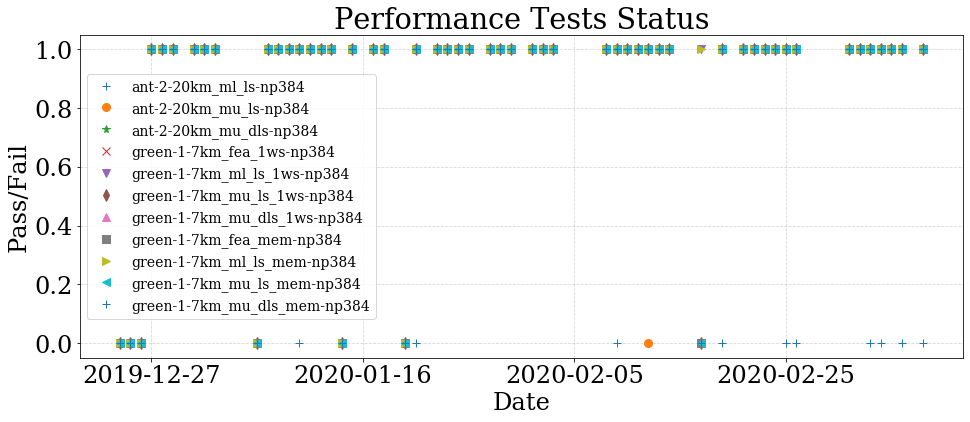

In [2]:
%matplotlib inline
#plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (14, 6)

# Cases to plot
cases = ('ant-2-20km_ml_ls',
         'ant-2-20km_mu_ls',
         'ant-2-20km_mu_dls',
         'green-1-7km_fea_1ws',
         'green-1-7km_ml_ls_1ws',
         'green-1-7km_mu_ls_1ws',
         'green-1-7km_mu_dls_1ws',
         'green-1-7km_fea_mem',
         'green-1-7km_ml_ls_mem',
         'green-1-7km_mu_ls_mem',
         'green-1-7km_mu_dls_mem')
np = 384

# Plot:
plt.figure()
imarker = 0
markers = ['+','o','*','x','v','d','^','s','>','<','+']
legNames = []
for case in cases:
    # Extract info and plot
    dates, status = json2status(files, case, np)
    fdates = [dt.datetime.strptime(str(d),'%Y%m%d').date() for d in dates]
    plt.plot(fdates, status, markersize=8.0, marker=markers[imarker], linestyle='None')
    imarker = imarker + 1
    legNames.append(case+'-np'+str(np))
        
plt.xlabel('Date')
plt.ylabel('Pass/Fail')
#plt.ylim((6e-3, 1e-1))
plt.legend(legNames,fontsize=14,loc='center left')
plt.tight_layout()
plt.title('Performance Tests Status')
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(linestyle='--', alpha=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.tick_params(axis='x',rotation = 45)
plt.show()


## Performance Timelines

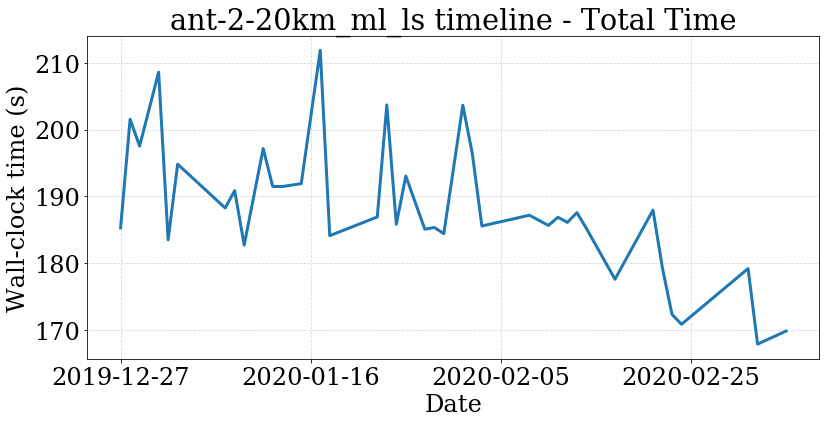

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (185.274, 201.549, 197.528, 208.615, 183.471, 194.819, 188.244, 190.846, 182.686, 197.163, 191.474, 191.464, 191.893, 211.889, 184.097, 186.899, 203.695, 185.801, 193.041, 185.062, 185.318, 184.402, 203.651, 196.363, 185.543, 187.159, 185.63, 186.853, 186.091, 187.55, 185.175, 177.56, 187.921, 179.198, 172.283, 170.805, 179.16, 167.832, 169.792)


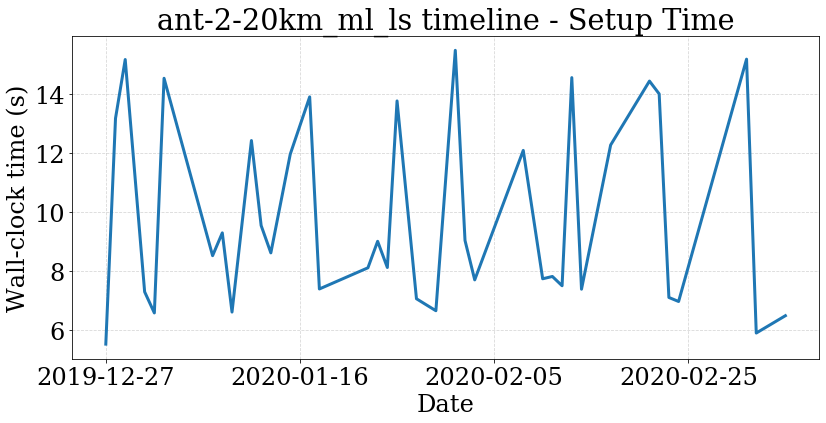

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (5.51616, 13.1704, 15.1645, 7.28887, 6.57317, 14.5286, 8.51446, 9.28736, 6.60224, 12.418, 9.53674, 8.60917, 11.9559, 13.8982, 7.38558, 8.10315, 9.00124, 8.11343, 13.7607, 7.05395, 6.85024, 6.64787, 15.4759, 9.03044, 7.69407, 12.0831, 7.73136, 7.80911, 7.49415, 14.551, 7.3778, 12.2653, 14.4336, 13.9989, 7.09784, 6.9611, 15.177, 5.89148, 6.47924)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (154.922, 162.603, 156.099, 171.139, 148.456, 151.298, 154.881, 152.752, 151.872, 154.288, 154.099, 156.11, 155.499, 166.501, 147.559, 148.748, 163.022, 147.932, 148.556, 148.28, 148.681, 148.539, 157.172, 157.471, 148.318, 148.589, 148.455, 149.991, 149.134, 148.744, 149.1, 144.347, 149.209, 147.992, 149.406, 146.2, 147.264, 147.403, 146.083)


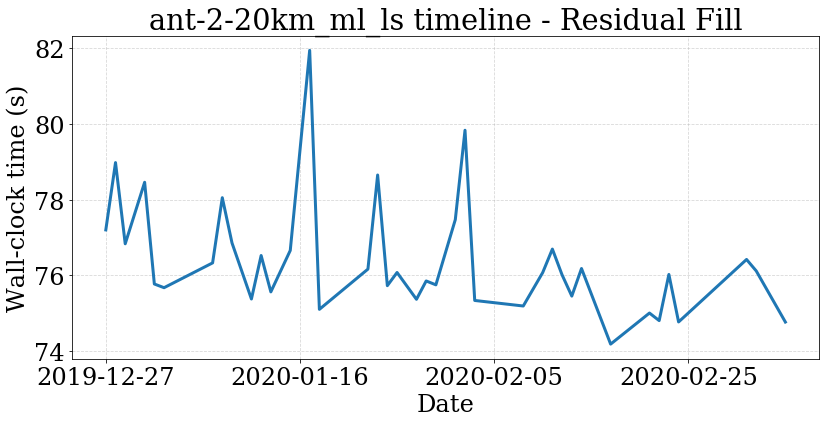

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (77.2019, 78.9798, 76.8354, 78.4598, 75.7741, 75.6764, 76.3313, 78.0529, 76.8571, 75.378, 76.5262, 75.566, 76.6597, 81.9433, 75.1047, 76.1672, 78.6518, 75.7301, 76.078, 75.3699, 75.8545, 75.7519, 77.4731, 79.8334, 75.3394, 75.1932, 76.0746, 76.6957, 76.014, 75.4548, 76.1829, 74.187, 75.0073, 74.8075, 76.0263, 74.772, 76.4218, 76.1181, 74.7694)


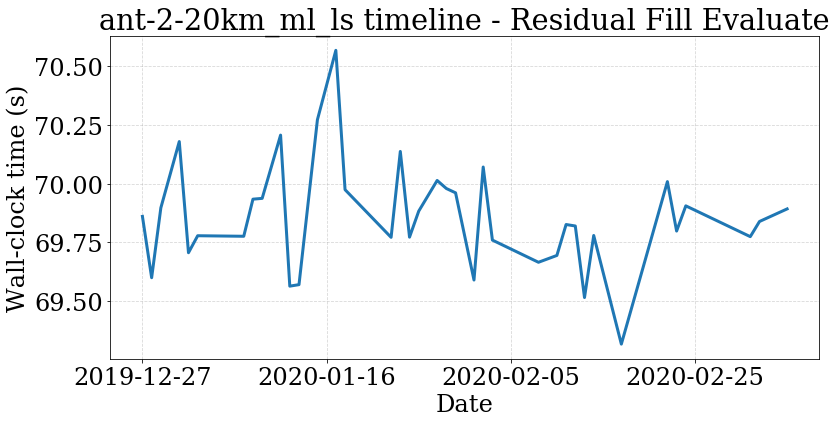

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (69.8607, 69.5994, 69.8973, 70.1796, 69.7059, 69.7783, 69.776, 69.9341, 69.9375, 70.2071, 69.5635, 69.5699, 70.2727, 70.5683, 69.9745, 69.7714, 70.1375, 69.7722, 69.8831, 70.0138, 69.9795, 69.9611, 69.5895, 70.0711, 69.7597, 69.6652, 69.6943, 69.8261, 69.8198, 69.5149, 69.7794, 69.3165, 69.8701, 70.0089, 69.7982, 69.9056, 69.7744, 69.839, 69.8926)


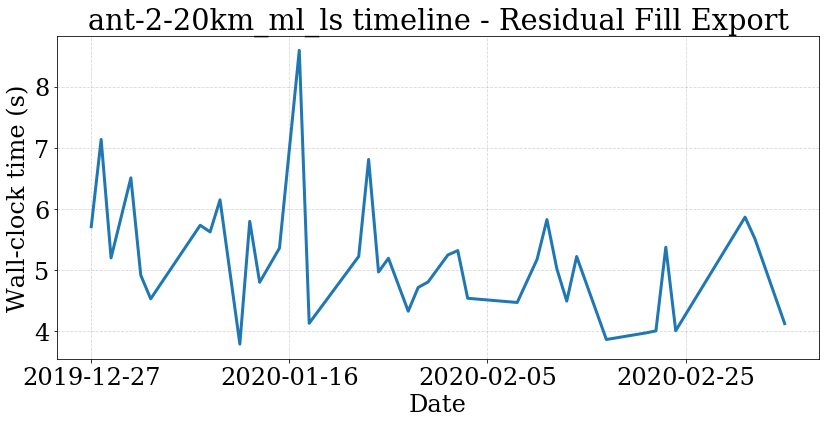

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (5.70978, 7.13628, 5.20056, 6.50826, 4.91687, 4.53196, 5.73409, 5.62516, 6.14941, 3.79208, 5.79895, 4.80205, 5.35982, 8.59205, 4.13232, 5.22485, 6.80963, 4.97096, 5.19454, 4.32955, 4.71748, 4.807, 5.24876, 5.32001, 4.54076, 4.47232, 5.17545, 5.82673, 5.02258, 4.49437, 5.22342, 3.86742, 3.9753, 4.00829, 5.37536, 4.01141, 5.8669, 5.51096, 4.12679)


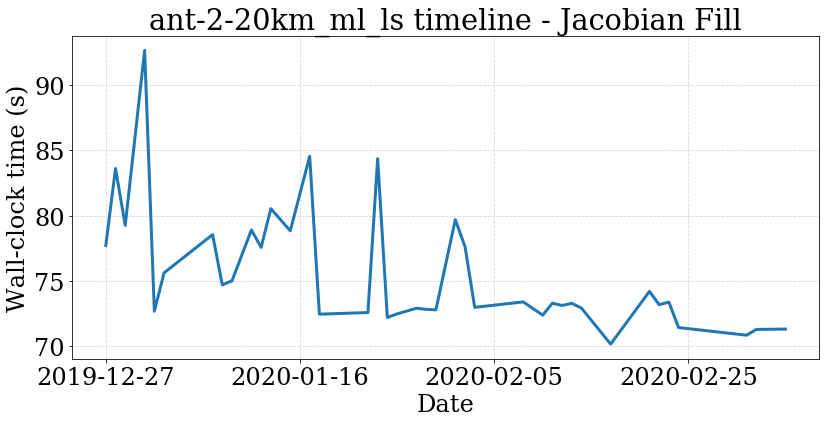

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (77.7189, 83.6217, 79.2629, 92.6775, 72.6808, 75.6203, 78.5487, 74.6976, 75.0132, 78.9091, 77.5713, 80.5424, 78.8385, 84.5562, 72.4529, 72.5797, 84.3694, 72.2005, 72.4771, 72.9083, 72.8255, 72.7861, 79.6975, 77.6361, 72.977, 73.3947, 72.3792, 73.2946, 73.1195, 73.2879, 72.9166, 70.1594, 74.2013, 73.1832, 73.3788, 71.4276, 70.8415, 71.2841, 71.3122)


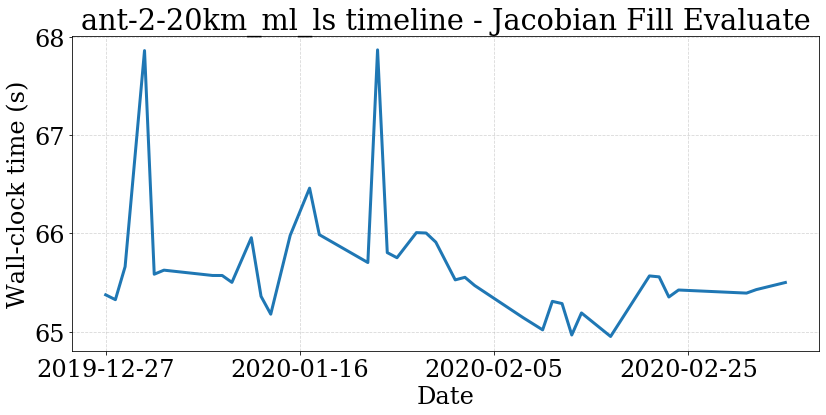

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (65.3743, 65.3251, 65.6604, 67.8577, 65.5838, 65.6251, 65.5711, 65.5708, 65.5009, 65.9551, 65.359, 65.1776, 65.9782, 66.459, 65.9861, 65.7025, 67.8652, 65.8036, 65.7514, 66.0068, 66.0027, 65.9098, 65.5264, 65.5524, 65.4691, 65.1415, 65.018, 65.308, 65.2854, 64.9659, 65.19, 64.9508, 65.5665, 65.5569, 65.3522, 65.4233, 65.3918, 65.4272, 65.4997)


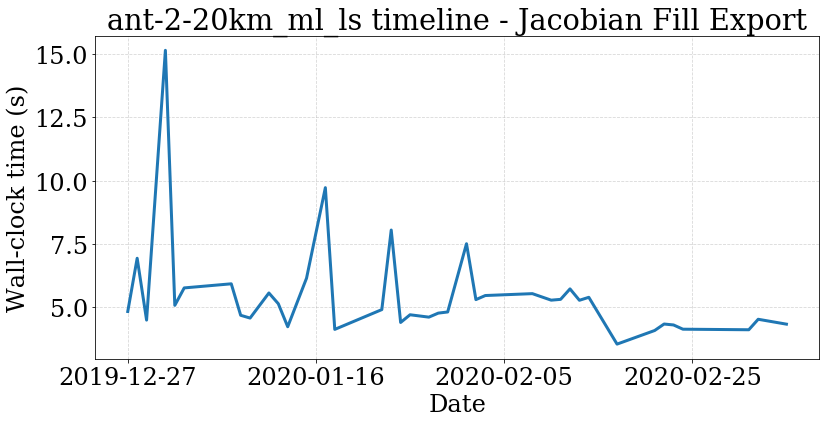

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (4.82185, 6.92943, 4.48212, 15.1575, 5.06582, 5.75597, 5.91822, 4.67299, 4.56223, 5.55555, 5.12987, 4.21975, 6.14119, 9.72335, 4.11459, 4.89773, 8.0464, 4.38829, 4.69324, 4.59917, 4.75835, 4.80373, 7.50393, 5.29315, 5.45442, 5.52901, 5.27087, 5.30283, 5.71703, 5.26638, 5.38409, 3.53196, 4.07092, 4.32677, 4.29001, 4.12221, 4.10015, 4.51493, 4.32159)


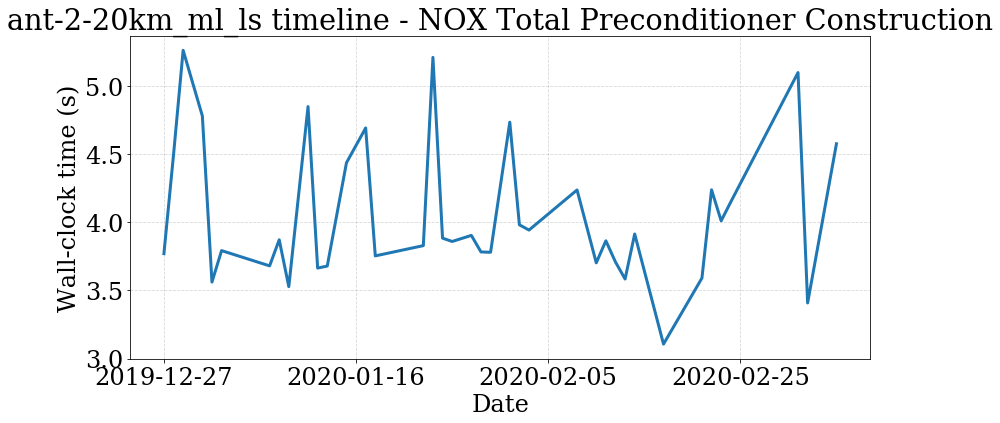

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (3.7695, 4.49467, 5.26111, 4.77997, 3.56072, 3.79174, 3.67986, 3.87113, 3.52729, 4.84835, 3.66358, 3.6784, 4.43603, 4.69153, 3.75302, 3.82827, 5.20947, 3.88333, 3.85873, 3.90332, 3.78201, 3.77953, 4.734, 3.98109, 3.94249, 4.23671, 3.70211, 3.86375, 3.70828, 3.58333, 3.91347, 3.1058, 3.59038, 4.23778, 4.01032, 4.14848, 5.09806, 3.40788, 4.57569)


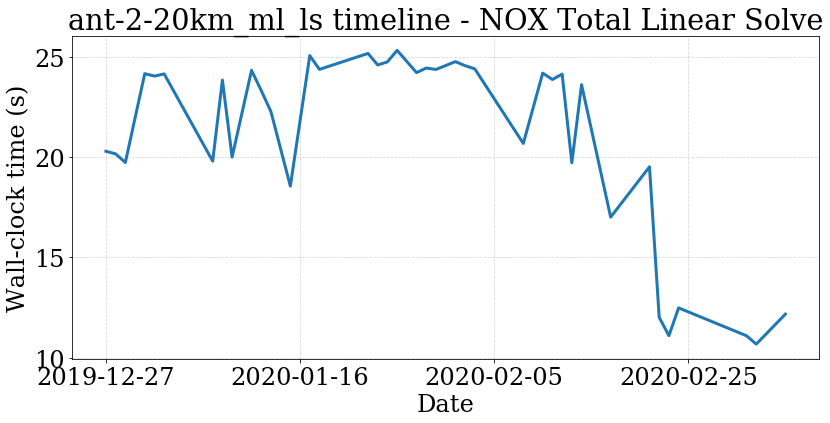

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200221, 20200222, 20200223, 20200224, 20200302, 20200303, 20200306)
Wall-clock Time:  (20.3028, 20.1725, 19.7391, 24.1758, 24.0537, 24.1636, 19.8109, 23.8589, 20.0116, 24.3384, 23.3356, 22.2799, 18.563, 25.0764, 24.3896, 25.1864, 24.6095, 24.7637, 25.3404, 24.2274, 24.4559, 24.384, 24.7769, 24.5749, 24.4157, 20.692, 24.2036, 23.8844, 24.1542, 19.7265, 23.6265, 17.0148, 19.5268, 12.0136, 11.0984, 12.4846, 11.0919, 10.6767, 12.1729)


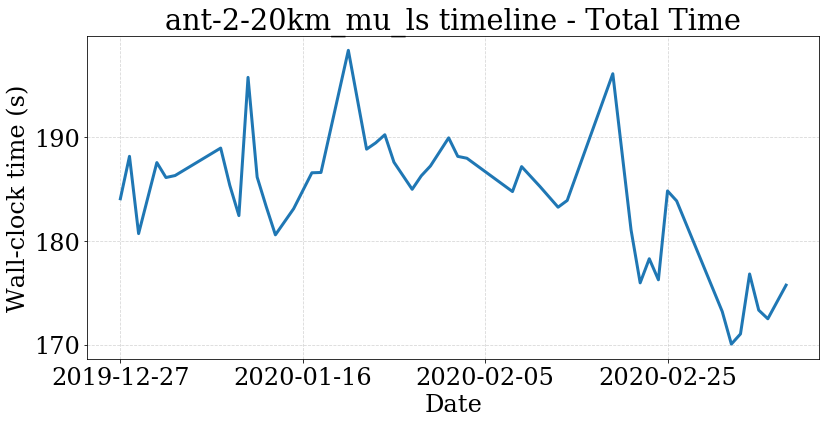

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (184.061, 188.156, 180.698, 187.553, 186.11, 186.3, 188.951, 185.356, 182.436, 195.772, 186.152, 183.289, 180.579, 183.1, 186.567, 186.597, 198.381, 188.845, 189.454, 190.237, 187.589, 184.973, 186.276, 187.22, 189.939, 188.149, 187.971, 184.754, 187.163, 186.208, 185.255, 183.246, 183.897, 196.123, 181.062, 175.947, 178.273, 176.242, 184.82, 183.853, 173.18, 170.038, 171.019, 176.805, 173.316, 172.482, 175.726)


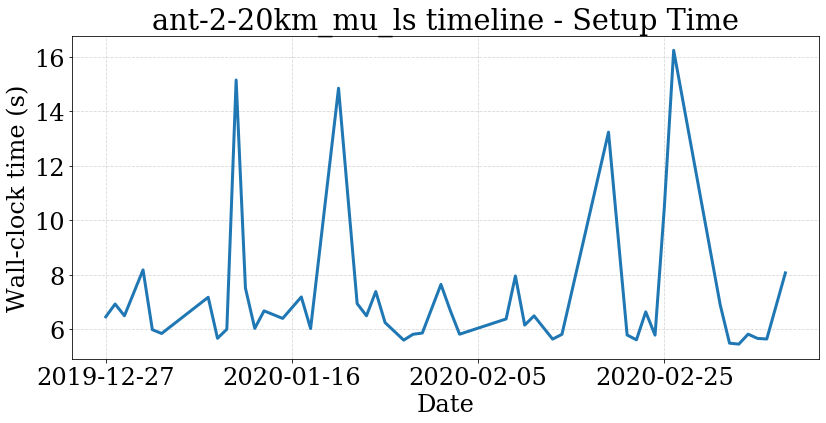

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (6.45611, 6.92513, 6.4935, 8.17776, 5.98308, 5.84309, 7.17387, 5.6664, 5.99887, 15.1506, 7.509, 6.03102, 6.67354, 6.39661, 7.18458, 6.02364, 14.849, 6.93945, 6.49274, 7.38268, 6.24346, 5.59911, 5.81418, 5.8597, 7.64531, 6.6905, 5.81692, 6.37624, 7.95465, 6.15044, 6.49154, 5.63657, 5.8124, 13.2351, 5.78741, 5.61129, 6.63606, 5.78239, 10.4867, 16.2393, 6.89389, 5.4869, 5.45313, 5.81908, 5.66278, 5.64053, 8.06797)


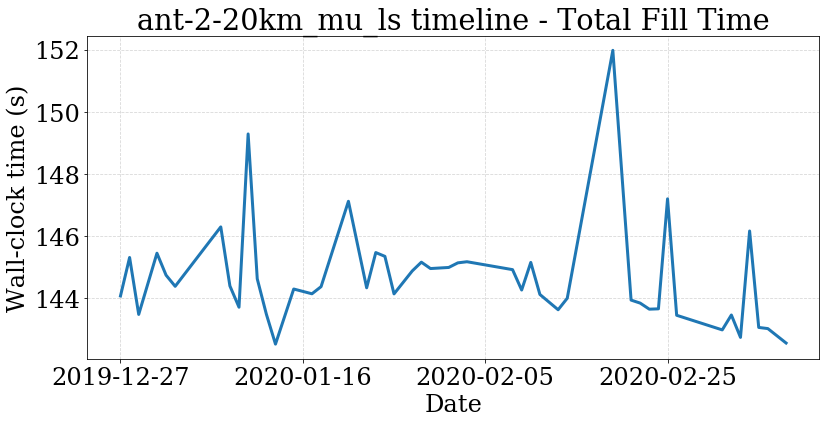

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (144.079, 145.316, 143.485, 145.453, 144.747, 144.389, 146.299, 144.402, 143.717, 149.287, 144.63, 143.493, 142.531, 144.302, 144.149, 144.378, 147.122, 144.341, 145.474, 145.352, 144.145, 144.883, 145.165, 144.96, 144.995, 145.143, 145.179, 144.925, 144.27, 145.157, 144.127, 143.636, 144.006, 151.975, 143.946, 143.849, 143.654, 143.665, 147.201, 143.458, 142.988, 143.467, 142.747, 146.167, 143.067, 143.03, 142.566)


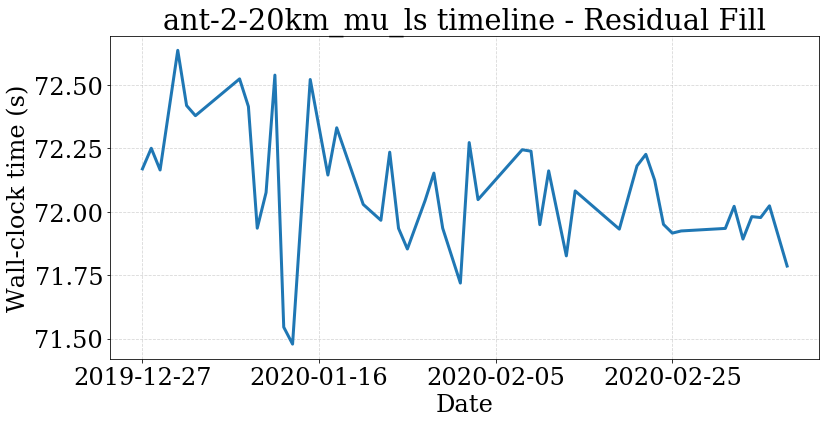

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (72.1694, 72.2507, 72.1649, 72.6369, 72.4191, 72.3791, 72.5243, 72.4152, 71.9354, 72.0762, 72.5392, 71.5451, 71.4782, 72.5219, 72.145, 72.3314, 72.0293, 71.9665, 72.2352, 71.9347, 71.8534, 72.0439, 72.1527, 71.9353, 71.7189, 72.2731, 72.048, 72.2448, 72.2391, 71.9493, 72.1615, 71.8262, 72.0824, 71.9317, 72.1811, 72.2267, 72.1248, 71.9504, 71.916, 71.9245, 71.9345, 72.0217, 71.8925, 71.981, 71.9774, 72.0236, 71.7861)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (69.7416, 69.6059, 69.8364, 69.8247, 69.6003, 69.6507, 69.7792, 69.8273, 69.835, 69.9288, 70.2816, 69.6237, 69.6168, 70.2123, 69.9694, 69.9992, 69.7678, 69.7121, 69.7339, 69.7276, 69.86, 69.9142, 69.9532, 69.9447, 69.525, 69.7601, 69.699, 69.7188, 69.6992, 69.655, 69.7626, 69.6706, 69.7606, 69.9933, 69.9879, 70.1826, 69.9494, 69.9811, 69.7904, 69.6715, 69.9236, 69.9179, 69.8568, 69.875, 69.9354, 69.8663, 69.7261)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.888325, 0.982857, 0.841178, 1.10815, 1.03588, 1.06337, 1.02948, 1.05637, 0.683434, 0.772218, 0.785633, 0.656315, 0.664193, 0.823817, 0.725474, 0.805881, 0.755008, 0.723749, 0.851465, 0.735521, 0.662282, 0.733589, 0.768542, 0.655492, 0.688331, 0.845591, 0.776368, 0.890827, 0.83954, 0.77624, 0.809389, 0.760369, 0.827101, 0.635922, 0.762355, 0.710999, 0.73849, 0.665916, 0.748912, 0.813288, 0.674165, 0.780983, 0.700424, 0.7495, 0.725961, 0.74875, 0.696833)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (71.9089, 73.0644, 71.3196, 72.815, 72.3275, 72.0088, 73.7741, 71.9856, 71.7805, 77.2097, 72.0901, 71.9466, 71.0515, 71.779, 72.0028, 72.0455, 75.0923, 72.3734, 73.238, 73.4159, 72.291, 72.8381, 73.0117, 73.024, 73.2751, 72.8695, 73.13, 72.6794, 72.0295, 73.2072, 71.9647, 71.8084, 71.9227, 80.0423, 71.7642, 71.6218, 71.5286, 71.7134, 75.2845, 71.5325, 71.0529, 71.4445, 70.8531, 74.1848, 71.0885, 71.005, 70.779)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (65.4934, 65.5543, 65.7607, 65.579, 65.4541, 65.3846, 65.6124, 65.6218, 65.2821, 65.5485, 65.6907, 65.3731, 65.2215, 65.5904, 65.6665, 65.6972, 65.4668, 65.5182, 65.6358, 65.7968, 65.614, 65.8411, 65.8996, 65.9358, 65.4664, 65.48, 65.3666, 65.1383, 65.3158, 65.0901, 65.1503, 65.015, 65.0463, 66.1122, 65.6732, 65.7027, 65.5328, 65.6705, 65.3322, 65.2669, 65.6011, 65.5834, 65.4162, 65.5365, 65.6245, 65.4455, 65.349)


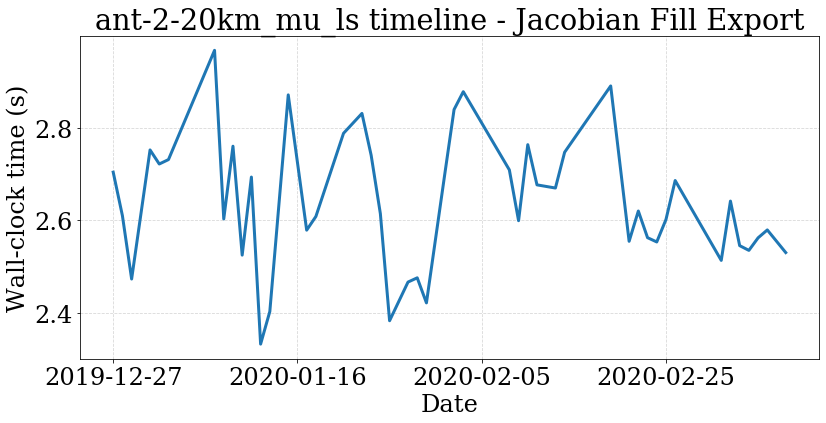

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.70382, 2.60968, 2.47276, 2.75184, 2.72144, 2.731, 2.96719, 2.60259, 2.75993, 2.52445, 2.69322, 2.33207, 2.40254, 2.87089, 2.57844, 2.60803, 2.78781, 2.8308, 2.74031, 2.61392, 2.38262, 2.4662, 2.47538, 2.4212, 2.70085, 2.83923, 2.87776, 2.70872, 2.59888, 2.76325, 2.67635, 2.6695, 2.74687, 2.89017, 2.55432, 2.61978, 2.56218, 2.55292, 2.60141, 2.68567, 2.51308, 2.64127, 2.54496, 2.53471, 2.56183, 2.5789, 2.52996)


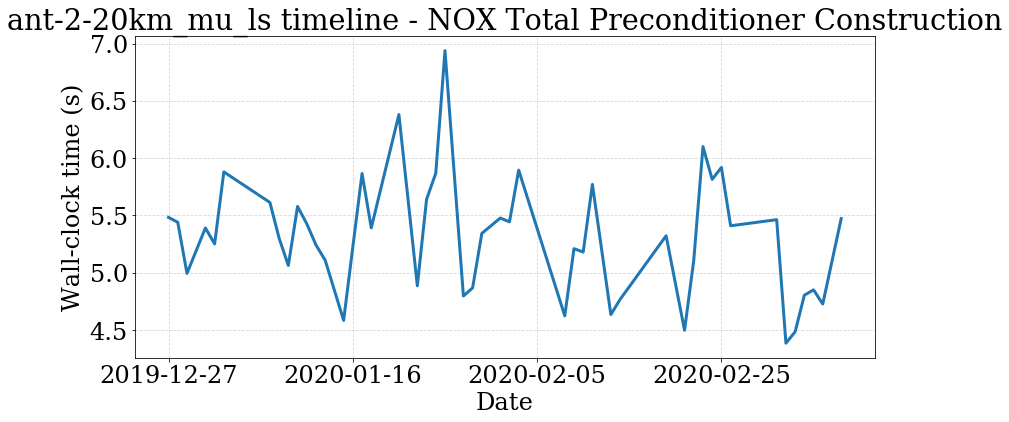

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (5.48295, 5.44062, 4.9945, 5.39091, 5.25201, 5.87993, 5.61347, 5.30123, 5.06355, 5.57823, 5.4275, 5.2423, 5.10905, 4.58438, 5.86568, 5.39154, 6.3803, 4.88631, 5.64015, 5.86788, 6.93826, 4.79704, 4.86833, 5.34347, 5.47723, 5.44429, 5.89546, 4.62388, 5.21005, 5.18094, 5.77108, 4.63526, 4.76669, 5.32275, 4.49794, 5.10909, 6.10066, 5.8147, 5.91901, 5.40976, 5.46315, 4.38552, 4.48467, 4.80394, 4.85066, 4.7275, 5.47256)


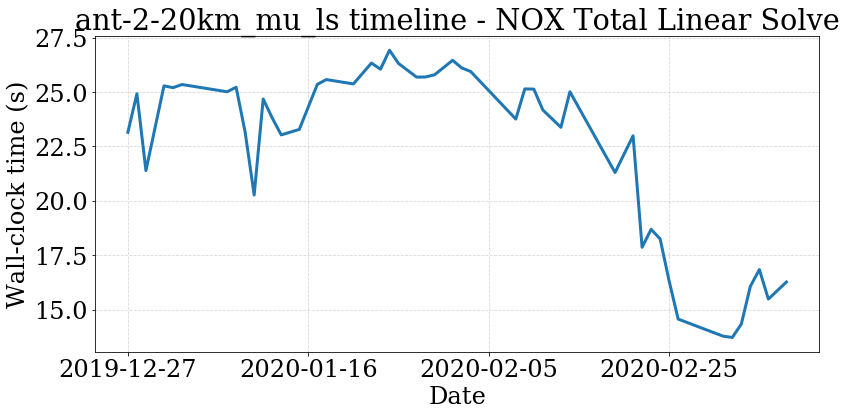

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (23.1494, 24.9198, 21.3875, 25.2828, 25.199, 25.3439, 25.0112, 25.2189, 23.1526, 20.2672, 24.6787, 23.8073, 23.0293, 23.2807, 25.351, 25.5714, 25.3717, 26.33, 26.0471, 26.9193, 26.3126, 25.6848, 25.6901, 25.7919, 26.4571, 26.1063, 25.9417, 23.7561, 25.1429, 25.1327, 24.1741, 23.3772, 25.0113, 21.3029, 22.9889, 17.8673, 18.6915, 18.2517, 16.3138, 14.5679, 13.7804, 13.7252, 14.3394, 16.0725, 16.8432, 15.487, 16.2723)


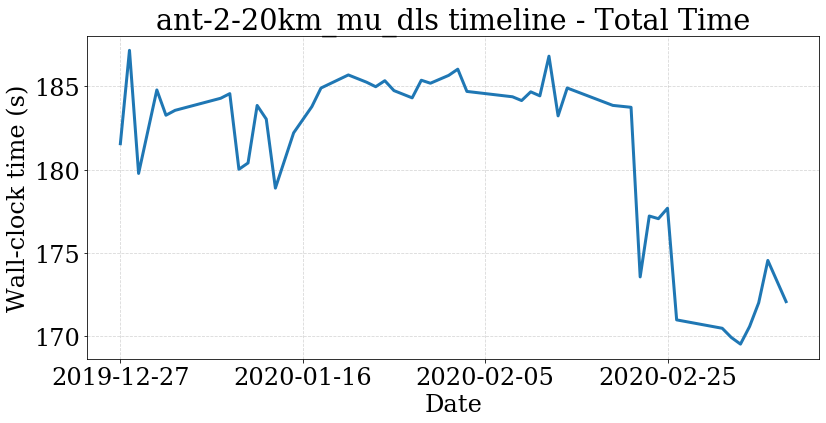

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (181.559, 187.162, 179.775, 184.786, 183.268, 183.561, 184.286, 184.564, 180.025, 180.403, 183.854, 183.036, 178.894, 182.21, 183.785, 184.9, 185.685, 185.249, 184.979, 185.34, 184.746, 184.31, 185.368, 185.188, 185.658, 186.031, 184.696, 184.375, 184.148, 184.672, 184.431, 186.812, 183.229, 184.902, 183.858, 183.744, 173.567, 177.221, 177.061, 177.689, 170.989, 170.485, 169.931, 169.535, 170.593, 172.019, 174.556, 172.084)


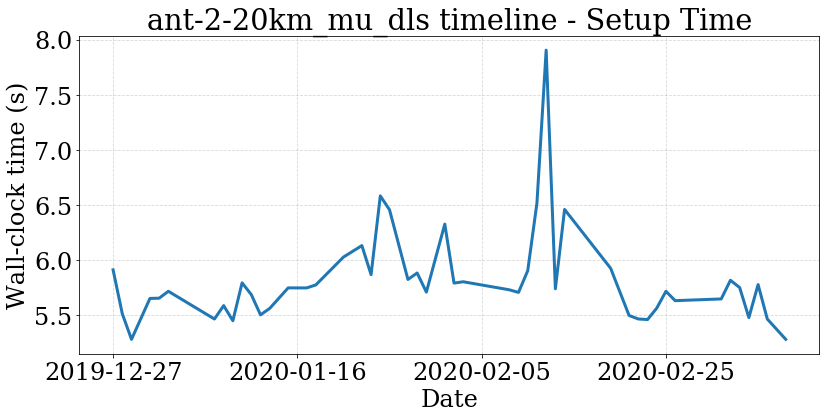

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (5.9123, 5.51392, 5.28225, 5.65319, 5.65517, 5.71798, 5.4665, 5.58814, 5.45062, 5.79448, 5.68791, 5.50427, 5.56282, 5.7487, 5.74832, 5.77543, 6.02783, 6.13224, 5.86831, 6.58258, 6.45698, 5.82496, 5.88367, 5.71052, 6.32711, 5.79222, 5.80429, 5.73134, 5.7078, 5.90429, 6.5178, 7.90389, 5.74027, 6.46, 5.92615, 5.49846, 5.46689, 5.46145, 5.56495, 5.71782, 5.63283, 5.64856, 5.81756, 5.7518, 5.47954, 5.77877, 5.46632, 5.28249)


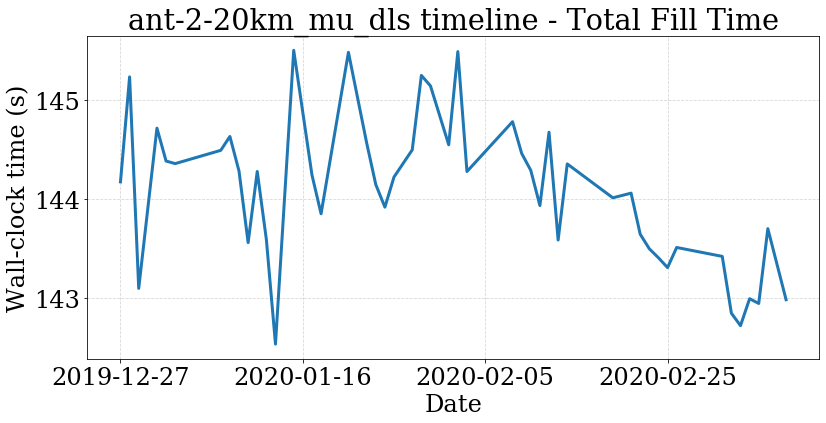

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (144.176, 145.235, 143.101, 144.718, 144.386, 144.36, 144.494, 144.634, 144.285, 143.563, 144.281, 143.594, 142.539, 145.503, 144.246, 143.854, 145.483, 144.569, 144.149, 143.921, 144.225, 144.499, 145.25, 145.144, 144.55, 145.49, 144.28, 144.783, 144.463, 144.292, 143.937, 144.677, 143.589, 144.357, 144.015, 144.062, 143.648, 143.501, 143.41, 143.311, 143.514, 143.424, 142.851, 142.725, 142.997, 142.949, 143.704, 142.987)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (72.2062, 72.2826, 71.9351, 72.269, 72.0428, 72.1965, 72.1963, 72.5995, 72.3185, 71.9042, 72.5087, 71.4866, 71.7793, 72.847, 72.3693, 72.3551, 72.1997, 72.1001, 72.006, 71.8829, 72.0661, 72.0504, 72.1269, 72.0223, 71.6633, 72.2233, 71.8626, 72.3246, 72.2, 71.9893, 71.9365, 72.0729, 71.7009, 72.2288, 72.0672, 72.1593, 72.2071, 72.0438, 71.9282, 71.9452, 72.1824, 72.0736, 71.928, 72.0502, 71.8591, 71.7806, 72.0358, 71.8497)


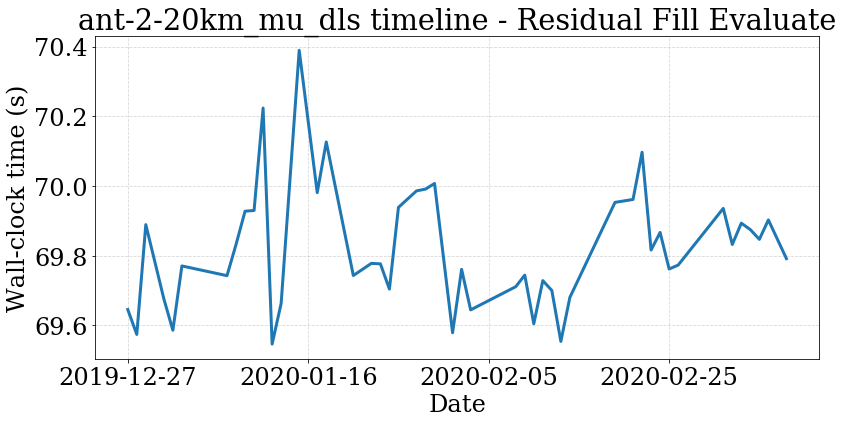

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (69.6457, 69.5742, 69.8892, 69.6763, 69.5862, 69.7707, 69.7428, 69.8323, 69.9277, 69.9298, 70.2235, 69.5465, 69.6634, 70.3891, 69.9809, 70.1263, 69.7432, 69.7781, 69.7767, 69.7043, 69.9386, 69.986, 69.9911, 70.0072, 69.5791, 69.7609, 69.6447, 69.7112, 69.7444, 69.6048, 69.7286, 69.7004, 69.5541, 69.6805, 69.953, 69.9614, 70.0968, 69.8163, 69.8667, 69.762, 69.7731, 69.9357, 69.8323, 69.8934, 69.8749, 69.847, 69.9027, 69.7917)


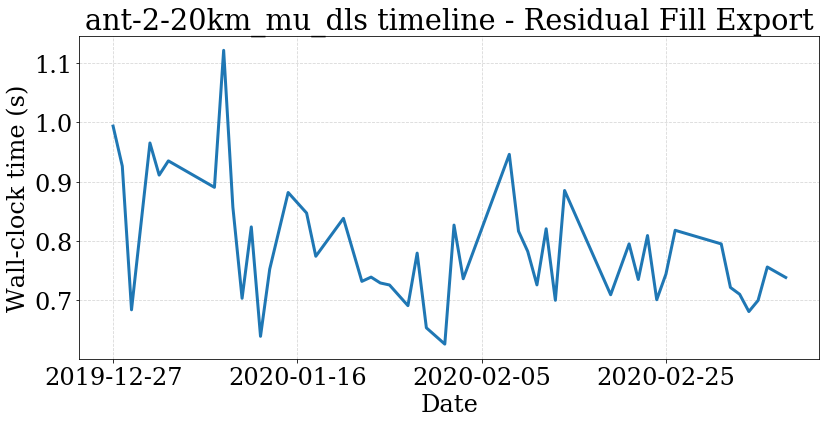

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.993452, 0.926048, 0.684304, 0.965064, 0.910986, 0.934948, 0.890398, 1.12095, 0.857183, 0.703679, 0.823832, 0.639714, 0.75289, 0.88173, 0.847172, 0.774391, 0.838265, 0.732189, 0.739353, 0.729484, 0.726086, 0.691308, 0.779716, 0.654032, 0.626598, 0.826888, 0.736585, 0.945921, 0.816635, 0.782614, 0.726228, 0.820666, 0.70031, 0.885097, 0.709674, 0.795238, 0.735336, 0.809293, 0.701287, 0.744448, 0.818112, 0.795213, 0.721895, 0.71046, 0.681368, 0.700142, 0.756346, 0.738726)


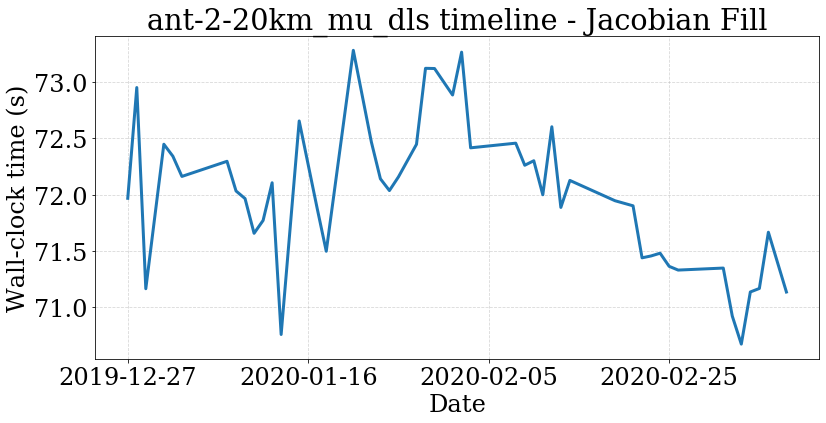

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (71.9685, 72.9518, 71.1655, 72.4483, 72.342, 72.1626, 72.2969, 72.0334, 71.9659, 71.6575, 71.7718, 72.1064, 70.7592, 72.6551, 71.8761, 71.4981, 73.2822, 72.468, 72.1417, 72.037, 72.1584, 72.4477, 73.1225, 73.1207, 72.8855, 73.266, 72.4166, 72.4579, 72.2618, 72.3019, 71.9996, 72.6036, 71.8873, 72.1271, 71.9469, 71.9017, 71.4399, 71.4566, 71.481, 71.3644, 71.3311, 71.349, 70.9225, 70.6738, 71.1368, 71.1678, 71.6672, 71.1363)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (65.4941, 65.5026, 65.5488, 65.4495, 65.4185, 65.5382, 65.5626, 65.6255, 65.4163, 65.4304, 65.7487, 65.3145, 65.3086, 65.7655, 65.7552, 65.7093, 65.5648, 65.6837, 65.7736, 65.5536, 65.7751, 65.8671, 65.9586, 65.8363, 65.4062, 65.5153, 65.4429, 65.1489, 65.2445, 65.1695, 65.1259, 65.3608, 65.0435, 65.1003, 65.791, 65.5322, 65.7437, 65.4505, 65.5077, 65.2589, 65.3746, 65.575, 65.4348, 65.519, 65.4826, 65.6064, 65.5933, 65.249)


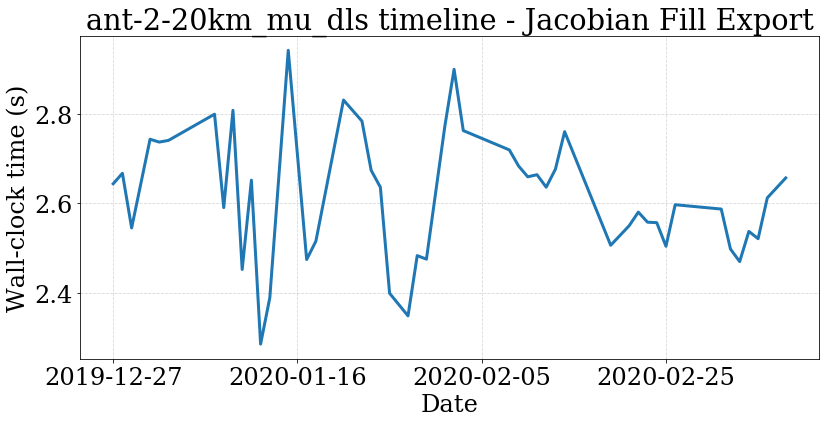

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.64387, 2.66735, 2.54493, 2.74355, 2.73719, 2.74097, 2.79966, 2.59046, 2.80833, 2.45193, 2.65192, 2.28481, 2.38884, 2.94265, 2.4742, 2.51532, 2.83137, 2.78419, 2.67398, 2.6361, 2.39871, 2.34803, 2.48294, 2.47508, 2.77303, 2.9002, 2.76293, 2.71969, 2.68366, 2.6594, 2.66415, 2.63622, 2.67653, 2.76054, 2.50617, 2.54978, 2.58036, 2.5578, 2.55675, 2.50392, 2.59691, 2.58723, 2.49773, 2.46962, 2.53719, 2.52083, 2.61233, 2.65692)


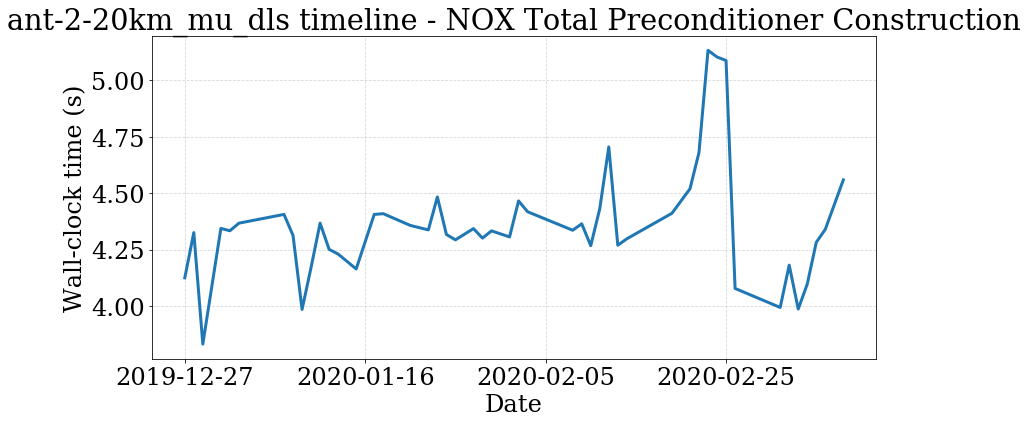

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (4.12441, 4.32488, 3.83063, 4.34351, 4.33311, 4.36679, 4.40563, 4.31225, 3.98421, 4.17083, 4.36694, 4.25055, 4.22984, 4.1637, 4.40564, 4.40885, 4.35671, 4.33697, 4.48293, 4.31675, 4.29287, 4.34268, 4.3005, 4.33269, 4.30577, 4.46553, 4.41744, 4.33536, 4.36395, 4.26718, 4.43074, 4.70483, 4.26883, 4.29751, 4.41059, 4.51912, 4.68017, 5.13298, 5.10337, 5.08776, 4.07741, 3.9932, 4.18076, 3.98607, 4.09659, 4.28165, 4.33945, 4.55864)


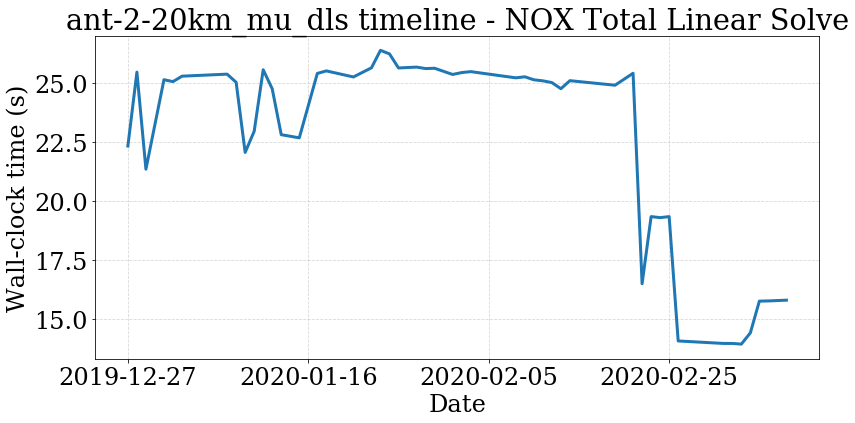

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (22.3325, 25.4595, 21.3531, 25.1385, 25.0575, 25.2879, 25.3739, 25.0303, 22.0631, 22.9551, 25.5596, 24.7536, 22.8135, 22.6792, 25.4039, 25.5114, 25.2547, 25.6415, 26.3814, 26.2307, 25.635, 25.672, 25.6094, 25.6229, 25.3601, 25.4401, 25.4806, 25.2177, 25.2615, 25.1355, 25.0914, 25.0175, 24.7574, 25.098, 24.9053, 25.4119, 16.507, 19.3478, 19.304, 19.3475, 14.0877, 13.9827, 13.982, 13.954, 14.4296, 15.7719, 15.7803, 15.8129)


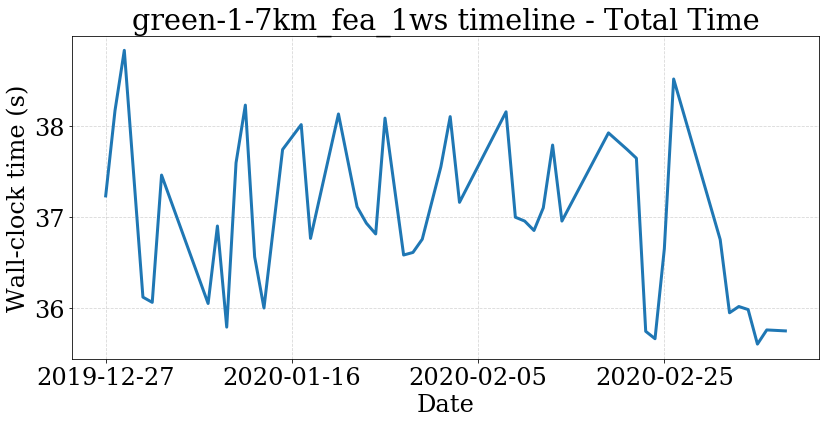

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (37.2355, 38.1735, 38.8363, 36.1227, 36.065, 37.4648, 36.0527, 36.9047, 35.7928, 37.599, 38.2341, 36.5656, 36.0028, 37.7452, 38.0193, 36.7683, 38.1366, 37.1158, 36.9354, 36.8173, 38.091, 36.5858, 36.6139, 36.7594, 37.5562, 38.1075, 37.1649, 38.1603, 37.0013, 36.959, 36.8555, 37.1049, 37.7948, 36.959, 37.9285, 37.7463, 37.65, 35.7467, 35.6653, 36.6537, 38.5211, 36.7554, 35.9507, 36.0195, 35.9859, 35.6061, 35.762, 35.7514)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.14768, 3.08317, 3.15644, 1.08146, 1.05103, 2.67378, 1.07159, 1.14416, 1.04528, 2.18083, 2.17288, 1.09806, 1.09642, 2.21232, 2.65796, 1.17832, 2.20464, 1.10084, 1.20931, 1.11882, 2.64196, 1.13057, 1.10149, 1.20331, 2.18349, 1.75471, 1.15535, 2.24141, 1.13332, 1.07842, 1.10779, 1.19391, 2.63924, 1.13791, 2.54322, 3.03357, 2.60968, 1.09412, 1.10479, 1.61108, 3.07578, 2.18513, 1.04173, 1.02517, 1.04909, 1.04547, 1.04038, 1.03756)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (33.0787, 33.2894, 33.5774, 33.0503, 33.0344, 32.9527, 33.1615, 33.7378, 32.9462, 33.3978, 33.8113, 33.4137, 32.9817, 33.5452, 33.5755, 33.6716, 33.6768, 33.7088, 33.5041, 33.476, 33.609, 33.5779, 33.596, 33.6492, 33.3699, 33.8922, 33.5593, 33.6482, 33.5896, 33.631, 33.4885, 33.5822, 33.163, 33.5531, 33.5998, 32.9778, 33.0799, 32.9585, 32.8932, 33.1376, 33.4577, 32.928, 33.2247, 33.2466, 33.22, 32.9373, 33.0626, 32.9926)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (9.71839, 9.72102, 9.74507, 9.70016, 9.67973, 9.76637, 9.71006, 9.77325, 9.71799, 9.7745, 9.8523, 9.69617, 9.70659, 9.84072, 9.86086, 9.79161, 9.78456, 9.74777, 9.76199, 9.74166, 9.79675, 9.77558, 9.7966, 9.78886, 9.75557, 9.8268, 9.80446, 9.82257, 9.81802, 9.79566, 9.80373, 9.81995, 9.74605, 9.78941, 9.83906, 9.75979, 9.78592, 9.72661, 9.75224, 9.7311, 9.77135, 9.79122, 9.81704, 9.81603, 9.81645, 9.7612, 9.76387, 9.79029)


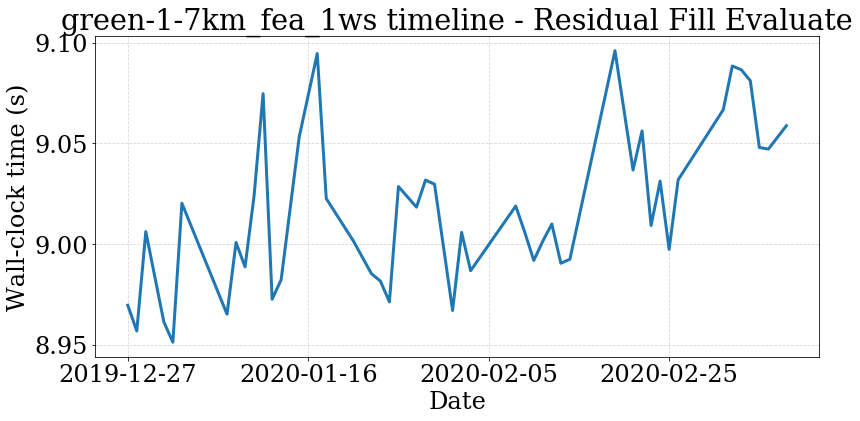

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (8.96973, 8.95696, 9.00623, 8.96144, 8.95139, 9.0203, 8.96529, 9.00086, 8.98874, 9.02401, 9.07465, 8.97269, 8.98236, 9.05312, 9.09455, 9.02263, 9.00165, 8.98542, 8.98172, 8.97139, 9.02858, 9.01836, 9.0318, 9.02974, 8.96712, 9.00584, 8.98686, 9.01891, 9.00591, 8.99195, 9.00152, 9.01001, 8.99055, 8.99255, 9.09594, 9.03678, 9.05617, 9.00926, 9.03129, 8.99743, 9.03191, 9.06668, 9.08835, 9.08649, 9.08104, 9.04796, 9.04717, 9.05875)


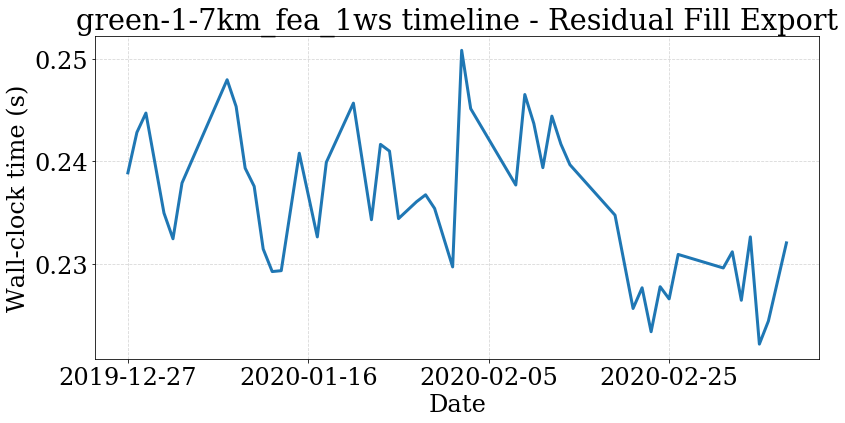

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.238863, 0.242812, 0.244703, 0.234944, 0.232426, 0.237873, 0.247955, 0.245341, 0.239325, 0.237549, 0.231428, 0.229227, 0.229313, 0.240784, 0.232609, 0.2399, 0.245672, 0.234286, 0.241648, 0.240987, 0.234396, 0.236047, 0.236722, 0.235391, 0.229679, 0.250828, 0.245134, 0.237678, 0.246514, 0.243676, 0.239371, 0.244405, 0.241668, 0.23966, 0.234734, 0.225622, 0.227643, 0.223352, 0.227748, 0.226553, 0.230899, 0.229577, 0.231155, 0.226422, 0.232611, 0.222143, 0.224395, 0.232028)


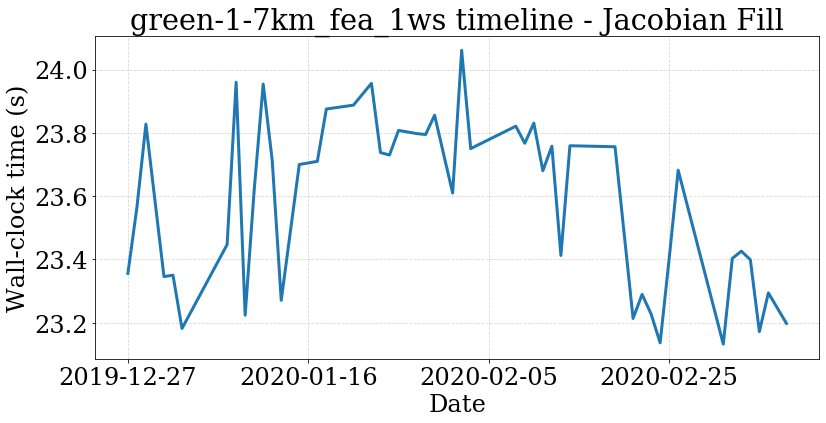

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (23.3558, 23.5639, 23.8278, 23.3457, 23.3502, 23.1817, 23.4469, 23.9602, 23.2236, 23.6188, 23.9545, 23.7131, 23.2707, 23.7001, 23.71, 23.8755, 23.8877, 23.9566, 23.7378, 23.73, 23.8078, 23.7979, 23.7948, 23.8559, 23.6099, 24.061, 23.7503, 23.8212, 23.7672, 23.8309, 23.6803, 23.7578, 23.4125, 23.7594, 23.7562, 23.2135, 23.2895, 23.2273, 23.1364, 23.402, 23.6819, 23.1323, 23.4031, 23.4261, 23.3991, 23.1716, 23.2942, 23.1978)


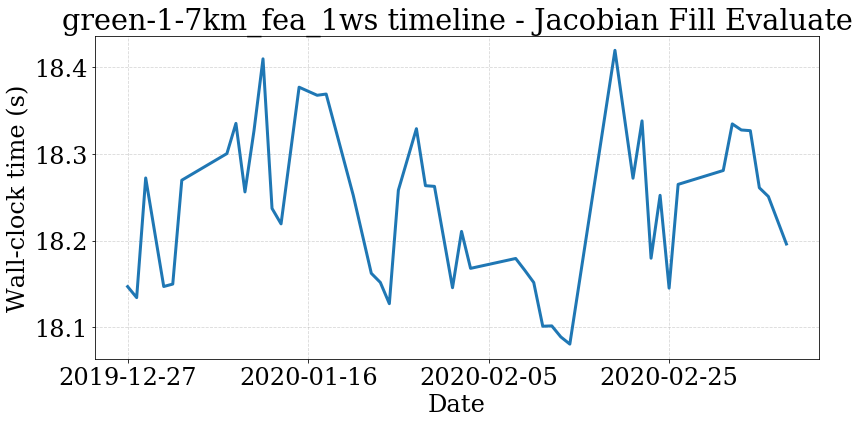

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (18.147, 18.1343, 18.2722, 18.1471, 18.1499, 18.2696, 18.3003, 18.3351, 18.2561, 18.3266, 18.4095, 18.2371, 18.2193, 18.3768, 18.3675, 18.3689, 18.2522, 18.1623, 18.1518, 18.1273, 18.2581, 18.329, 18.2633, 18.2625, 18.1457, 18.2106, 18.168, 18.1794, 18.1659, 18.1517, 18.1013, 18.1017, 18.089, 18.0807, 18.4193, 18.2719, 18.338, 18.1797, 18.2522, 18.1452, 18.2648, 18.2808, 18.3345, 18.3275, 18.3267, 18.2609, 18.2508, 18.1961)


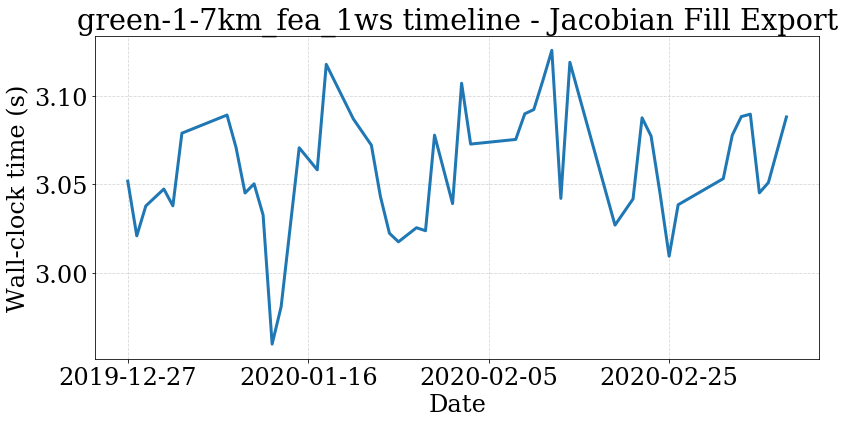

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (3.05192, 3.02101, 3.0379, 3.04744, 3.03797, 3.07896, 3.0892, 3.07091, 3.04519, 3.05039, 3.03279, 2.95992, 2.98109, 3.07074, 3.05829, 3.11782, 3.08702, 3.07219, 3.0433, 3.0225, 3.01764, 3.02561, 3.02391, 3.07786, 3.03923, 3.10716, 3.07281, 3.07543, 3.08989, 3.09229, 3.10859, 3.12572, 3.04215, 3.11898, 3.02707, 3.04185, 3.08763, 3.07733, 3.04469, 3.00953, 3.03857, 3.05331, 3.07785, 3.08832, 3.08969, 3.04528, 3.05107, 3.08813)


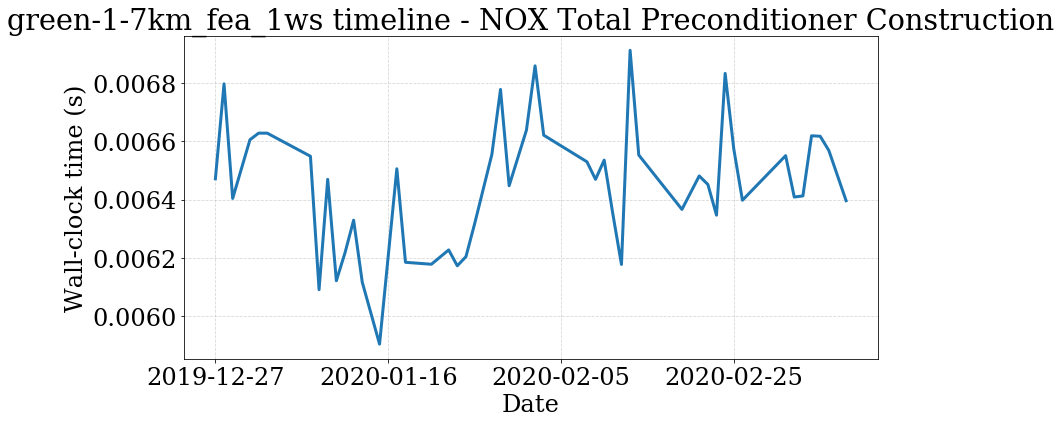

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.00647128, 0.00679808, 0.00640373, 0.00660568, 0.00662839, 0.00662837, 0.00654892, 0.0060899, 0.00646953, 0.00612059, 0.00621657, 0.00632895, 0.00611545, 0.00590264, 0.00650587, 0.00618407, 0.00617734, 0.00622664, 0.00617211, 0.00620352, 0.00631603, 0.00655504, 0.0067788, 0.00644747, 0.00663865, 0.00686001, 0.00662147, 0.00652993, 0.00646941, 0.00653562, 0.00635072, 0.00617662, 0.00691329, 0.00655327, 0.00636602, 0.00648112, 0.00645192, 0.00634622, 0.00683397, 0.00657391, 0.00639757, 0.

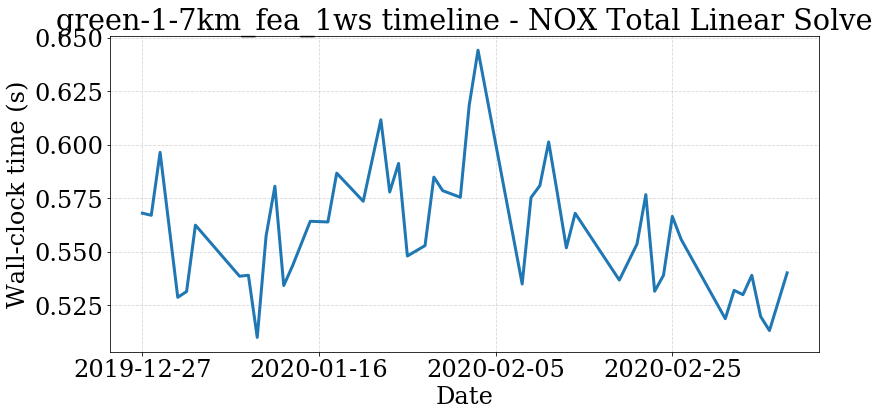

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.567963, 0.56698, 0.596383, 0.528657, 0.531359, 0.562384, 0.538508, 0.538958, 0.509912, 0.55727, 0.580554, 0.534157, 0.543385, 0.564177, 0.563857, 0.586669, 0.573534, 0.611589, 0.577858, 0.59119, 0.54795, 0.552825, 0.5848, 0.578485, 0.575379, 0.618345, 0.644113, 0.534883, 0.575247, 0.580831, 0.60124, 0.576855, 0.551773, 0.567918, 0.536713, 0.553526, 0.57663, 0.531487, 0.538938, 0.566483, 0.555719, 0.518652, 0.531913, 0.529886, 0.538927, 0.519712, 0.513117, 0.540087)


Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (9.4115, 9.68225, 9.54199, 9.42728, 9.34254, 9.49711, 9.39029, 9.83355, 9.40661, 9.86512, 10.2297, 9.38136, 9.45493, 10.2325, 9.83514, 10.2608, 10.184, 10.1803, 10.2396, 10.0801, 10.0457, 10.2229, 10.0038, 10.0932, 9.98536, 10.3094, 10.4623, 10.2535, 10.4874, 10.2954, 10.4077, 10.4285, 9.72523, 10.1795, 10.0657, 9.41455, 9.36049, 9.27193, 9.34689, 9.30606, 9.37008, 9.20792, 9.19989, 9.07706, 9.08758, 9.06654, 9.69837, 9.10143, 9.00009)


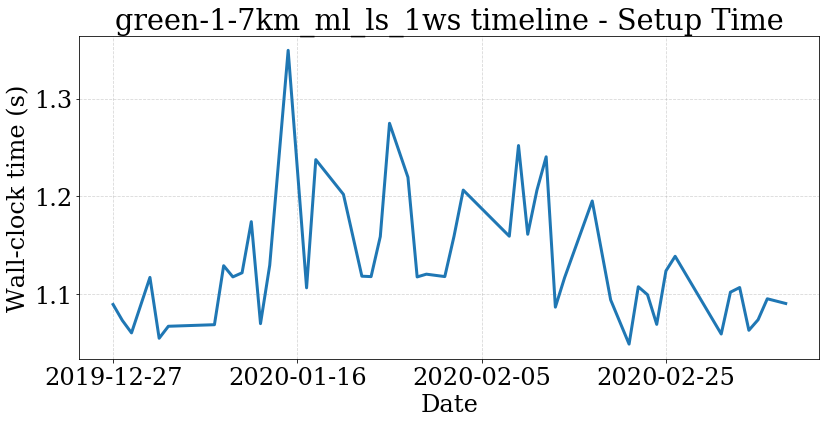

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.0894, 1.07315, 1.06032, 1.11708, 1.05481, 1.0671, 1.0687, 1.12905, 1.1176, 1.1218, 1.1741, 1.06977, 1.12955, 1.34934, 1.10641, 1.23752, 1.202, 1.11832, 1.11789, 1.15886, 1.27472, 1.2195, 1.11757, 1.12039, 1.11792, 1.15915, 1.2064, 1.15921, 1.25196, 1.16119, 1.2063, 1.24045, 1.08666, 1.1168, 1.19525, 1.0941, 1.04885, 1.10752, 1.09937, 1.06904, 1.12374, 1.13868, 1.05919, 1.10198, 1.10673, 1.06297, 1.07377, 1.09522, 1.0904)


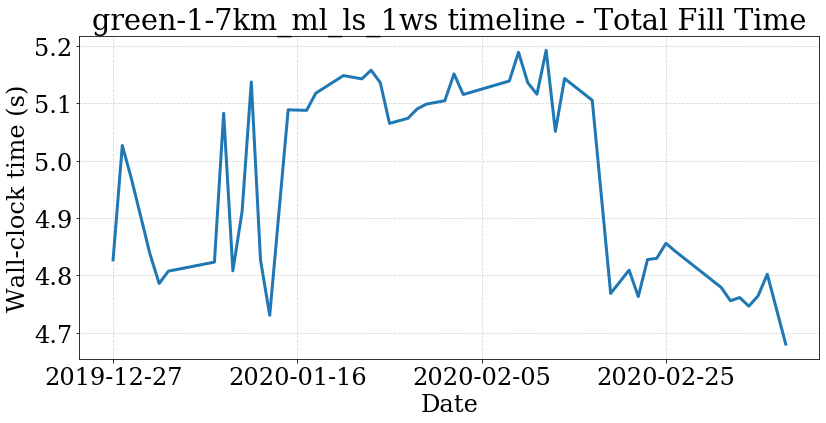

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (4.82709, 5.02645, 4.96793, 4.83757, 4.78591, 4.80744, 4.8232, 5.08256, 4.80797, 4.91122, 5.13716, 4.82682, 4.73052, 5.08855, 5.08762, 5.11753, 5.14819, 5.14243, 5.15756, 5.13582, 5.06488, 5.07378, 5.09008, 5.09843, 5.10439, 5.15116, 5.1152, 5.13871, 5.18881, 5.13594, 5.11568, 5.19219, 5.05098, 5.1431, 5.10522, 4.76858, 4.80926, 4.7632, 4.82762, 4.8298, 4.85601, 4.84229, 4.779, 4.75593, 4.76148, 4.74636, 4.76445, 4.80207, 4.68033)


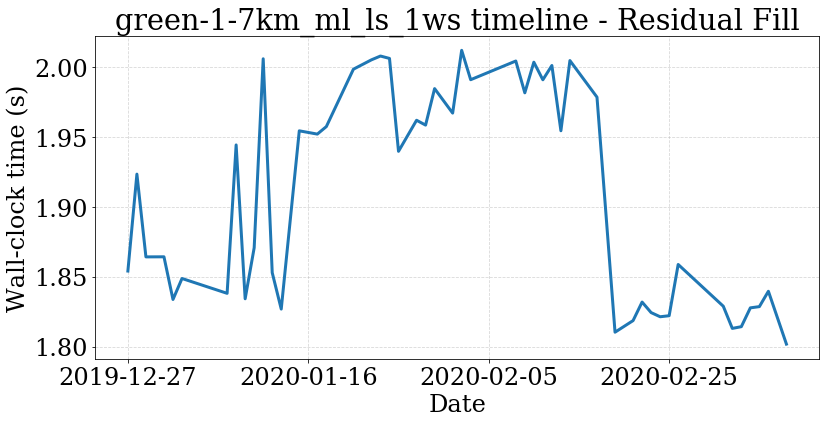

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.85396, 1.92323, 1.86408, 1.86414, 1.83364, 1.84864, 1.83803, 1.9441, 1.83413, 1.8706, 2.00567, 1.85279, 1.82678, 1.95417, 1.95184, 1.95721, 1.99822, 2.00492, 2.00763, 2.00592, 1.93953, 1.96173, 1.95827, 1.98436, 1.96684, 2.01171, 1.99072, 2.00407, 1.98134, 2.00322, 1.99066, 2.00086, 1.95422, 2.00438, 1.97824, 1.81025, 1.81854, 1.83179, 1.82427, 1.82129, 1.82203, 1.85866, 1.82882, 1.81297, 1.8142, 1.82765, 1.82853, 1.83951, 1.80174)


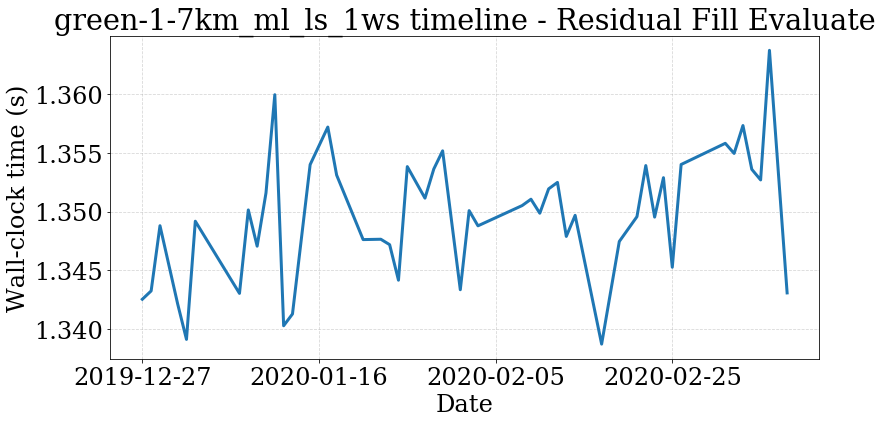

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.34255, 1.34326, 1.3488, 1.34216, 1.33914, 1.34918, 1.34305, 1.35014, 1.34706, 1.35158, 1.35993, 1.3403, 1.3413, 1.35399, 1.35718, 1.3531, 1.34762, 1.34765, 1.34719, 1.34417, 1.35382, 1.35114, 1.35362, 1.35516, 1.34336, 1.35008, 1.34879, 1.35051, 1.35105, 1.34986, 1.35193, 1.35248, 1.34789, 1.34968, 1.33874, 1.34746, 1.34957, 1.35391, 1.34953, 1.35288, 1.34527, 1.354, 1.3558, 1.35494, 1.35731, 1.35359, 1.35269, 1.3637, 1.34309)


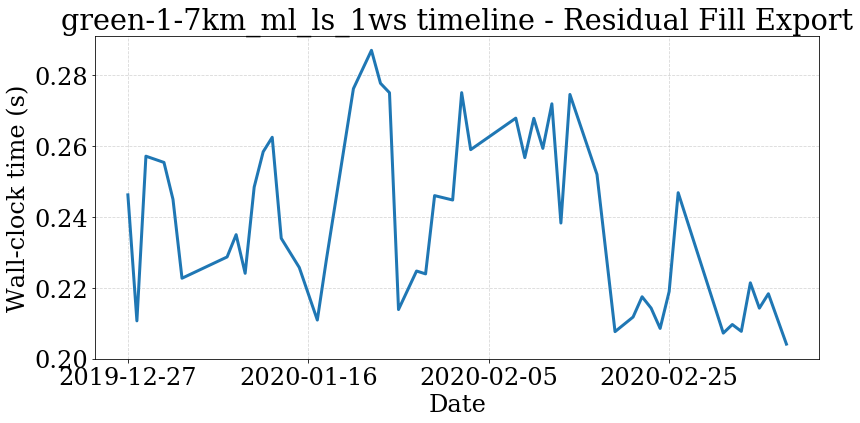

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.24615, 0.210639, 0.257046, 0.255288, 0.244883, 0.222652, 0.228653, 0.234934, 0.224039, 0.24833, 0.258298, 0.262372, 0.233907, 0.22568, 0.210869, 0.227821, 0.276066, 0.286878, 0.277593, 0.274928, 0.213825, 0.224684, 0.22388, 0.245933, 0.244698, 0.274952, 0.258887, 0.267768, 0.25664, 0.267719, 0.259241, 0.271812, 0.238206, 0.274447, 0.251905, 0.207603, 0.211721, 0.217432, 0.21423, 0.208512, 0.218906, 0.246759, 0.207187, 0.209612, 0.207682, 0.221361, 0.214221, 0.218286, 0.204089

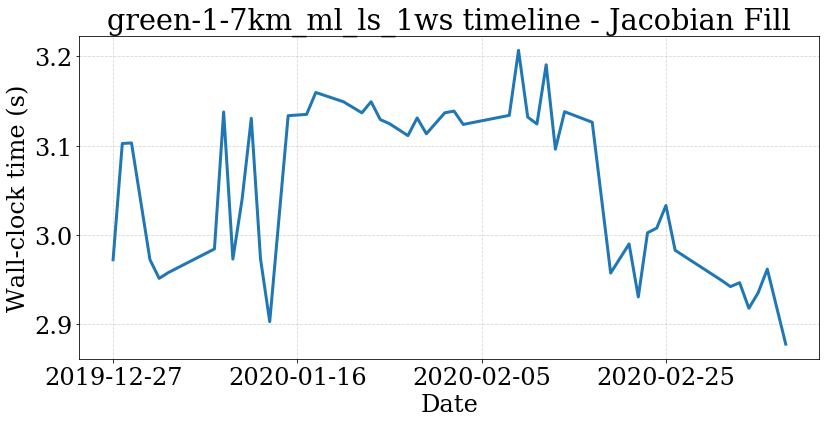

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.97245, 3.1026, 3.10316, 2.97264, 2.9516, 2.95811, 2.98451, 3.13788, 2.97317, 3.04001, 3.13081, 2.97342, 2.90313, 3.13371, 3.13515, 3.15968, 3.1493, 3.13691, 3.14934, 3.12931, 3.12476, 3.1114, 3.1312, 3.11344, 3.13695, 3.13883, 3.1239, 3.13405, 3.20685, 3.13213, 3.12441, 3.19072, 3.09616, 3.13813, 3.12639, 2.95756, 2.9901, 2.9308, 3.00264, 3.00787, 3.03322, 2.98301, 2.94958, 2.94239, 2.9467, 2.91813, 2.93532, 2.96196, 2.87801)


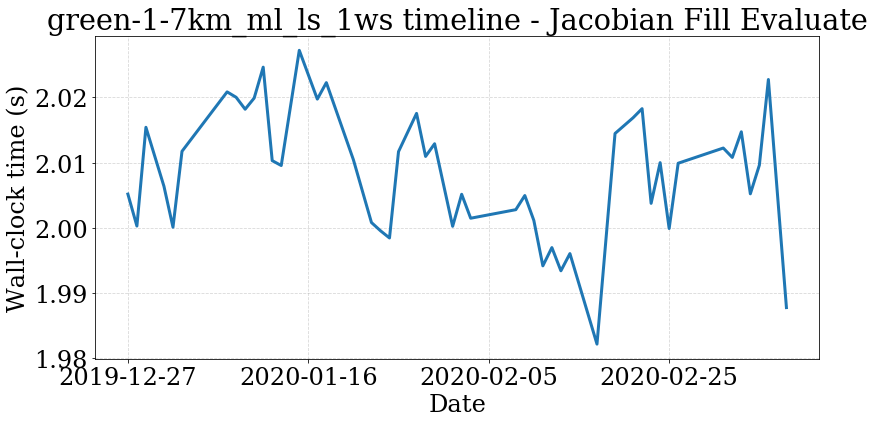

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.00519, 2.00029, 2.01543, 2.00638, 2.00011, 2.01175, 2.02086, 2.02003, 2.0182, 2.01991, 2.02465, 2.01032, 2.00957, 2.02723, 2.01975, 2.02228, 2.01045, 2.00083, 1.99957, 1.99846, 2.0117, 2.01756, 2.01096, 2.01291, 2.00025, 2.00516, 2.00149, 2.0028, 2.00497, 2.00115, 1.99419, 1.99699, 1.99343, 1.99607, 1.98219, 2.01448, 2.01689, 2.01829, 2.00377, 2.01001, 1.99991, 2.00992, 2.01225, 2.01081, 2.01474, 2.00523, 2.00963, 2.02276, 1.98779)


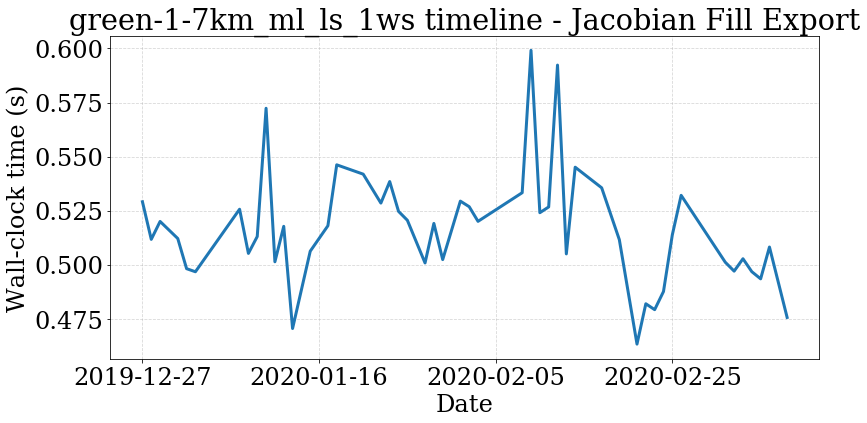

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.529096, 0.511693, 0.519979, 0.51208, 0.498123, 0.4967, 0.525636, 0.505195, 0.513009, 0.572344, 0.501306, 0.517716, 0.470436, 0.506207, 0.517983, 0.546177, 0.541857, 0.52847, 0.538432, 0.524634, 0.520511, 0.500771, 0.519063, 0.502327, 0.529379, 0.526798, 0.520022, 0.533271, 0.599151, 0.524017, 0.526688, 0.592323, 0.50496, 0.545079, 0.535539, 0.511543, 0.463221, 0.481889, 0.479164, 0.487546, 0.51377, 0.532061, 0.501081, 0.496985, 0.50272, 0.496737, 0.49342, 0.50814, 0.475566)


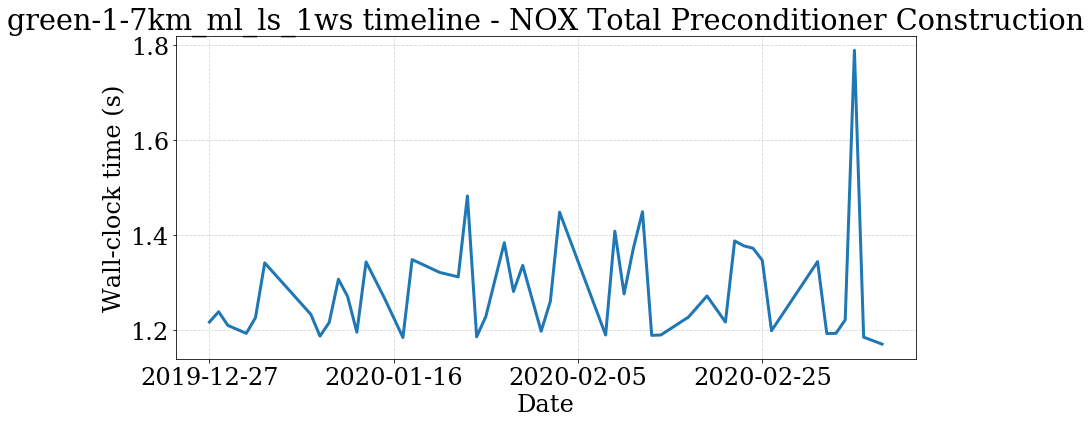

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.2168, 1.23857, 1.20975, 1.19294, 1.22622, 1.34133, 1.23312, 1.18717, 1.21596, 1.30679, 1.27045, 1.19533, 1.34334, 1.26705, 1.18427, 1.34829, 1.32118, 1.31183, 1.48225, 1.18576, 1.22858, 1.3838, 1.28106, 1.3361, 1.19751, 1.26048, 1.44806, 1.18957, 1.40817, 1.27606, 1.37119, 1.44905, 1.18872, 1.18961, 1.22744, 1.27166, 1.21683, 1.38752, 1.37719, 1.37208, 1.34681, 1.19846, 1.34397, 1.19254, 1.19309, 1.22147, 1.78869, 1.18499, 1.17035)


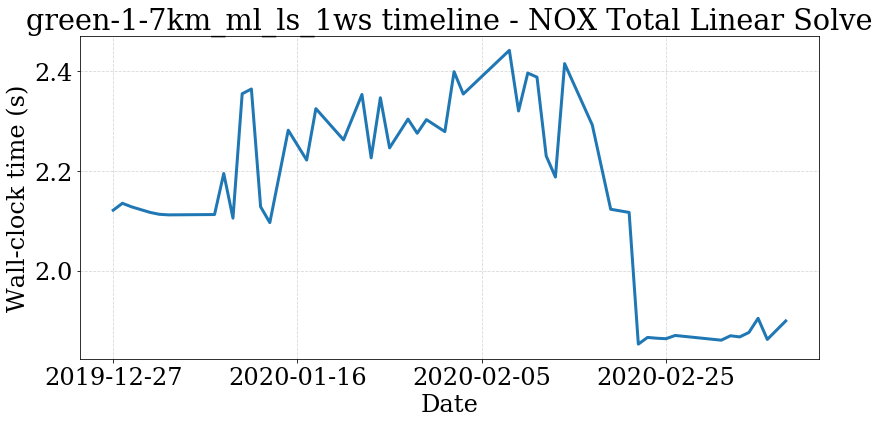

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.12095, 2.13483, 2.12766, 2.11656, 2.11276, 2.1116, 2.11227, 2.19463, 2.10505, 2.35455, 2.36411, 2.12791, 2.09603, 2.2814, 2.22154, 2.32473, 2.2621, 2.35309, 2.22596, 2.34648, 2.24602, 2.30364, 2.27531, 2.30263, 2.27857, 2.39882, 2.35397, 2.44165, 2.31995, 2.39607, 2.38782, 2.22974, 2.18747, 2.41506, 2.29203, 2.12287, 2.11651, 1.85236, 1.86577, 1.86416, 1.86317, 1.8697, 1.86026, 1.86909, 1.8668, 1.87565, 1.90415, 1.86173, 1.89885)


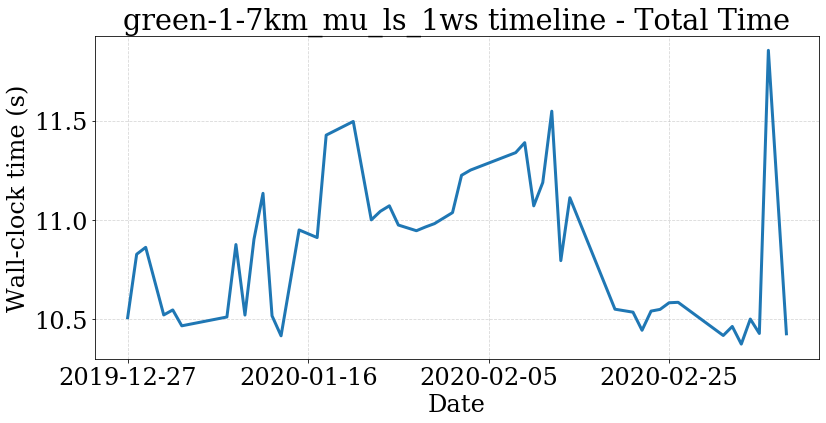

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (10.5075, 10.8269, 10.8616, 10.5212, 10.5465, 10.4665, 10.5109, 10.8757, 10.5206, 10.9025, 11.1336, 10.517, 10.4162, 10.9492, 10.9108, 11.4265, 11.4954, 10.9998, 11.0429, 11.0707, 10.9739, 10.9453, 10.9641, 10.981, 11.0365, 11.2244, 11.2507, 11.3385, 11.3887, 11.0705, 11.1879, 11.5471, 10.7947, 11.1114, 10.5502, 10.5352, 10.444, 10.5406, 10.5492, 10.5826, 10.5848, 10.4178, 10.4633, 10.3744, 10.5006, 10.428, 11.8535, 10.4263)


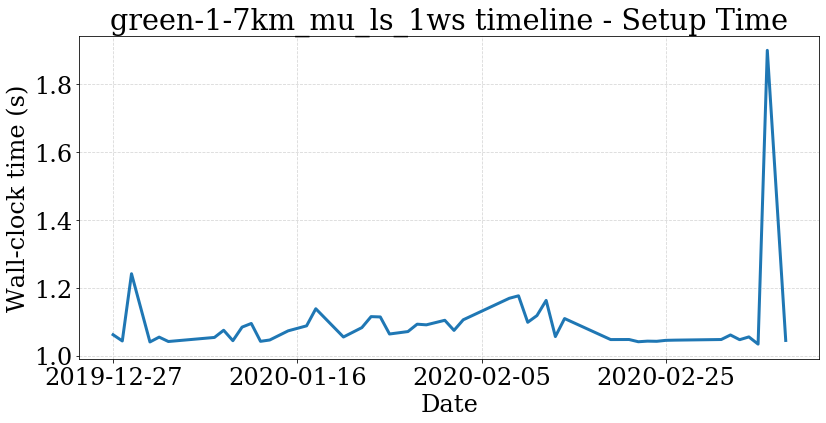

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.06148, 1.04303, 1.24136, 1.04013, 1.05439, 1.04143, 1.05342, 1.07464, 1.04387, 1.08391, 1.09469, 1.04197, 1.04588, 1.07291, 1.08765, 1.13806, 1.05472, 1.08243, 1.11485, 1.11391, 1.06358, 1.07077, 1.09255, 1.09061, 1.10403, 1.07422, 1.10548, 1.16896, 1.17626, 1.0981, 1.11793, 1.16274, 1.056, 1.10917, 1.04715, 1.04733, 1.04075, 1.04251, 1.04203, 1.04488, 1.04547, 1.0473, 1.06071, 1.04677, 1.055, 1.03375, 1.90048, 1.04455)


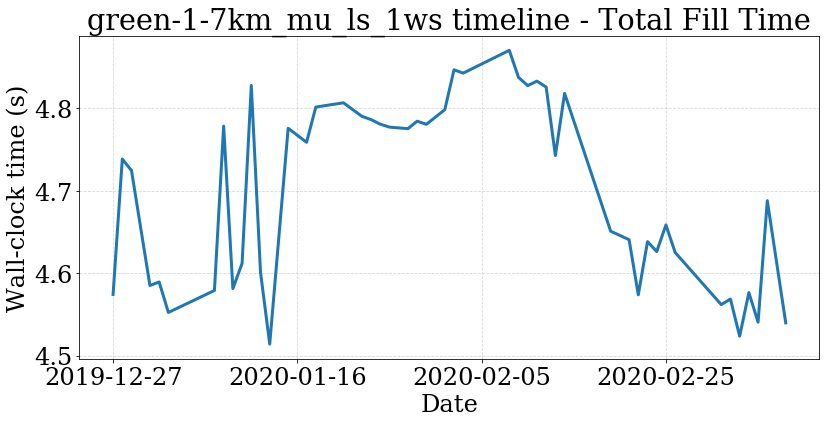

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (4.57414, 4.73833, 4.72438, 4.58499, 4.58926, 4.5523, 4.57894, 4.77826, 4.58124, 4.61175, 4.8276, 4.60111, 4.5139, 4.77567, 4.75866, 4.80138, 4.80659, 4.79018, 4.7862, 4.78059, 4.77706, 4.7752, 4.78428, 4.78046, 4.79823, 4.84658, 4.84257, 4.8702, 4.8374, 4.82742, 4.8328, 4.82565, 4.74258, 4.81794, 4.65086, 4.64053, 4.57369, 4.63821, 4.62617, 4.65845, 4.62503, 4.56183, 4.5685, 4.52351, 4.57638, 4.54051, 4.68786, 4.5397)


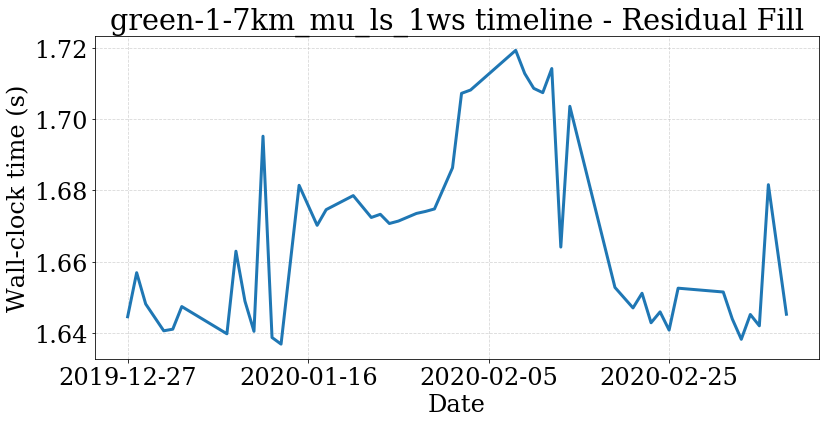

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.6446, 1.65695, 1.64818, 1.64067, 1.64112, 1.64746, 1.63983, 1.66297, 1.64897, 1.64052, 1.69519, 1.63879, 1.63694, 1.68143, 1.67022, 1.67462, 1.67855, 1.67242, 1.67331, 1.67073, 1.67141, 1.67355, 1.67411, 1.67481, 1.68634, 1.7072, 1.70813, 1.71925, 1.71276, 1.7086, 1.70739, 1.71415, 1.66413, 1.70357, 1.65282, 1.64708, 1.65119, 1.64292, 1.64597, 1.64087, 1.65261, 1.65154, 1.644, 1.63829, 1.64524, 1.64207, 1.68161, 1.64531)


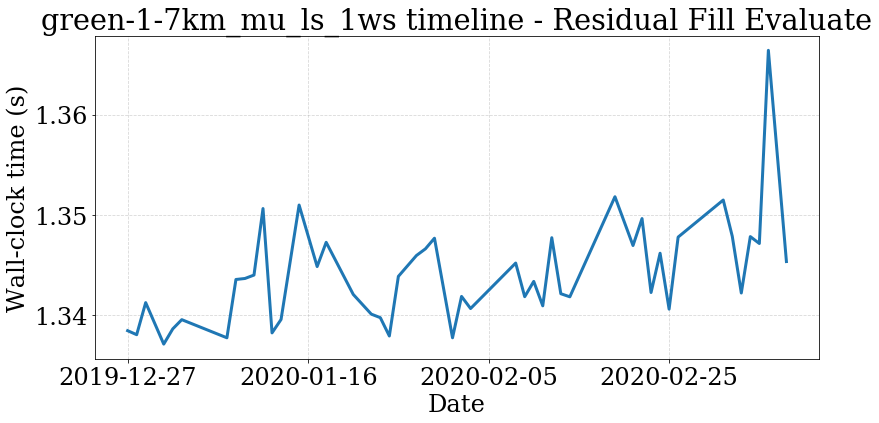

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.33843, 1.33803, 1.34123, 1.33709, 1.33861, 1.33953, 1.33772, 1.34354, 1.34364, 1.34398, 1.35062, 1.33821, 1.33955, 1.35097, 1.34483, 1.34725, 1.34205, 1.34008, 1.33973, 1.3379, 1.34385, 1.34593, 1.3466, 1.34766, 1.33772, 1.34185, 1.34064, 1.34518, 1.34182, 1.34335, 1.34091, 1.34771, 1.34212, 1.34181, 1.3518, 1.34693, 1.34962, 1.34224, 1.34616, 1.34058, 1.34777, 1.35147, 1.34785, 1.34219, 1.34782, 1.34713, 1.36641, 1.34533)


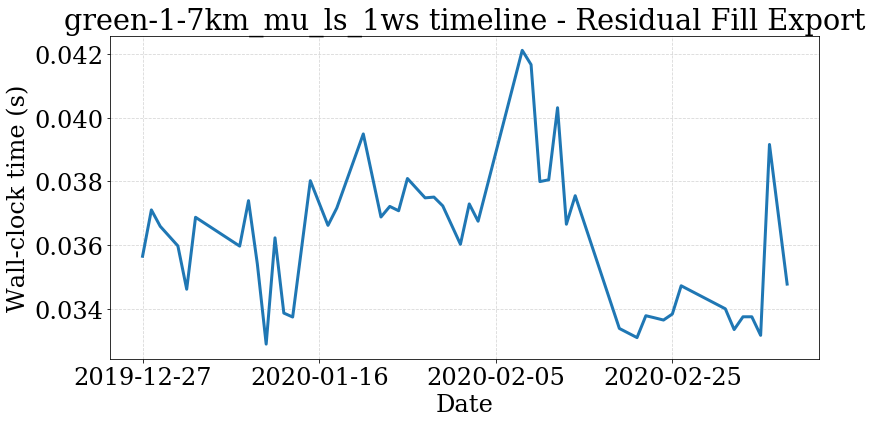

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.0356494, 0.037106, 0.0365914, 0.0359748, 0.0346129, 0.0368749, 0.0359683, 0.0373973, 0.0354071, 0.0328885, 0.0362289, 0.033864, 0.0337399, 0.0380245, 0.0366202, 0.0371668, 0.039494, 0.036883, 0.0372163, 0.0370798, 0.0380936, 0.0374849, 0.0375091, 0.0372324, 0.0360265, 0.037294, 0.0367513, 0.0421215, 0.0416718, 0.0379965, 0.0380528, 0.0403176, 0.0366562, 0.0375525, 0.0333804, 0.033093, 0.0337807, 0.0337142, 0.0336448, 0.0338347, 0.0347219, 0.0339987, 0.033346, 0.0337472, 0.0337476, 0.03

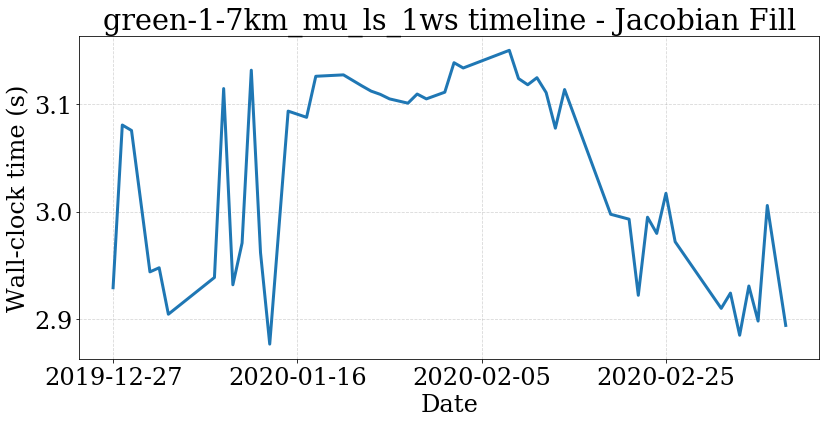

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.92893, 3.08066, 3.07557, 2.94372, 2.94754, 2.90422, 2.93849, 3.11466, 2.93166, 2.97063, 3.13179, 2.96171, 2.87635, 3.09363, 3.08783, 3.12611, 3.12743, 3.11716, 3.11229, 3.10925, 3.10503, 3.10103, 3.10955, 3.10503, 3.11128, 3.13877, 3.13384, 3.15031, 3.12399, 3.1182, 3.12478, 3.11088, 3.0777, 3.11374, 2.99743, 2.99285, 2.92187, 2.99468, 2.97958, 3.01697, 2.97182, 2.90968, 2.92391, 2.88462, 2.93054, 2.89783, 3.00564, 2.89377)


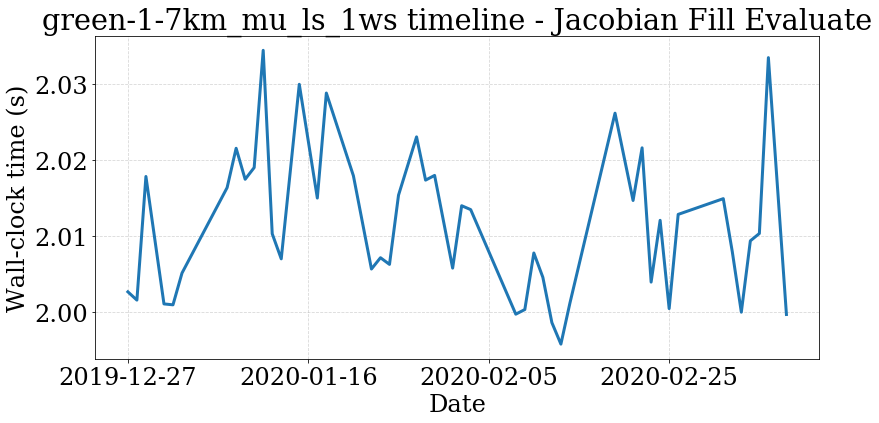

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.00266, 2.00157, 2.01784, 2.00107, 2.00095, 2.00513, 2.01637, 2.02155, 2.01747, 2.01901, 2.03444, 2.0103, 2.007, 2.02997, 2.015, 2.02882, 2.01793, 2.00566, 2.00715, 2.00627, 2.01538, 2.02305, 2.01736, 2.01798, 2.00578, 2.01399, 2.01348, 1.99972, 2.00033, 2.00777, 2.00457, 1.99861, 1.99578, 2.00118, 2.02617, 2.01468, 2.02161, 2.00394, 2.01207, 2.00045, 2.01285, 2.01492, 2.00793, 1.99998, 2.00937, 2.01034, 2.03348, 1.99968)


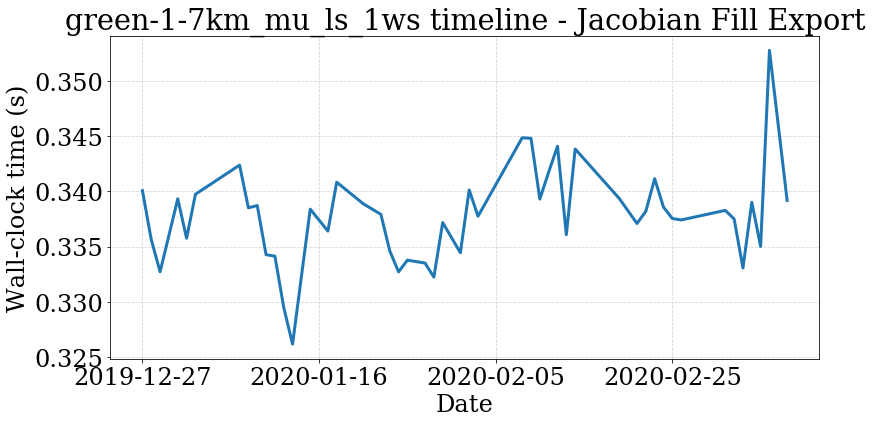

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.340061, 0.33563, 0.332719, 0.339322, 0.335752, 0.339733, 0.342374, 0.338507, 0.338715, 0.334264, 0.334136, 0.329497, 0.326177, 0.338387, 0.336402, 0.340825, 0.338876, 0.337915, 0.334629, 0.332715, 0.333771, 0.33351, 0.332237, 0.337174, 0.334448, 0.340122, 0.337745, 0.344846, 0.344793, 0.339298, 0.341742, 0.34408, 0.336076, 0.343829, 0.339347, 0.337088, 0.338191, 0.341143, 0.338575, 0.337542, 0.33741, 0.338276, 0.337497, 0.333066, 0.339004, 0.335009, 0.352757, 0.33917)


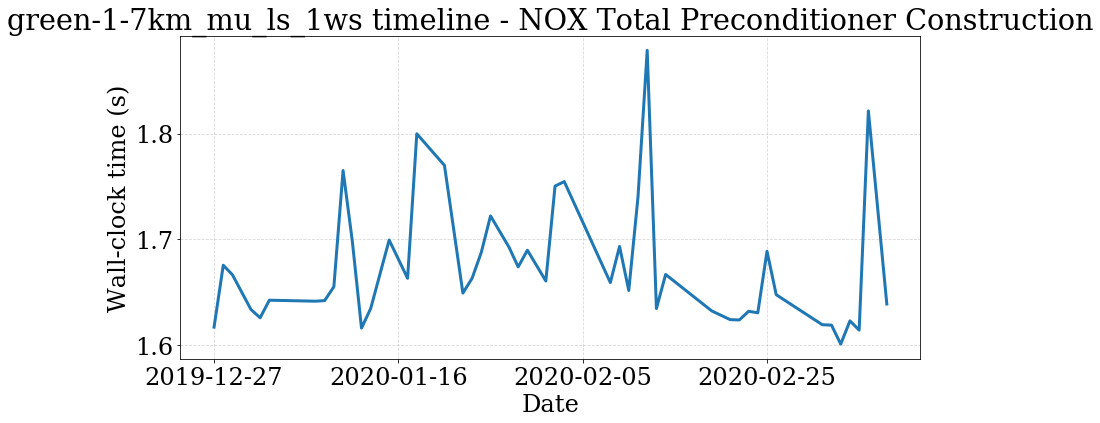

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.61708, 1.67556, 1.66648, 1.6338, 1.6259, 1.64253, 1.64158, 1.64215, 1.65523, 1.76509, 1.69852, 1.61616, 1.63476, 1.6994, 1.66322, 1.79979, 1.76993, 1.64924, 1.66325, 1.68781, 1.72217, 1.69271, 1.674, 1.68976, 1.66071, 1.75034, 1.75462, 1.65916, 1.69335, 1.6517, 1.73994, 1.87865, 1.63463, 1.66685, 1.6324, 1.62416, 1.62386, 1.63203, 1.63064, 1.68877, 1.64772, 1.61935, 1.61895, 1.60103, 1.62299, 1.61427, 1.82142, 1.63893)


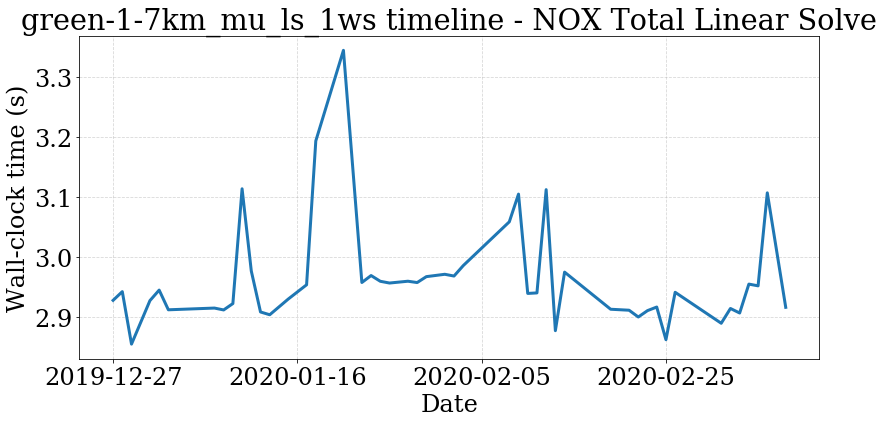

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.92803, 2.94257, 2.85506, 2.92761, 2.94514, 2.91228, 2.91516, 2.91203, 2.92267, 3.11407, 2.97692, 2.90865, 2.90401, 2.93007, 2.95397, 3.19386, 3.34493, 2.95778, 2.96939, 2.95982, 2.95691, 2.95992, 2.9577, 2.96757, 2.97149, 2.96857, 2.98594, 3.05895, 3.10519, 2.93956, 2.94044, 3.11264, 2.87745, 2.97511, 2.91319, 2.91157, 2.90027, 2.91091, 2.91687, 2.86242, 2.94148, 2.88982, 2.91448, 2.90693, 2.95513, 2.95223, 3.10729, 2.91638)


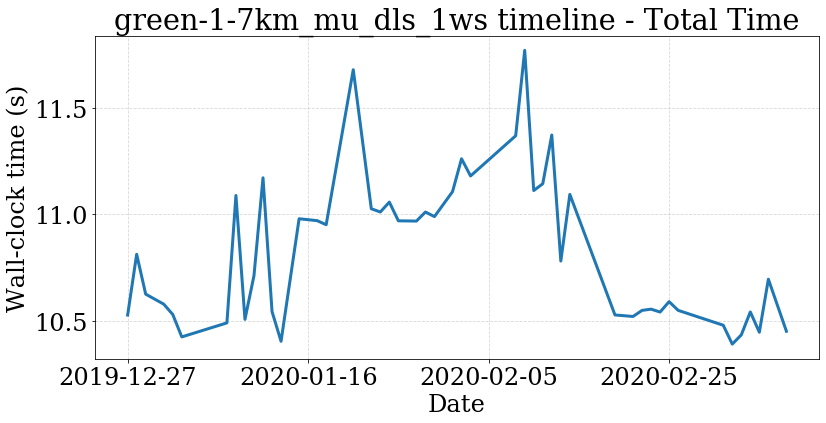

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (10.5265, 10.8118, 10.6247, 10.5777, 10.5292, 10.4239, 10.4897, 11.0879, 10.5062, 10.7116, 11.1709, 10.5429, 10.4033, 10.9786, 10.9697, 10.9506, 11.6783, 11.0256, 11.0102, 11.0568, 10.9689, 10.9677, 11.0102, 10.9887, 11.1058, 11.2601, 11.1795, 11.3682, 11.7693, 11.111, 11.143, 11.3718, 10.78, 11.093, 10.527, 10.5198, 10.5484, 10.5542, 10.5406, 10.5894, 10.5486, 10.4787, 10.3901, 10.4334, 10.5411, 10.4457, 10.6949, 10.4504)


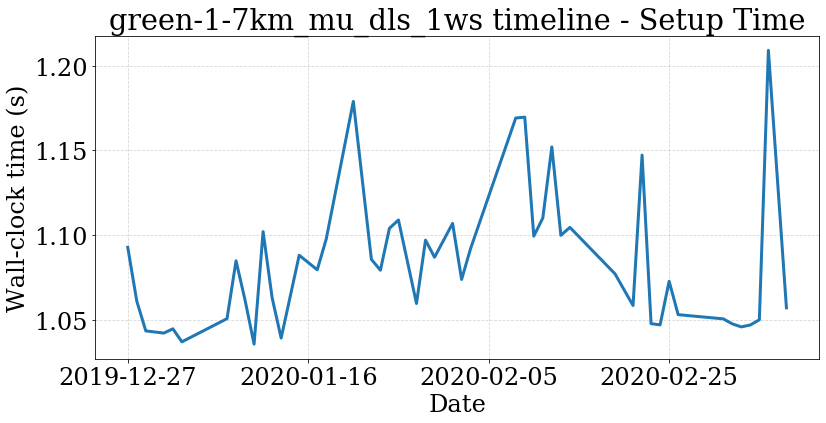

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.09273, 1.06095, 1.0434, 1.04211, 1.04464, 1.03694, 1.05062, 1.08479, 1.06158, 1.0356, 1.10201, 1.06295, 1.03915, 1.08807, 1.07947, 1.0977, 1.17889, 1.08564, 1.07922, 1.10394, 1.1089, 1.05957, 1.09699, 1.08688, 1.10686, 1.07377, 1.09207, 1.16909, 1.16959, 1.09933, 1.11004, 1.15204, 1.09982, 1.10453, 1.07711, 1.05839, 1.14719, 1.04767, 1.04696, 1.0727, 1.05299, 1.05051, 1.04755, 1.04576, 1.0469, 1.04996, 1.20904, 1.05704)


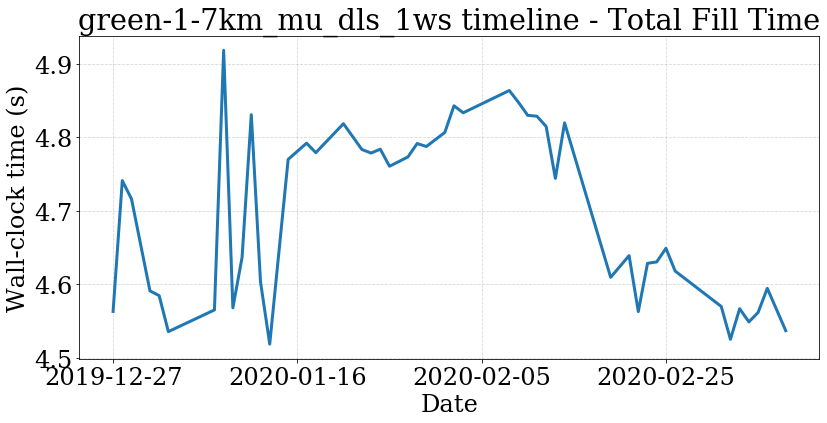

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (4.56296, 4.74122, 4.71613, 4.59101, 4.5845, 4.53546, 4.56503, 4.91872, 4.56784, 4.63673, 4.83109, 4.60323, 4.51845, 4.77017, 4.79222, 4.77929, 4.81878, 4.78363, 4.77876, 4.78403, 4.76077, 4.77348, 4.79176, 4.78769, 4.80687, 4.84319, 4.83361, 4.86397, 4.8478, 4.83017, 4.82895, 4.81495, 4.74428, 4.8199, 4.60944, 4.63902, 4.56278, 4.62854, 4.63042, 4.64901, 4.61799, 4.56978, 4.52498, 4.56673, 4.54871, 4.56153, 4.59448, 4.53679)


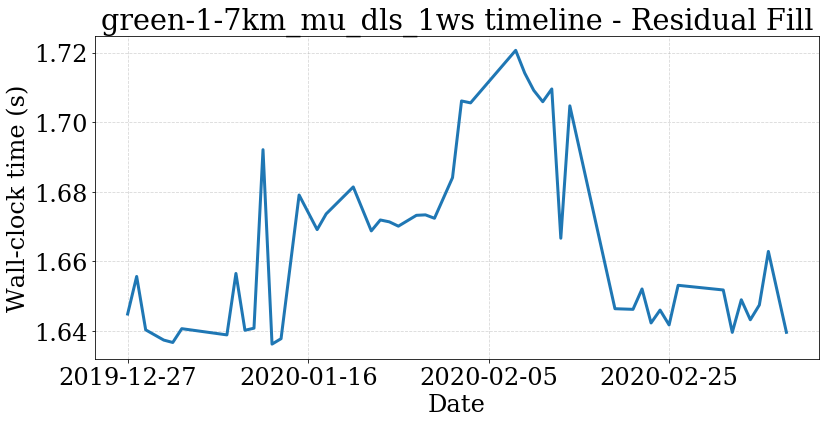

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.64482, 1.65563, 1.64027, 1.63733, 1.63664, 1.64061, 1.63882, 1.65649, 1.64015, 1.64075, 1.69209, 1.63617, 1.63773, 1.67905, 1.6691, 1.67362, 1.68137, 1.66873, 1.67187, 1.67133, 1.67009, 1.67321, 1.67334, 1.67236, 1.68405, 1.7061, 1.70555, 1.72066, 1.71412, 1.70915, 1.70588, 1.70955, 1.66662, 1.7047, 1.64635, 1.64617, 1.65203, 1.64225, 1.64596, 1.64168, 1.65308, 1.65174, 1.63954, 1.64892, 1.64317, 1.64742, 1.66283, 1.63956)


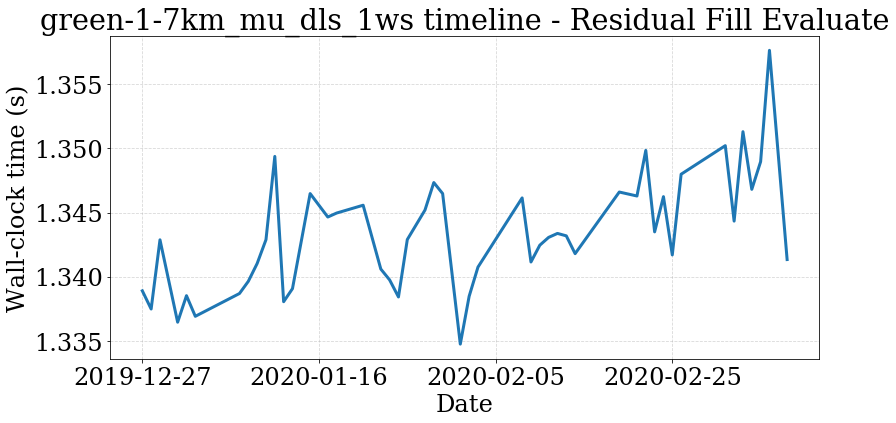

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.33889, 1.33747, 1.34287, 1.33644, 1.33851, 1.3369, 1.33868, 1.33963, 1.34102, 1.34288, 1.34938, 1.33804, 1.33906, 1.34648, 1.34465, 1.34496, 1.34557, 1.34059, 1.33974, 1.33841, 1.34289, 1.34519, 1.34734, 1.34648, 1.33473, 1.33846, 1.34074, 1.34614, 1.34114, 1.34245, 1.34306, 1.34337, 1.34318, 1.34179, 1.3466, 1.34629, 1.34985, 1.34349, 1.34624, 1.34169, 1.34799, 1.35022, 1.34433, 1.35131, 1.34681, 1.34897, 1.35766, 1.34133)


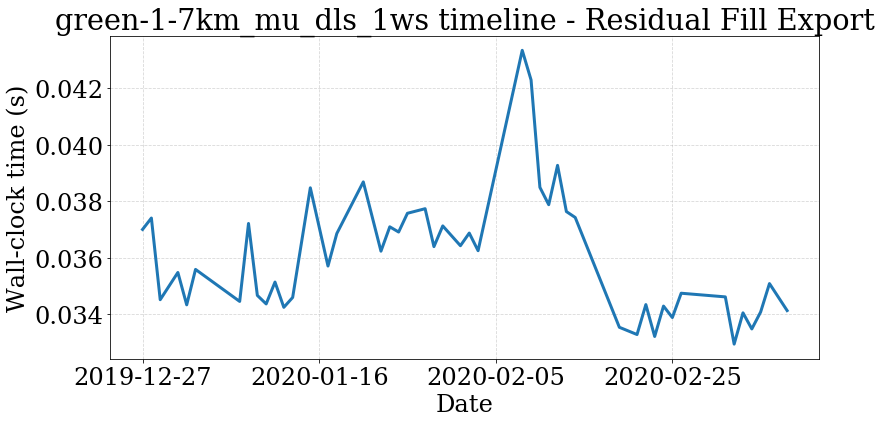

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.0370016, 0.0374048, 0.0345136, 0.0354777, 0.0343313, 0.0355857, 0.034452, 0.0372132, 0.0346647, 0.0343635, 0.0351376, 0.0342428, 0.0345932, 0.038476, 0.0357052, 0.0368569, 0.038685, 0.0362317, 0.0370947, 0.03691, 0.037574, 0.0377358, 0.0363931, 0.0371267, 0.0364255, 0.0368731, 0.0362488, 0.0433449, 0.0422956, 0.0384925, 0.0378785, 0.0392713, 0.0376347, 0.0374257, 0.0335362, 0.0332797, 0.0343399, 0.033211, 0.0342875, 0.033881, 0.0347424, 0.0346129, 0.0329403, 0.0340483, 0.0334776, 0.034

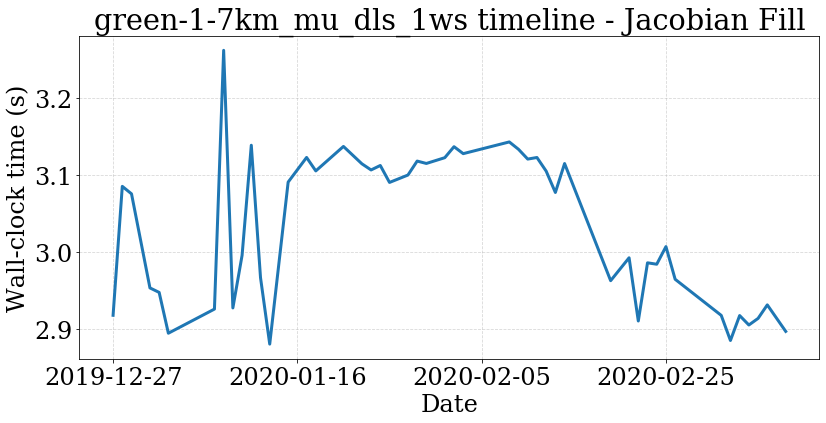

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.91753, 3.08497, 3.07525, 2.95309, 2.94725, 2.89425, 2.92559, 3.26162, 2.92708, 2.99538, 3.13838, 2.96645, 2.88011, 3.09052, 3.12251, 3.10504, 3.13681, 3.11428, 3.10627, 3.11209, 3.09006, 3.09966, 3.1178, 3.11471, 3.12221, 3.13649, 3.12745, 3.14266, 3.13307, 3.12039, 3.12245, 3.10477, 3.07704, 3.1146, 2.96248, 2.99223, 2.91012, 2.98569, 2.98385, 3.00672, 2.9643, 2.91743, 2.88483, 2.9172, 2.90493, 2.91351, 2.93105, 2.89661)


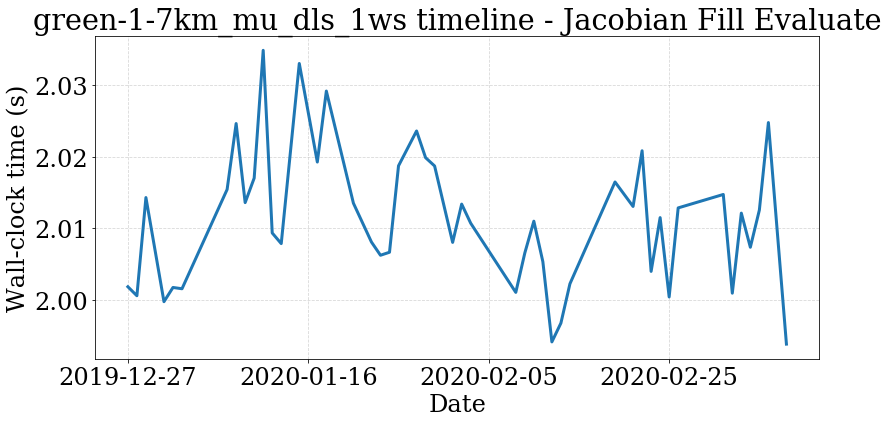

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.00181, 2.00055, 2.0143, 1.99972, 2.00171, 2.00153, 2.01543, 2.02466, 2.01359, 2.01702, 2.03491, 2.00934, 2.00785, 2.03307, 2.01927, 2.02921, 2.01351, 2.00807, 2.00622, 2.00664, 2.01874, 2.02362, 2.01988, 2.01872, 2.00802, 2.01338, 2.01071, 2.00102, 2.00654, 2.01099, 2.00532, 1.99409, 1.99672, 2.00222, 2.01648, 2.01305, 2.02085, 2.00396, 2.01149, 2.00038, 2.01285, 2.01473, 2.00091, 2.01212, 2.00734, 2.01255, 2.0248, 1.99378)


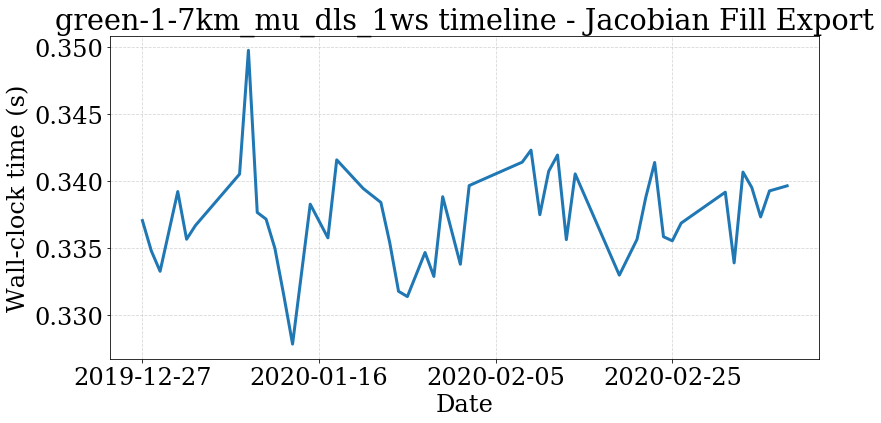

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.337046, 0.334795, 0.333262, 0.339212, 0.335655, 0.336679, 0.340515, 0.349751, 0.337654, 0.337154, 0.334973, 0.331491, 0.327828, 0.338269, 0.335757, 0.341579, 0.339439, 0.338401, 0.335408, 0.331769, 0.331375, 0.334663, 0.332876, 0.338827, 0.333787, 0.339658, 0.339953, 0.341405, 0.342301, 0.337485, 0.340727, 0.341937, 0.335623, 0.34053, 0.332973, 0.33564, 0.33879, 0.341383, 0.335842, 0.335536, 0.336857, 0.339166, 0.333889, 0.340665, 0.339512, 0.33732, 0.33926, 0.33964)


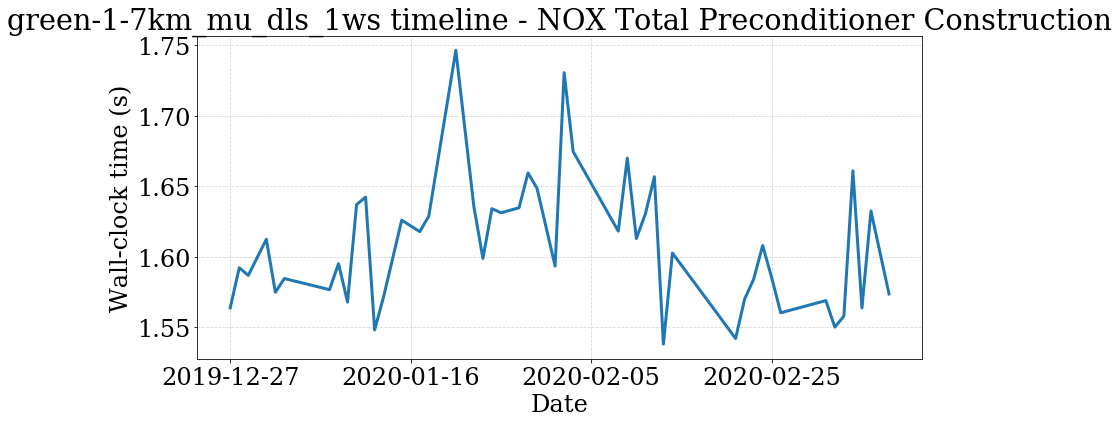

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.56373, 1.59217, 1.58677, 1.61234, 1.57482, 1.58452, 1.57664, 1.59505, 1.56783, 1.63692, 1.64224, 1.54809, 1.57172, 1.62589, 1.61776, 1.62876, 1.7463, 1.63545, 1.59879, 1.63404, 1.63114, 1.63466, 1.65941, 1.64838, 1.59333, 1.73048, 1.67452, 1.61809, 1.6699, 1.6129, 1.63027, 1.6567, 1.53803, 1.60258, 1.55942, 1.54199, 1.56995, 1.58405, 1.60791, 1.58509, 1.56024, 1.56888, 1.55005, 1.55791, 1.66087, 1.56364, 1.63241, 1.57359)


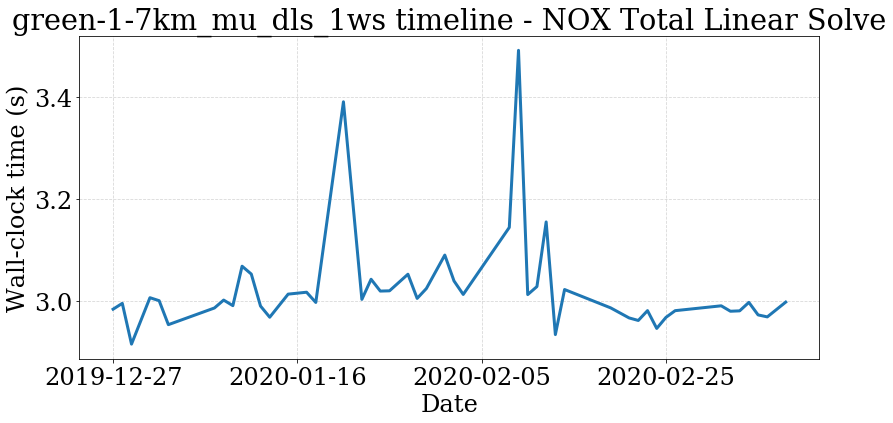

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.98387, 2.99535, 2.91528, 3.00643, 3.00056, 2.95348, 2.98625, 3.00179, 2.99083, 3.06832, 3.05286, 2.99009, 2.9681, 3.01347, 3.0172, 2.99709, 3.39129, 3.00314, 3.04267, 3.01946, 3.01996, 3.05256, 3.00506, 3.02447, 3.09019, 3.03935, 3.01284, 3.14451, 3.49238, 3.01256, 3.02834, 3.1553, 2.93397, 3.0225, 2.98648, 2.96673, 2.96173, 2.98107, 2.94609, 2.96778, 2.98097, 2.99052, 2.97985, 2.98062, 2.99724, 2.97264, 2.96876, 2.9978)


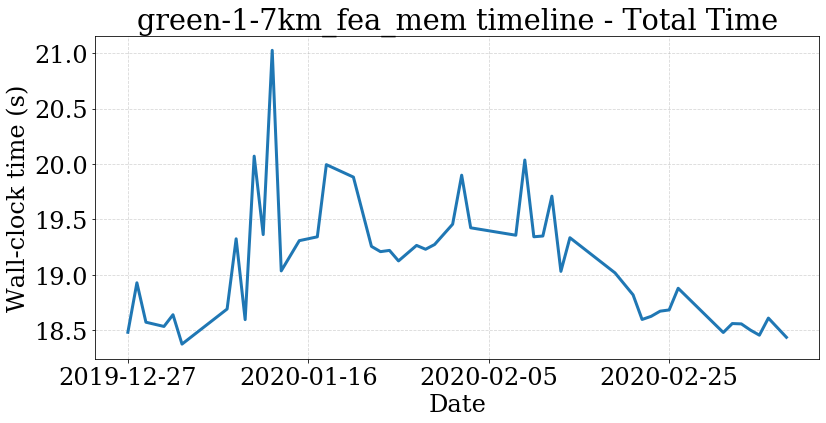

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (18.4797, 18.9268, 18.5707, 18.5324, 18.6384, 18.3729, 18.6899, 19.3241, 18.594, 20.0707, 19.3622, 21.0265, 19.0342, 19.3073, 19.342, 19.9939, 19.8815, 19.2556, 19.2081, 19.2193, 19.1243, 19.2645, 19.2296, 19.2726, 19.4561, 19.8988, 19.4235, 19.3565, 20.0357, 19.3424, 19.3493, 19.7095, 19.0299, 19.3339, 19.0162, 18.818, 18.5955, 18.6237, 18.6705, 18.6815, 18.8774, 18.4777, 18.5586, 18.5556, 18.5, 18.4536, 18.608, 18.4344)


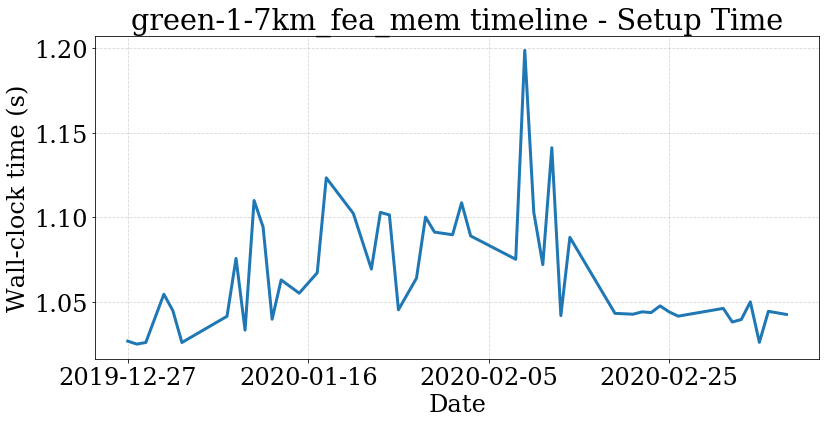

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.02663, 1.02486, 1.02582, 1.05439, 1.04466, 1.02581, 1.04132, 1.07559, 1.0331, 1.10987, 1.09413, 1.03959, 1.06284, 1.05501, 1.06707, 1.12328, 1.10218, 1.06927, 1.10282, 1.1013, 1.04518, 1.06389, 1.10004, 1.09114, 1.0896, 1.1085, 1.0889, 1.07506, 1.19873, 1.10288, 1.07187, 1.1411, 1.04172, 1.08805, 1.04306, 1.04255, 1.04397, 1.04351, 1.04748, 1.04394, 1.04141, 1.046, 1.03793, 1.03943, 1.04985, 1.0259, 1.04426, 1.04242)


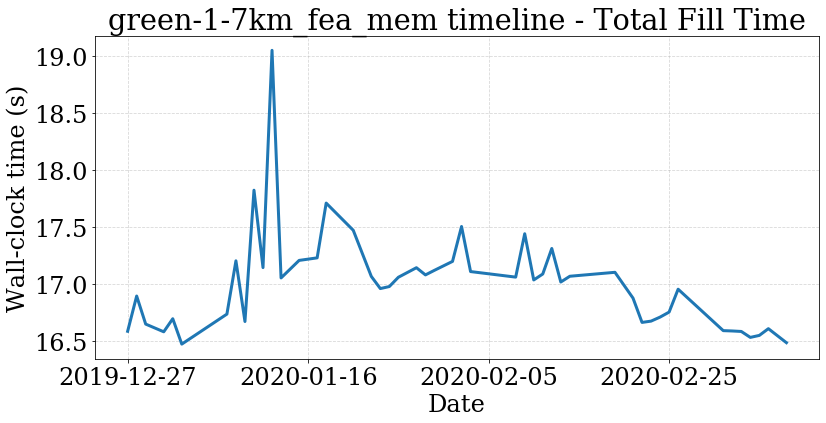

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (16.5866, 16.8959, 16.6498, 16.5821, 16.6969, 16.4741, 16.7374, 17.205, 16.6723, 17.8246, 17.1454, 19.0518, 17.0546, 17.2085, 17.2309, 17.7116, 17.4729, 17.0683, 16.9614, 16.9793, 17.0607, 17.1445, 17.0813, 17.1217, 17.1998, 17.5062, 17.1106, 17.0619, 17.4425, 17.037, 17.0892, 17.3132, 17.0189, 17.0695, 17.1041, 16.8777, 16.6645, 16.6758, 16.7111, 16.755, 16.9559, 16.5923, 16.5894, 16.5851, 16.533, 16.5505, 16.6096, 16.4865)


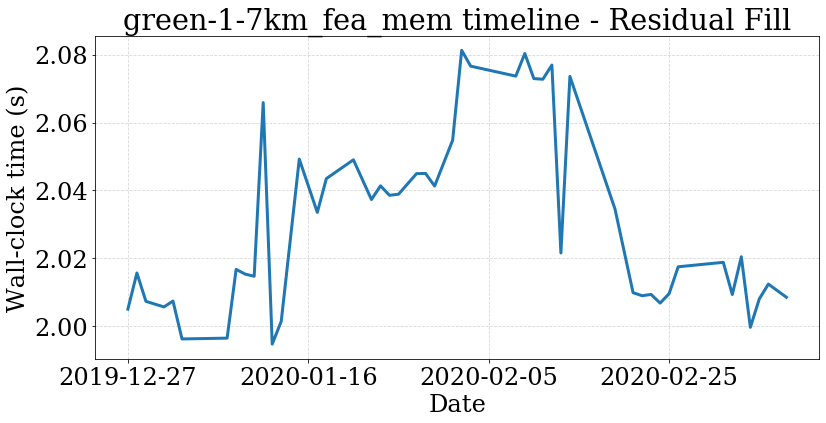

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.00506, 2.01571, 2.00736, 2.00572, 2.00745, 1.99629, 1.99653, 2.01677, 2.01538, 2.01475, 2.06588, 1.99477, 2.00149, 2.04923, 2.03355, 2.04349, 2.04903, 2.03733, 2.04137, 2.03858, 2.0389, 2.04496, 2.04501, 2.0413, 2.05479, 2.08126, 2.0766, 2.07367, 2.08032, 2.07294, 2.07275, 2.07692, 2.0216, 2.07358, 2.03451, 2.00991, 2.00902, 2.00939, 2.00684, 2.00965, 2.01753, 2.01885, 2.00937, 2.02049, 1.99971, 2.00812, 2.01244, 2.00856)


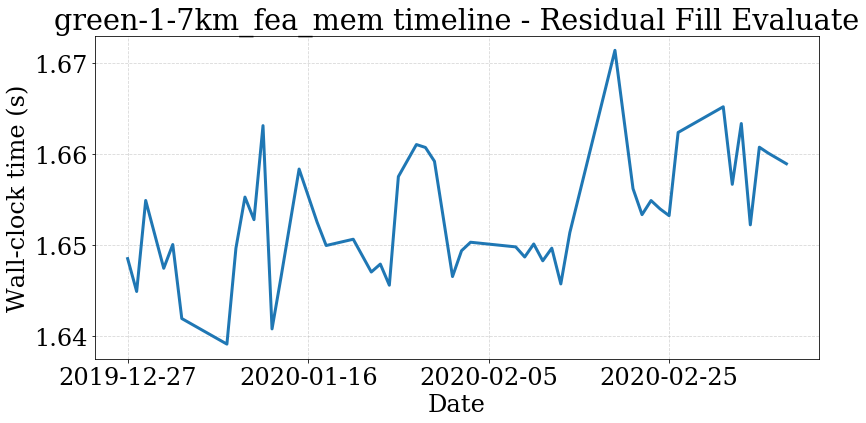

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.6485, 1.64489, 1.65489, 1.64744, 1.65005, 1.64192, 1.63911, 1.64965, 1.65526, 1.65278, 1.66311, 1.64078, 1.64648, 1.65834, 1.65249, 1.64994, 1.65063, 1.64703, 1.6479, 1.64558, 1.65751, 1.66103, 1.66071, 1.65919, 1.64653, 1.64937, 1.6503, 1.64979, 1.64868, 1.65011, 1.64826, 1.64965, 1.64572, 1.65136, 1.67138, 1.65619, 1.65333, 1.65488, 1.65396, 1.65322, 1.66236, 1.66518, 1.65666, 1.66334, 1.65221, 1.66074, 1.66008, 1.65892)


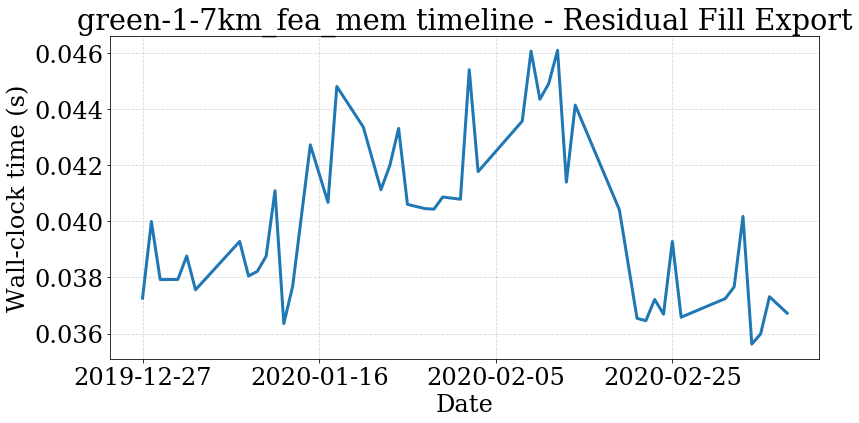

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.0372619, 0.0399879, 0.0379209, 0.0379271, 0.0387606, 0.0375575, 0.0392794, 0.0380478, 0.0382152, 0.0387565, 0.041085, 0.0363559, 0.0376827, 0.042718, 0.040669, 0.0447963, 0.0433526, 0.0411199, 0.0419777, 0.0433046, 0.0405988, 0.0404472, 0.0404292, 0.0408616, 0.040782, 0.0453919, 0.0417645, 0.0435617, 0.0460555, 0.0443411, 0.044897, 0.0460826, 0.0413905, 0.0441329, 0.0404095, 0.0365414, 0.0364585, 0.0372144, 0.0366901, 0.0392788, 0.0365821, 0.037246, 0.0376632, 0.0401711, 0.0356246, 0.0

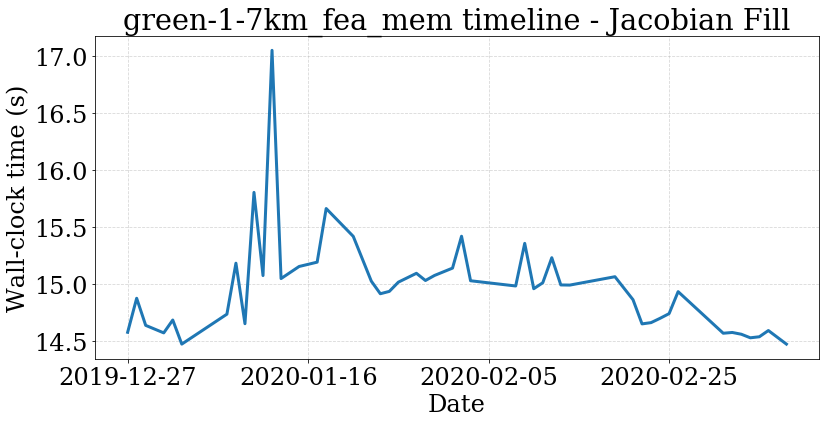

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (14.5772, 14.8759, 14.6381, 14.5721, 14.6851, 14.4735, 14.7364, 15.184, 14.6526, 15.8056, 15.0752, 17.0527, 15.0488, 15.155, 15.193, 15.6638, 15.4195, 15.0266, 14.9157, 14.9364, 15.0175, 15.0952, 15.0319, 15.0761, 15.1407, 15.4206, 15.0297, 14.9839, 15.358, 14.9597, 15.0121, 15.232, 14.993, 14.9917, 15.0652, 14.8635, 14.651, 14.6621, 14.7, 14.7411, 14.9341, 14.569, 14.5757, 14.5602, 14.5289, 14.538, 14.5927, 14.4735)


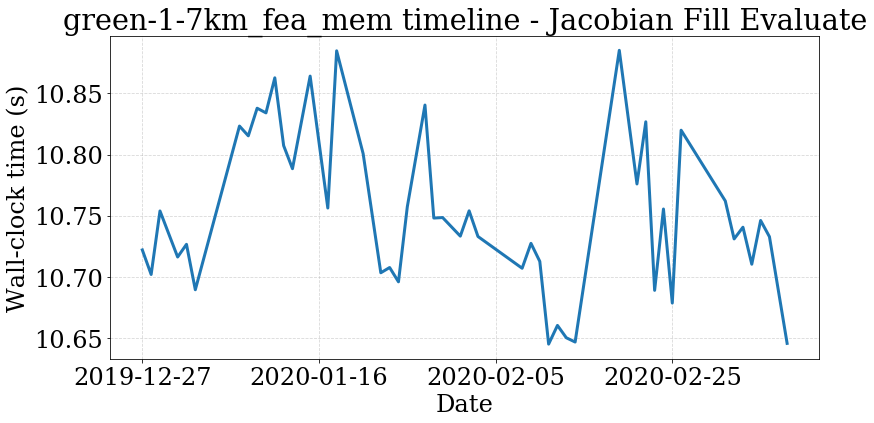

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (10.7219, 10.7018, 10.7538, 10.7161, 10.7265, 10.6893, 10.8233, 10.8153, 10.8379, 10.8341, 10.8628, 10.8073, 10.7884, 10.8642, 10.7562, 10.8849, 10.8007, 10.7032, 10.7075, 10.6958, 10.7572, 10.8405, 10.748, 10.7484, 10.7332, 10.7539, 10.7329, 10.7069, 10.7273, 10.7125, 10.6448, 10.6601, 10.65, 10.6465, 10.8853, 10.7759, 10.8268, 10.6888, 10.7554, 10.6784, 10.8199, 10.762, 10.7309, 10.7405, 10.7102, 10.746, 10.7327, 10.6454)


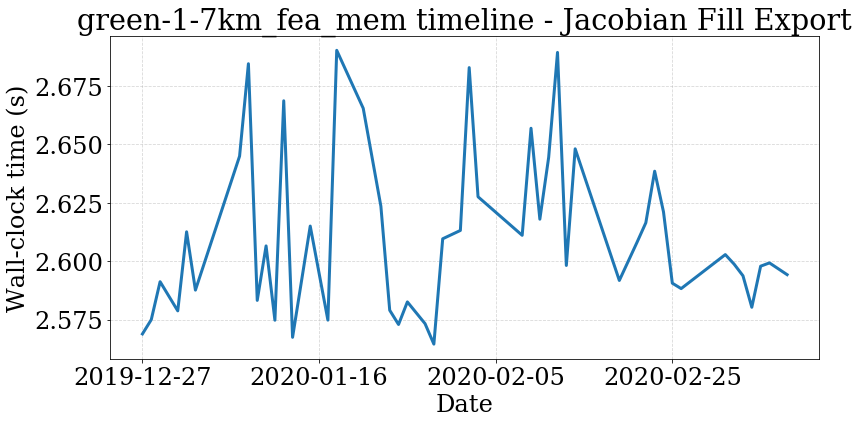

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.56882, 2.57492, 2.5912, 2.57871, 2.61257, 2.58759, 2.64498, 2.68457, 2.58319, 2.60653, 2.57469, 2.6687, 2.56737, 2.61503, 2.57473, 2.69031, 2.66548, 2.62352, 2.57897, 2.57287, 2.58254, 2.57323, 2.56446, 2.60958, 2.61315, 2.68291, 2.62758, 2.61106, 2.65693, 2.61797, 2.64451, 2.68942, 2.59815, 2.64812, 2.59173, 2.60804, 2.61644, 2.63853, 2.62113, 2.59056, 2.58824, 2.60281, 2.59871, 2.59373, 2.58024, 2.59784, 2.59925, 2.59421)


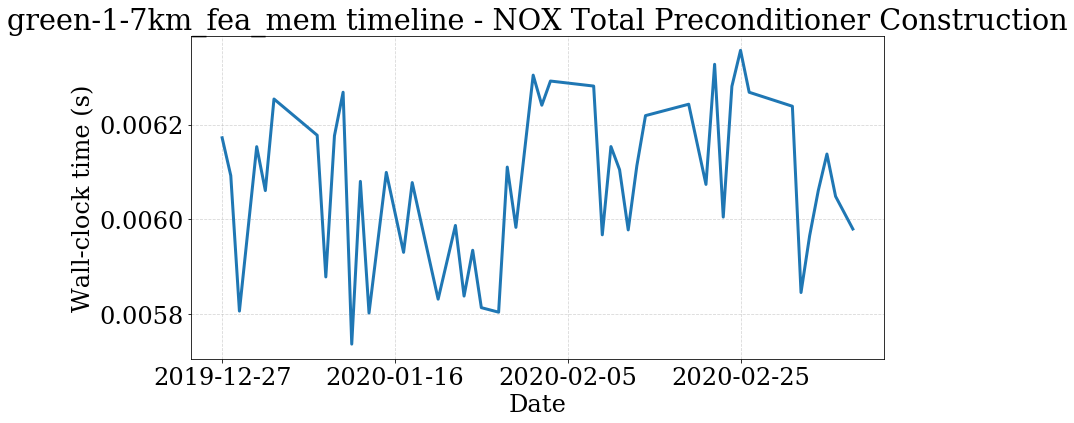

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.00617211, 0.00609199, 0.00580541, 0.0061533, 0.00606035, 0.00625412, 0.00617741, 0.00587767, 0.00617644, 0.00626846, 0.00573557, 0.00607987, 0.00580123, 0.00609884, 0.00592969, 0.00607732, 0.00583067, 0.00598663, 0.0058372, 0.0059341, 0.00581271, 0.0058031, 0.00611012, 0.00598252, 0.00630463, 0.00624099, 0.00629212, 0.00628149, 0.00596677, 0.00615349, 0.00610459, 0.00597714, 0.00611297, 0.00621895, 0.00624307, 0.00607342, 0.00632755, 0.00600433, 0.00628086, 0.00635709, 0.00626838, 0.00

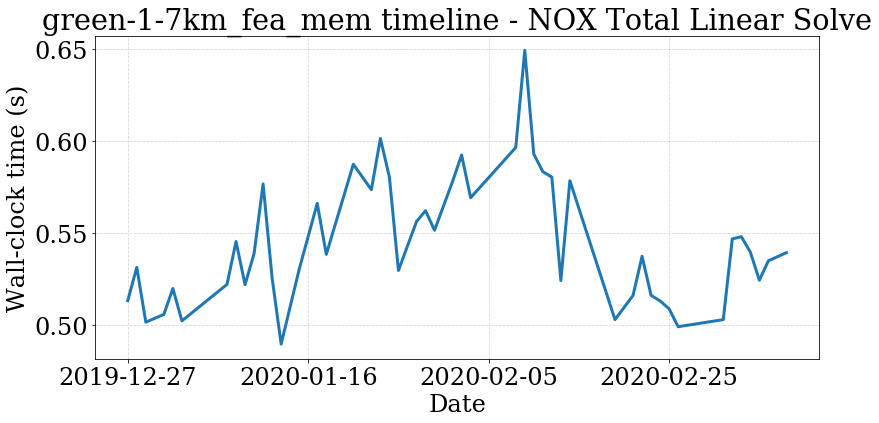

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.513182, 0.531325, 0.501477, 0.505681, 0.519786, 0.502168, 0.522027, 0.545384, 0.521874, 0.538862, 0.576756, 0.525427, 0.489508, 0.530266, 0.566139, 0.538375, 0.587475, 0.573618, 0.601494, 0.580385, 0.529617, 0.556219, 0.5622, 0.551511, 0.578119, 0.592539, 0.569234, 0.596591, 0.649523, 0.593012, 0.583453, 0.580444, 0.524138, 0.578532, 0.502833, 0.516023, 0.537336, 0.516054, 0.513033, 0.508714, 0.498992, 0.502842, 0.54678, 0.548031, 0.539638, 0.524306, 0.534884, 0.539318)


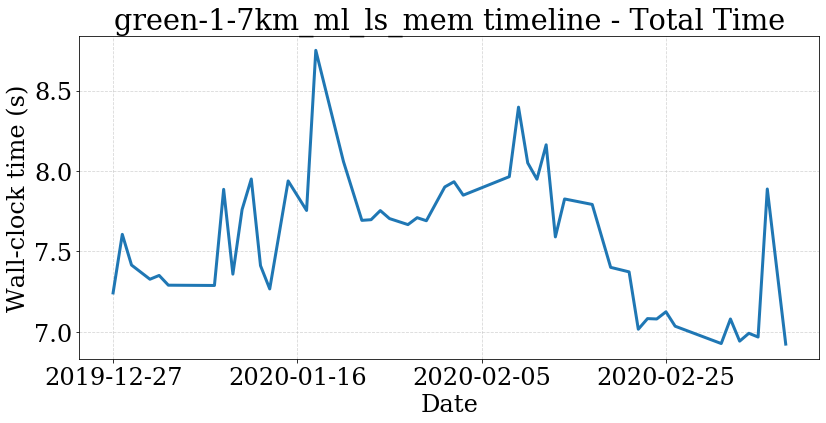

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (7.24233, 7.60622, 7.41558, 7.32738, 7.35093, 7.29042, 7.28865, 7.88596, 7.359, 7.76018, 7.9503, 7.41188, 7.26715, 7.93816, 7.7547, 8.74963, 8.059, 7.6932, 7.6973, 7.75394, 7.70423, 7.66686, 7.7098, 7.69083, 7.9008, 7.93325, 7.84968, 7.96463, 8.39666, 8.05006, 7.94878, 8.1627, 7.59036, 7.82614, 7.7921, 7.40121, 7.37314, 7.01673, 7.0828, 7.08046, 7.12509, 7.03547, 6.92784, 7.08033, 6.94273, 6.99161, 6.96835, 7.8881, 6.92431)


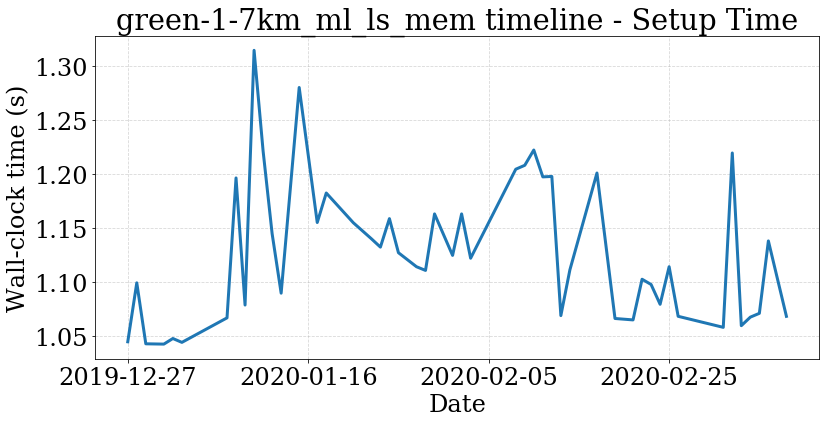

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.04461, 1.09917, 1.04276, 1.04248, 1.04767, 1.04409, 1.06676, 1.1962, 1.07862, 1.31424, 1.22112, 1.14462, 1.08959, 1.27987, 1.15496, 1.18227, 1.15474, 1.13994, 1.1322, 1.15856, 1.12703, 1.11406, 1.11065, 1.16292, 1.12455, 1.16292, 1.12193, 1.20425, 1.20789, 1.22203, 1.19718, 1.19759, 1.06885, 1.11114, 1.20075, 1.06618, 1.06487, 1.10249, 1.09764, 1.07932, 1.11407, 1.0682, 1.05799, 1.21928, 1.05953, 1.06743, 1.07095, 1.13793, 1.06817)


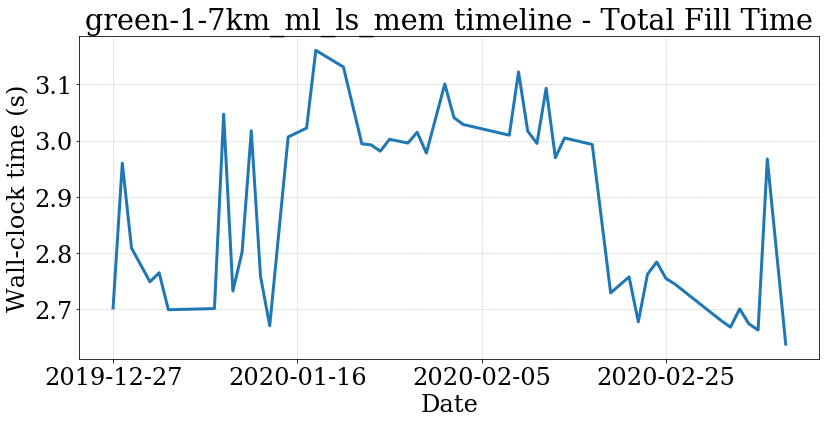

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.70238, 2.95982, 2.80888, 2.74883, 2.76492, 2.69918, 2.70117, 3.04695, 2.73244, 2.80161, 3.01741, 2.75854, 2.67072, 3.00637, 3.0222, 3.16042, 3.13072, 2.99413, 2.99232, 2.98106, 3.00219, 2.99555, 3.01477, 2.97776, 3.10065, 3.04061, 3.02857, 3.00951, 3.122, 3.01675, 2.99484, 3.09306, 2.9696, 3.00456, 2.99301, 2.72909, 2.75761, 2.67766, 2.76221, 2.78401, 2.75474, 2.74446, 2.6797, 2.66816, 2.7006, 2.67406, 2.66306, 2.96724, 2.63802)


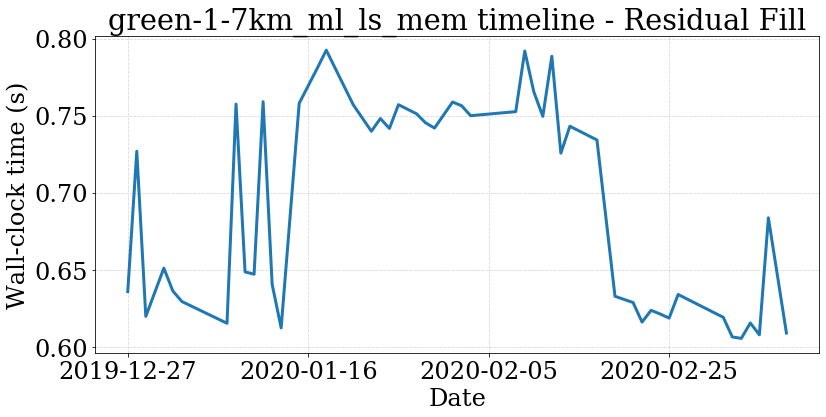

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.635903, 0.726924, 0.619778, 0.651086, 0.636205, 0.62943, 0.615317, 0.757494, 0.648648, 0.64713, 0.759052, 0.640664, 0.612305, 0.758021, 0.780711, 0.792481, 0.756949, 0.739892, 0.748142, 0.741682, 0.75709, 0.751228, 0.745366, 0.74194, 0.758838, 0.756434, 0.74997, 0.752604, 0.791932, 0.765492, 0.749537, 0.788513, 0.725662, 0.743122, 0.734214, 0.632824, 0.628785, 0.616091, 0.623702, 0.621356, 0.61868, 0.63398, 0.619192, 0.606455, 0.605513, 0.615521, 0.607849, 0.683742, 0.60899)


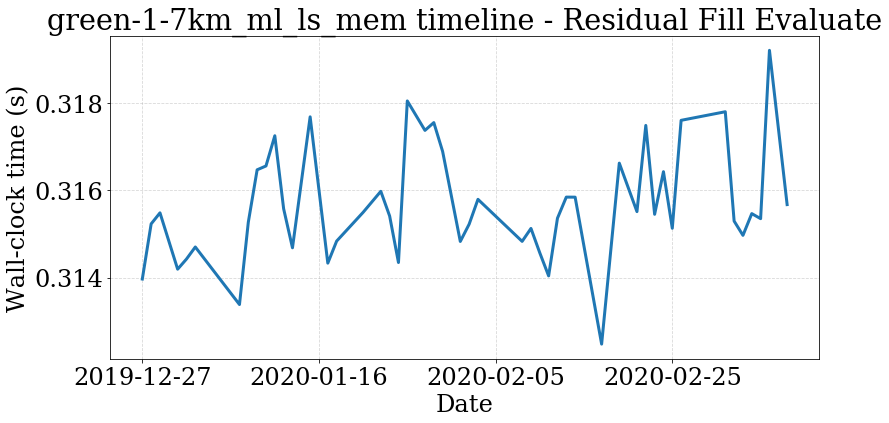

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.313967, 0.315233, 0.315487, 0.314193, 0.314426, 0.314703, 0.313382, 0.315272, 0.316475, 0.316563, 0.317257, 0.31558, 0.314684, 0.317691, 0.314332, 0.314838, 0.315499, 0.315981, 0.315414, 0.314346, 0.318056, 0.31738, 0.317559, 0.316896, 0.31483, 0.315226, 0.315797, 0.314832, 0.315129, 0.314568, 0.314039, 0.315363, 0.315848, 0.315847, 0.312473, 0.316628, 0.315515, 0.317494, 0.315453, 0.316432, 0.315132, 0.317611, 0.317808, 0.315298, 0.31497, 0.315469, 0.315353, 0.319218, 0.3156

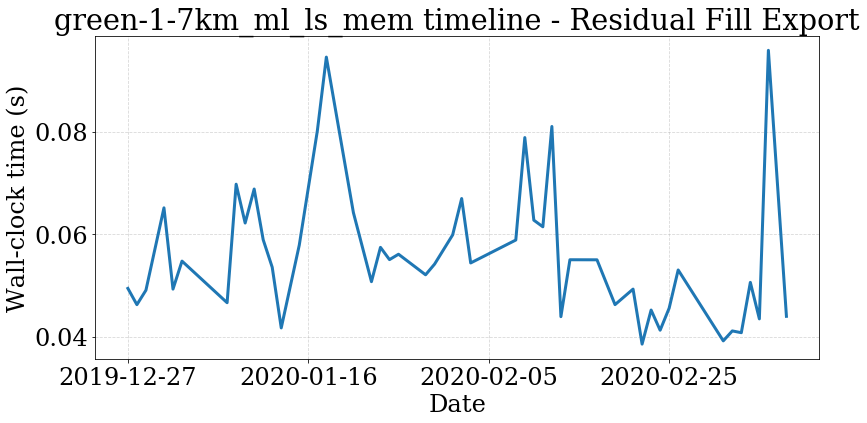

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.0494081, 0.0462343, 0.0490486, 0.0651267, 0.049267, 0.0547316, 0.0466124, 0.0697398, 0.0621634, 0.0687975, 0.0588976, 0.0535291, 0.0416935, 0.0578661, 0.0801346, 0.094538, 0.0641831, 0.0507194, 0.0574171, 0.055021, 0.0560737, 0.0534007, 0.0520602, 0.0541508, 0.0598435, 0.0669429, 0.0543727, 0.0588444, 0.078838, 0.0627189, 0.0614249, 0.0810031, 0.043891, 0.0549982, 0.0549858, 0.0462392, 0.0492707, 0.0385366, 0.0451825, 0.0412451, 0.0455512, 0.0530065, 0.0391709, 0.0411096, 0.0

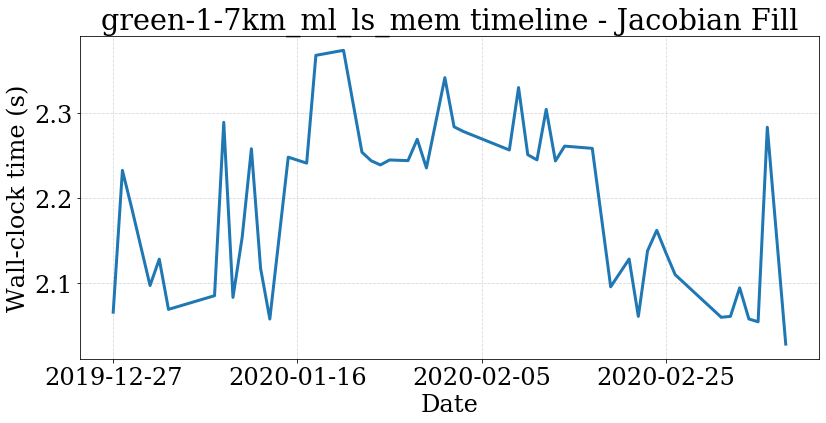

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.0659, 2.2323, 2.18853, 2.09718, 2.12813, 2.06919, 2.08527, 2.28868, 2.08323, 2.15384, 2.25769, 2.1173, 2.05785, 2.24778, 2.24082, 2.36728, 2.37316, 2.25361, 2.24359, 2.23869, 2.2445, 2.24373, 2.26881, 2.23515, 2.3411, 2.28342, 2.27799, 2.25623, 2.32949, 2.25063, 2.24461, 2.30394, 2.24335, 2.26075, 2.25814, 2.0957, 2.12827, 2.06096, 2.13792, 2.162, 2.13539, 2.1099, 2.05991, 2.061, 2.09449, 2.05795, 2.05464, 2.28293, 2.02844)


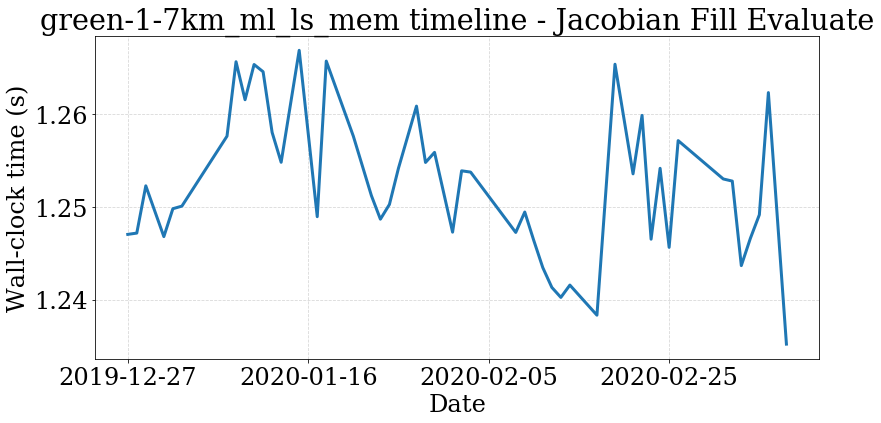

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.24704, 1.24718, 1.25228, 1.2468, 1.24981, 1.25009, 1.25764, 1.26567, 1.26157, 1.26537, 1.26459, 1.25804, 1.25482, 1.2669, 1.24895, 1.26574, 1.25764, 1.25123, 1.24868, 1.25027, 1.25417, 1.26088, 1.2548, 1.25589, 1.24728, 1.2539, 1.25376, 1.24725, 1.24945, 1.24638, 1.24345, 1.24132, 1.24024, 1.24157, 1.23832, 1.2654, 1.25357, 1.25988, 1.24652, 1.25417, 1.24564, 1.25716, 1.25302, 1.25279, 1.24367, 1.2466, 1.24916, 1.26234, 1.2352)


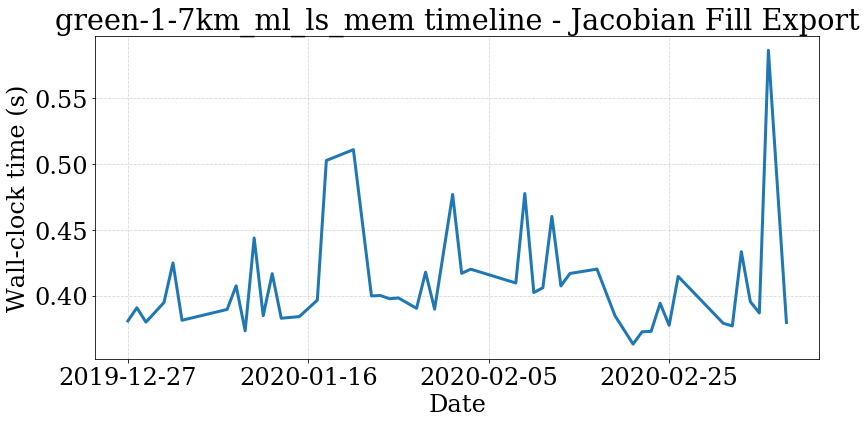

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.380776, 0.390783, 0.379858, 0.394745, 0.424858, 0.381267, 0.389494, 0.407477, 0.373255, 0.44377, 0.384758, 0.416686, 0.382806, 0.384057, 0.396554, 0.502651, 0.510896, 0.399747, 0.400056, 0.397643, 0.398205, 0.39036, 0.417801, 0.389704, 0.476875, 0.416894, 0.420084, 0.409596, 0.477597, 0.402332, 0.405949, 0.460165, 0.407359, 0.416809, 0.42016, 0.384694, 0.36316, 0.372527, 0.372825, 0.394185, 0.377428, 0.414578, 0.378956, 0.376968, 0.433409, 0.395391, 0.38681, 0.586343, 0.37959

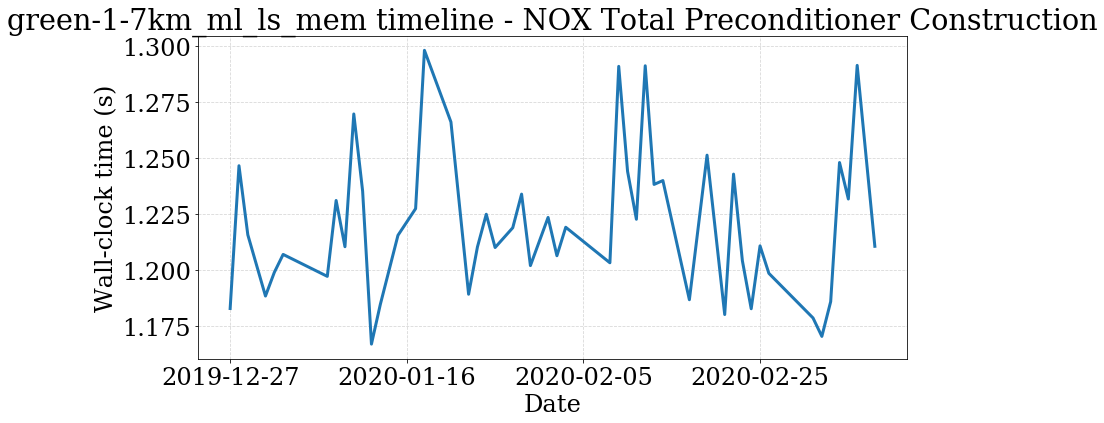

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.18278, 1.24648, 1.21566, 1.18834, 1.19888, 1.20691, 1.19712, 1.23098, 1.21034, 1.26958, 1.23517, 1.16689, 1.18453, 1.21542, 1.22734, 1.29797, 1.26599, 1.18914, 1.21022, 1.22483, 1.20998, 1.21881, 1.23382, 1.20192, 1.22341, 1.20632, 1.21903, 1.20317, 1.29082, 1.24398, 1.22259, 1.29108, 1.23814, 1.23986, 1.18669, 1.2512, 1.18008, 1.24275, 1.20411, 1.18266, 1.21073, 1.19847, 1.17856, 1.17034, 1.18587, 1.24791, 1.23163, 1.29126, 1.21053)


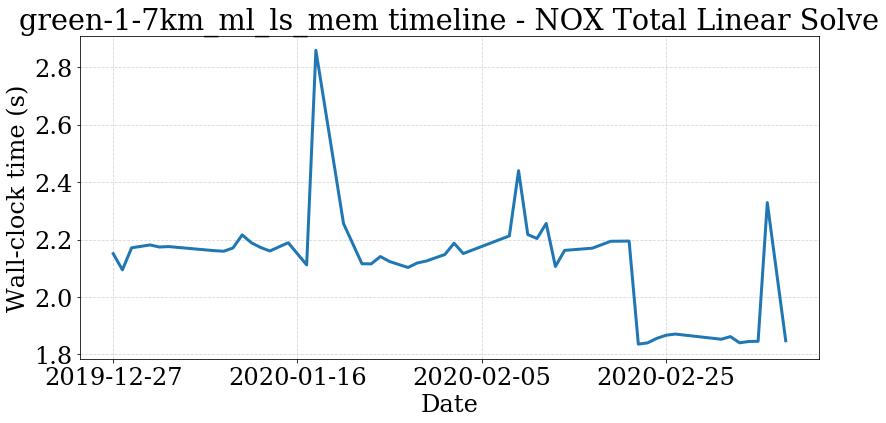

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200217, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.15098, 2.09466, 2.17139, 2.18133, 2.17402, 2.17559, 2.16127, 2.15942, 2.17071, 2.21617, 2.18886, 2.17241, 2.16023, 2.18894, 2.11189, 2.85856, 2.25567, 2.11581, 2.11528, 2.14094, 2.12355, 2.10276, 2.11851, 2.12537, 2.14808, 2.18727, 2.15136, 2.21273, 2.43973, 2.21748, 2.20365, 2.25605, 2.10628, 2.16243, 2.16993, 2.19397, 2.19474, 1.83613, 1.84043, 1.85605, 1.86693, 1.87111, 1.85309, 1.86222, 1.84056, 1.84541, 1.84585, 2.32858, 1.84778)


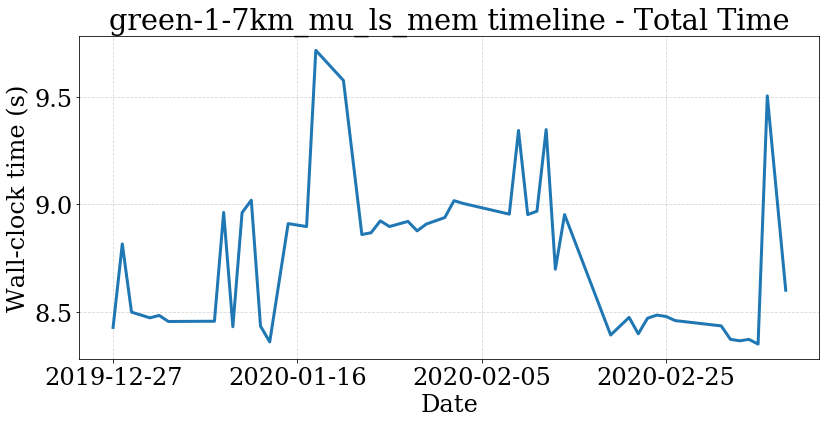

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (8.4271, 8.81543, 8.49814, 8.47157, 8.48282, 8.45467, 8.45581, 8.96177, 8.43017, 8.96076, 9.01875, 8.43326, 8.35966, 8.90988, 8.8962, 9.7158, 9.57573, 8.85888, 8.86738, 8.92256, 8.89625, 8.92008, 8.87603, 8.90785, 8.93803, 9.01656, 9.00362, 8.95392, 9.34307, 8.9519, 8.96756, 9.3472, 8.6976, 8.9517, 8.3917, 8.47374, 8.39723, 8.46974, 8.48428, 8.47811, 8.45883, 8.43413, 8.37174, 8.3647, 8.37148, 8.34942, 9.50407, 8.59985)


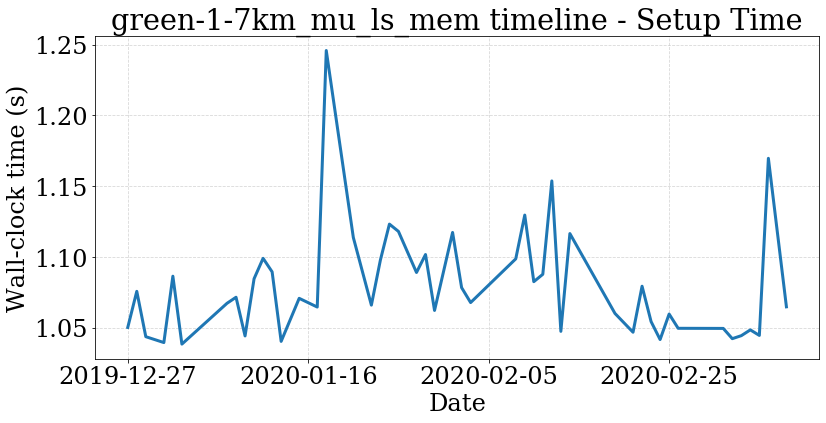

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.05025, 1.07574, 1.04372, 1.03957, 1.08644, 1.03847, 1.0673, 1.07157, 1.04424, 1.08465, 1.09905, 1.08949, 1.0404, 1.0708, 1.06465, 1.2458, 1.11376, 1.066, 1.09786, 1.12321, 1.11806, 1.08904, 1.10173, 1.06224, 1.11733, 1.07837, 1.06781, 1.09867, 1.12959, 1.08256, 1.08778, 1.15371, 1.04748, 1.11653, 1.06012, 1.04686, 1.07936, 1.05439, 1.04169, 1.05971, 1.04964, 1.04956, 1.04232, 1.04444, 1.04853, 1.04461, 1.16967, 1.0648)


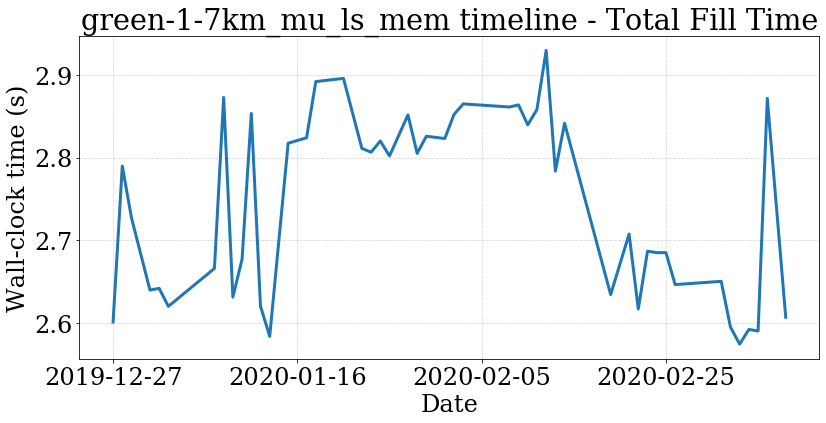

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.6013, 2.78985, 2.72704, 2.63984, 2.64193, 2.62013, 2.666, 2.87277, 2.63128, 2.6773, 2.85344, 2.6202, 2.58388, 2.81743, 2.82397, 2.89192, 2.89582, 2.81118, 2.80653, 2.82007, 2.80203, 2.85167, 2.80519, 2.82585, 2.82311, 2.85218, 2.86496, 2.86119, 2.86372, 2.83956, 2.85827, 2.92973, 2.78365, 2.84159, 2.63442, 2.70753, 2.61698, 2.68687, 2.68509, 2.6851, 2.64646, 2.65038, 2.59508, 2.57449, 2.5922, 2.5904, 2.87165, 2.6069)


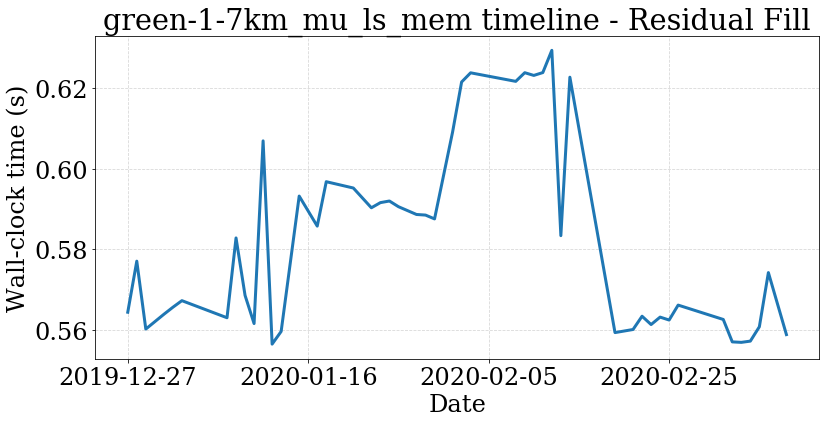

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.564413, 0.577091, 0.560237, 0.563897, 0.565647, 0.567285, 0.563043, 0.582854, 0.568593, 0.561598, 0.606948, 0.5565, 0.559647, 0.593241, 0.58579, 0.59681, 0.595242, 0.590339, 0.591616, 0.592017, 0.590609, 0.588676, 0.588526, 0.587578, 0.609128, 0.621558, 0.623837, 0.621716, 0.623866, 0.623188, 0.623895, 0.629417, 0.58342, 0.622751, 0.55936, 0.560127, 0.563421, 0.561353, 0.563202, 0.562475, 0.566183, 0.562617, 0.557053, 0.556935, 0.557242, 0.560807, 0.574253, 0.55886)


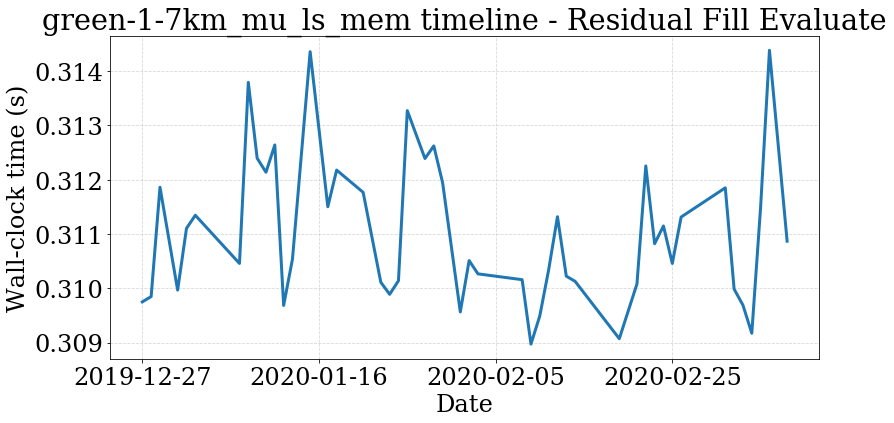

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.309749, 0.309847, 0.311861, 0.309966, 0.311103, 0.311345, 0.310457, 0.313793, 0.312396, 0.312137, 0.31264, 0.309683, 0.310538, 0.314358, 0.311502, 0.312177, 0.311767, 0.310111, 0.309888, 0.310139, 0.313272, 0.31239, 0.312622, 0.311942, 0.309564, 0.31051, 0.310265, 0.310158, 0.308971, 0.309491, 0.310337, 0.311318, 0.310223, 0.310127, 0.309071, 0.31008, 0.312254, 0.310821, 0.311147, 0.310457, 0.311312, 0.31185, 0.309985, 0.309688, 0.309171, 0.311497, 0.314383, 0.310867)


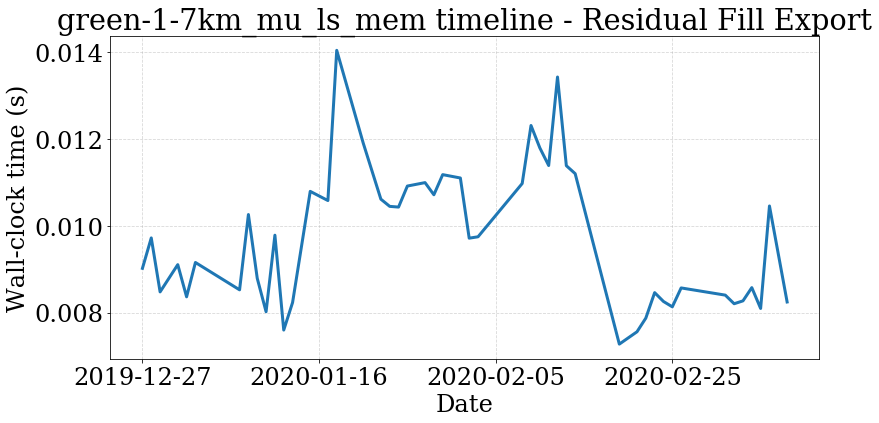

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.00901744, 0.00971811, 0.00847501, 0.00910264, 0.00836127, 0.00915254, 0.00852224, 0.0102567, 0.00878789, 0.00801786, 0.00978093, 0.0075958, 0.00822968, 0.0107902, 0.0105786, 0.014038, 0.0119022, 0.0106103, 0.0104446, 0.0104281, 0.0109125, 0.0109916, 0.0107117, 0.0111754, 0.0110981, 0.00971234, 0.00974407, 0.0109706, 0.012307, 0.0117905, 0.0113852, 0.0134236, 0.0113812, 0.011198, 0.00727247, 0.00755644, 0.00787157, 0.00845802, 0.00825417, 0.00813109, 0.00856638, 0.00840042, 0.00820239, 

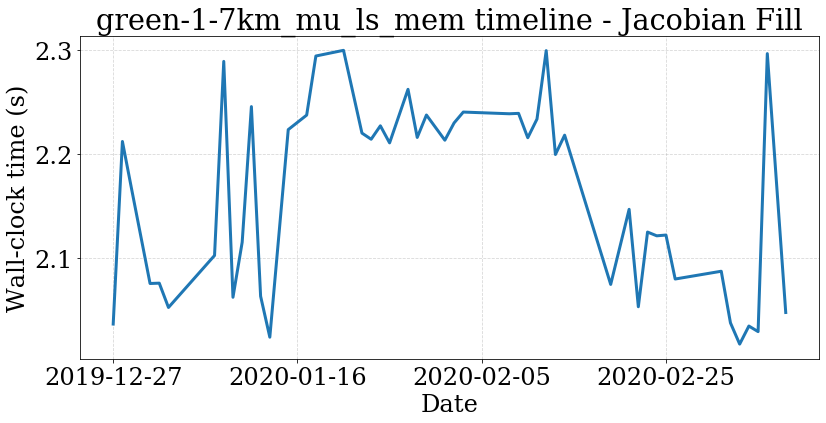

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.03629, 2.21218, 2.16621, 2.07535, 2.07569, 2.05225, 2.10235, 2.28932, 2.06208, 2.11511, 2.24577, 2.06311, 2.02363, 2.22359, 2.23758, 2.29451, 2.29998, 2.22024, 2.21432, 2.22727, 2.21081, 2.26241, 2.21606, 2.23767, 2.2134, 2.23002, 2.24051, 2.23887, 2.23925, 2.21577, 2.23377, 2.29971, 2.19962, 2.21824, 2.07446, 2.14681, 2.05295, 2.12491, 2.12129, 2.12203, 2.07967, 2.08716, 2.03743, 2.01696, 2.03436, 2.02899, 2.29681, 2.04742)


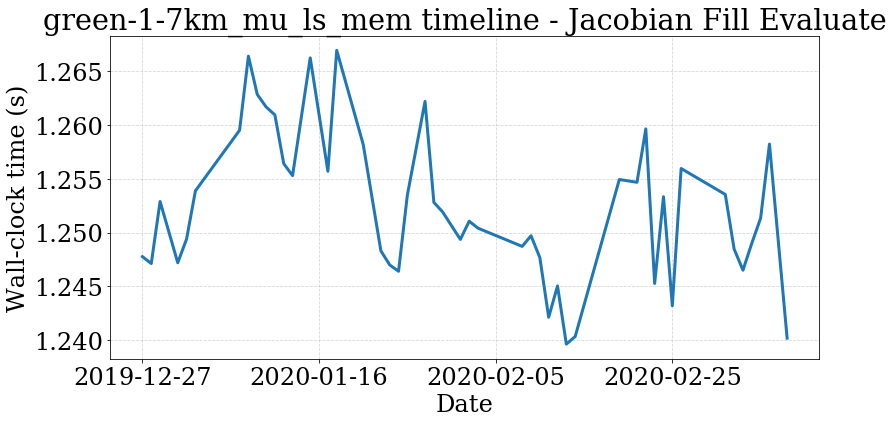

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.24776, 1.24712, 1.25288, 1.24719, 1.2494, 1.25387, 1.25949, 1.26637, 1.26282, 1.26166, 1.26091, 1.25639, 1.25528, 1.26621, 1.25568, 1.26691, 1.25817, 1.2483, 1.24699, 1.2464, 1.25348, 1.26217, 1.2528, 1.2519, 1.24936, 1.25105, 1.2504, 1.24871, 1.2497, 1.24767, 1.24213, 1.24504, 1.23964, 1.24034, 1.25492, 1.25466, 1.25962, 1.24527, 1.25332, 1.2432, 1.25594, 1.25353, 1.24846, 1.2465, 1.249, 1.25133, 1.25821, 1.24019)


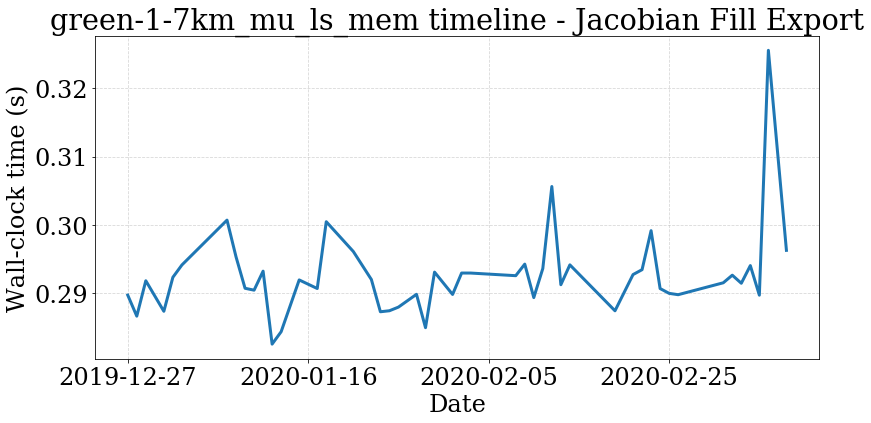

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.289731, 0.286662, 0.29184, 0.287371, 0.292343, 0.294144, 0.300705, 0.295332, 0.290738, 0.29046, 0.293241, 0.282573, 0.284388, 0.291957, 0.290702, 0.300472, 0.296112, 0.292019, 0.287303, 0.287451, 0.287984, 0.289855, 0.284975, 0.293103, 0.289834, 0.292965, 0.292964, 0.292579, 0.29427, 0.289375, 0.293626, 0.305619, 0.291259, 0.294163, 0.287445, 0.292741, 0.293457, 0.299163, 0.290697, 0.289994, 0.289799, 0.29154, 0.292652, 0.291472, 0.294054, 0.289727, 0.325532, 0.296284)


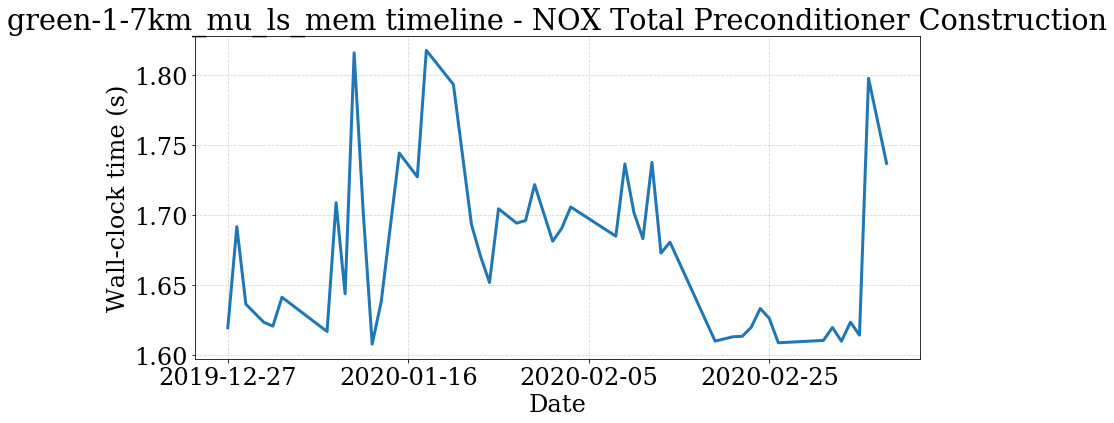

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.61944, 1.69178, 1.63632, 1.6233, 1.6206, 1.64126, 1.61673, 1.70889, 1.64366, 1.81619, 1.70284, 1.60772, 1.63807, 1.74444, 1.72741, 1.81794, 1.79351, 1.69338, 1.67075, 1.65181, 1.70459, 1.69429, 1.69615, 1.72186, 1.68132, 1.69051, 1.70586, 1.68495, 1.73664, 1.70192, 1.68317, 1.73774, 1.67285, 1.68066, 1.60989, 1.613, 1.61328, 1.61972, 1.63323, 1.62614, 1.60867, 1.61035, 1.61961, 1.60979, 1.6234, 1.61417, 1.79795, 1.73709)


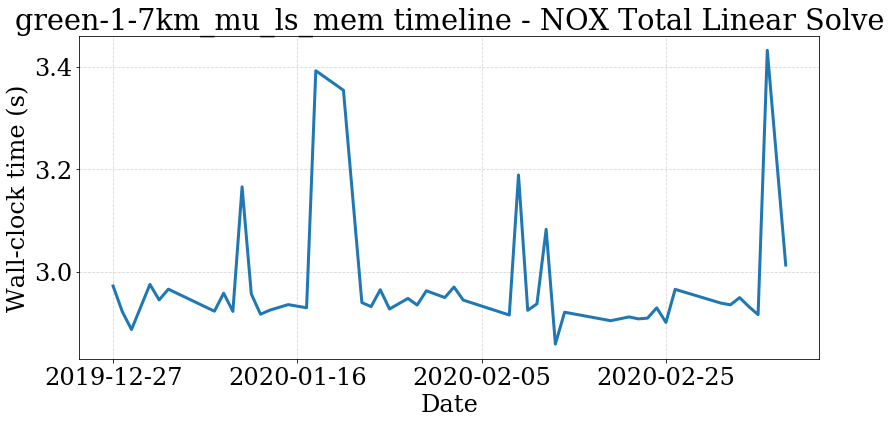

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.97174, 2.9217, 2.88673, 2.97484, 2.94453, 2.96555, 2.92253, 2.95773, 2.92214, 3.1653, 2.9562, 2.91664, 2.92452, 2.9354, 2.92923, 3.39188, 3.35376, 2.93942, 2.93149, 2.96441, 2.92683, 2.94748, 2.93453, 2.96241, 2.94916, 2.96971, 2.94421, 2.9151, 3.18838, 2.92423, 2.93689, 3.08242, 2.85831, 2.92054, 2.90401, 2.91137, 2.90753, 2.90899, 2.92911, 2.90062, 2.96522, 2.93818, 2.93503, 2.94906, 2.93142, 2.91583, 3.43168, 3.01253)


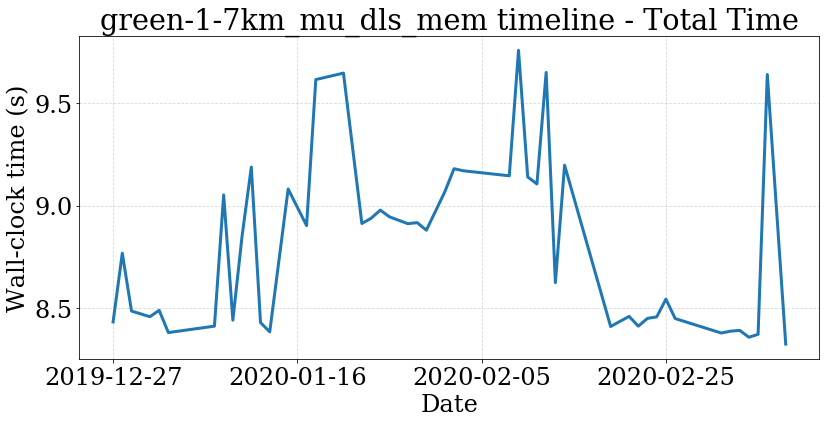

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (8.43109, 8.76709, 8.48415, 8.45662, 8.48786, 8.37906, 8.41034, 9.05234, 8.43949, 8.85104, 9.18824, 8.42803, 8.38232, 9.08104, 8.90218, 9.61619, 9.64781, 8.91241, 8.93784, 8.97781, 8.94487, 8.91133, 8.91678, 8.87962, 9.06714, 9.18025, 9.17028, 9.14563, 9.75922, 9.13995, 9.10559, 9.65116, 8.6231, 9.19749, 8.40859, 8.45831, 8.41031, 8.44857, 8.45568, 8.5427, 8.44763, 8.37684, 8.38577, 8.38983, 8.35631, 8.37022, 9.64094, 8.32259)


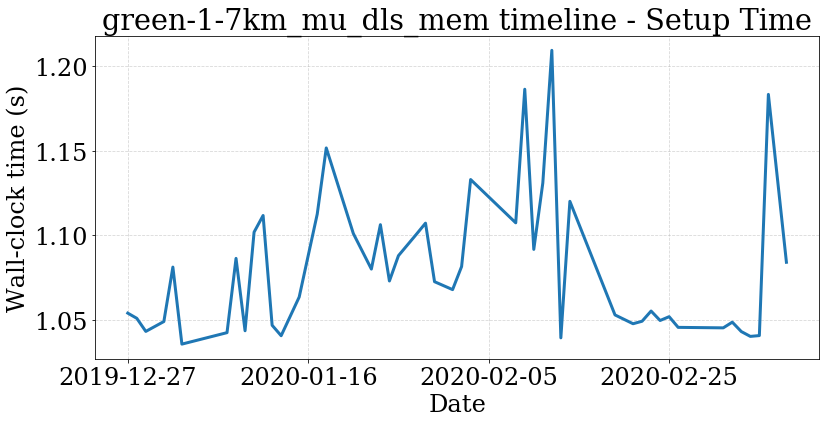

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.05418, 1.05112, 1.04339, 1.04921, 1.08134, 1.0359, 1.04266, 1.08647, 1.04377, 1.10195, 1.11177, 1.04703, 1.04085, 1.06367, 1.11261, 1.15163, 1.10114, 1.08017, 1.10636, 1.07314, 1.08806, 1.10078, 1.10726, 1.07272, 1.06805, 1.08166, 1.13299, 1.10744, 1.18626, 1.09177, 1.13094, 1.20921, 1.03959, 1.12013, 1.05312, 1.04792, 1.04939, 1.05541, 1.04983, 1.05208, 1.04578, 1.04549, 1.04885, 1.0433, 1.04045, 1.04093, 1.18322, 1.08418)


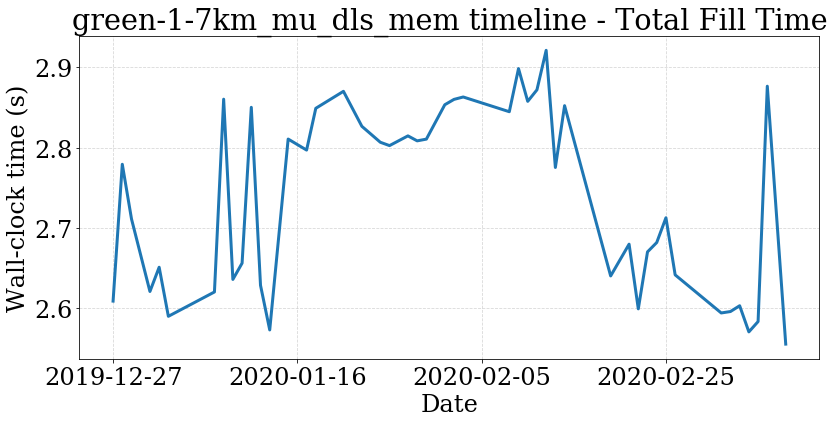

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.60875, 2.77934, 2.7111, 2.62075, 2.65096, 2.58979, 2.62013, 2.8605, 2.63577, 2.65603, 2.85035, 2.62845, 2.57279, 2.81078, 2.79704, 2.84912, 2.87029, 2.82666, 2.81675, 2.8068, 2.80262, 2.81475, 2.80853, 2.8107, 2.85356, 2.86024, 2.86323, 2.84487, 2.89863, 2.85779, 2.87215, 2.9214, 2.77534, 2.85242, 2.6401, 2.67972, 2.59907, 2.67014, 2.68178, 2.71265, 2.64146, 2.59397, 2.59574, 2.60297, 2.57037, 2.58325, 2.87668, 2.55513)


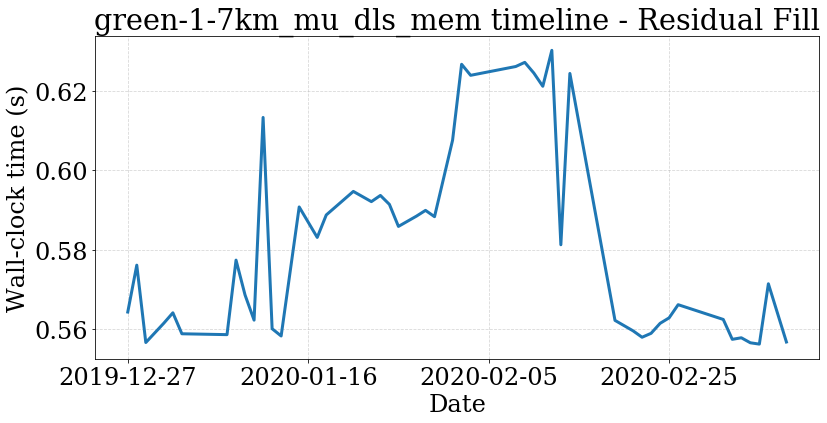

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.564324, 0.576142, 0.556643, 0.561527, 0.564135, 0.55885, 0.55863, 0.577411, 0.568616, 0.562282, 0.613363, 0.560121, 0.558292, 0.590806, 0.583126, 0.58879, 0.594722, 0.592149, 0.593709, 0.591451, 0.585903, 0.588499, 0.589946, 0.588353, 0.607627, 0.62676, 0.623977, 0.626195, 0.627244, 0.624566, 0.621214, 0.630274, 0.581279, 0.624448, 0.562223, 0.559595, 0.557974, 0.558963, 0.561481, 0.562866, 0.566178, 0.562459, 0.557449, 0.557842, 0.556579, 0.556245, 0.57145, 0.556775)


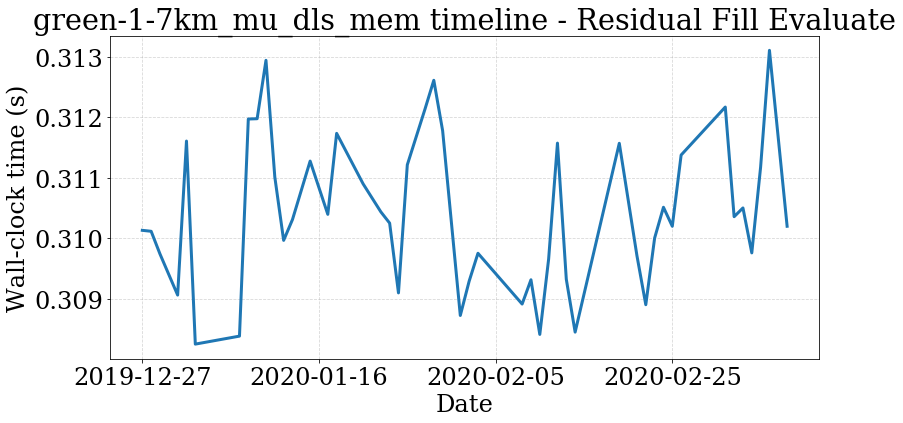

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.310135, 0.310119, 0.309744, 0.309065, 0.31161, 0.308255, 0.308387, 0.311974, 0.311979, 0.312944, 0.311016, 0.309969, 0.310313, 0.311279, 0.310399, 0.311737, 0.310902, 0.310441, 0.310254, 0.309101, 0.311217, 0.312137, 0.312614, 0.311781, 0.308728, 0.309294, 0.309756, 0.308917, 0.309318, 0.308415, 0.30966, 0.311576, 0.309327, 0.308453, 0.311573, 0.309714, 0.308906, 0.310007, 0.310516, 0.310202, 0.311379, 0.312172, 0.31036, 0.310505, 0.309762, 0.311181, 0.313109, 0.310202)


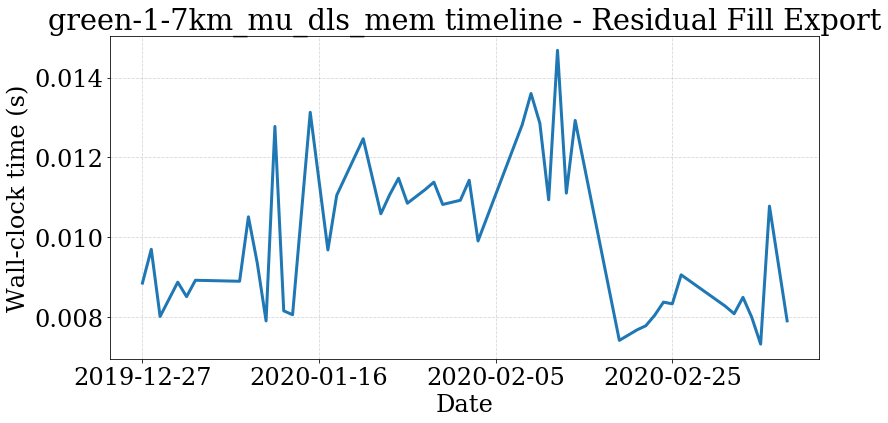

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.00884691, 0.00969436, 0.00800962, 0.00886958, 0.00850671, 0.00891768, 0.00889261, 0.0105084, 0.00935285, 0.007898, 0.0127749, 0.00815086, 0.00805327, 0.0131287, 0.00967717, 0.0110492, 0.0124665, 0.0105847, 0.0110634, 0.0114761, 0.010849, 0.0111889, 0.0113781, 0.010818, 0.0109238, 0.0114262, 0.00990352, 0.012816, 0.0136005, 0.012855, 0.0109345, 0.014683, 0.0111028, 0.0129256, 0.0074101, 0.0076729, 0.0077768, 0.00803942, 0.00836896, 0.00832646, 0.00905355, 0.00826714, 0.00807789, 0.00848

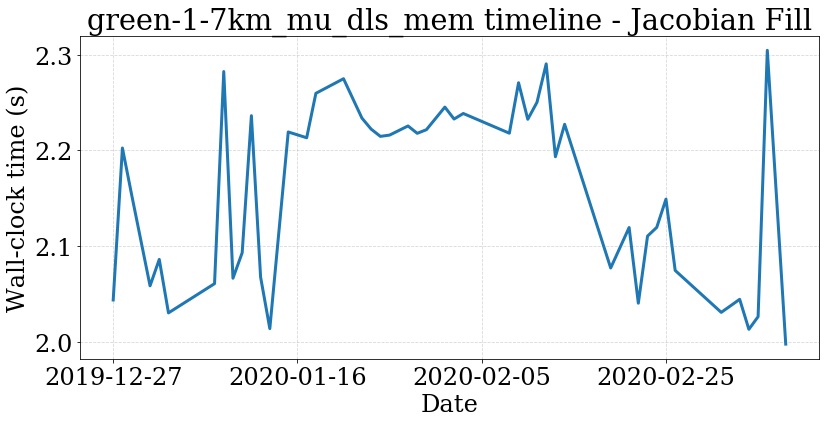

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (2.04383, 2.2026, 2.15386, 2.05864, 2.08623, 2.03036, 2.0609, 2.28249, 2.06655, 2.09316, 2.23636, 2.06772, 2.01391, 2.21936, 2.21331, 2.25972, 2.27498, 2.23381, 2.22232, 2.21475, 2.2161, 2.22563, 2.21795, 2.22174, 2.24534, 2.23286, 2.23866, 2.21807, 2.27078, 2.23261, 2.25033, 2.29051, 2.19346, 2.22736, 2.07727, 2.11953, 2.04048, 2.11059, 2.1197, 2.14919, 2.07469, 2.03091, 2.03769, 2.04454, 2.0132, 2.02641, 2.30464, 1.99774)


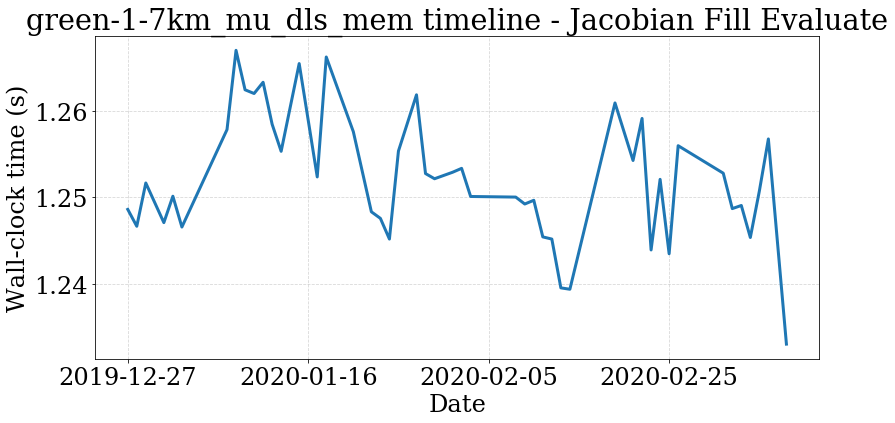

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.24859, 1.24664, 1.25164, 1.24706, 1.25011, 1.24655, 1.25781, 1.26697, 1.26241, 1.26198, 1.26328, 1.25843, 1.2553, 1.26544, 1.25234, 1.2662, 1.25757, 1.24831, 1.24755, 1.24516, 1.25533, 1.26183, 1.25273, 1.25213, 1.25288, 1.25333, 1.25008, 1.25001, 1.24921, 1.24964, 1.24541, 1.24516, 1.23952, 1.23936, 1.26089, 1.25424, 1.2591, 1.2439, 1.25206, 1.24346, 1.25595, 1.25277, 1.24868, 1.24904, 1.24534, 1.25071, 1.25673, 1.23302)


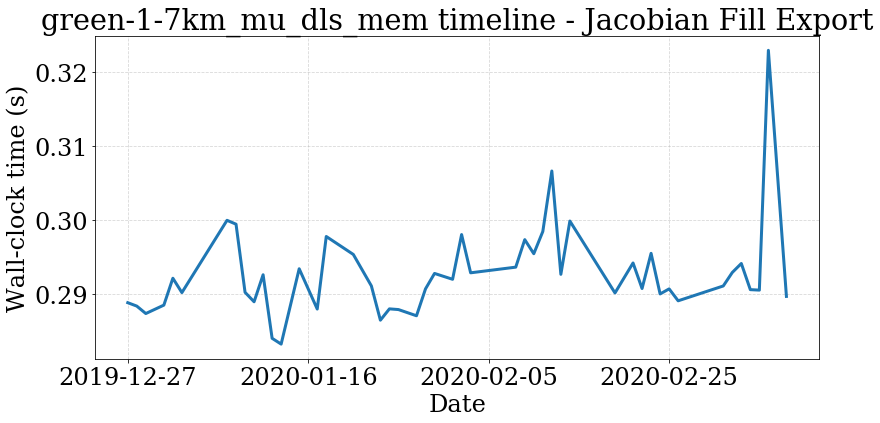

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (0.288858, 0.2884, 0.287396, 0.28853, 0.292156, 0.290218, 0.299965, 0.299442, 0.290257, 0.28898, 0.292625, 0.284056, 0.283274, 0.293432, 0.288001, 0.297784, 0.295361, 0.291121, 0.286499, 0.288026, 0.287932, 0.287095, 0.290724, 0.292803, 0.292013, 0.298046, 0.292887, 0.29365, 0.297361, 0.295461, 0.298458, 0.306615, 0.292682, 0.299867, 0.290173, 0.294215, 0.290769, 0.295513, 0.290039, 0.290719, 0.289113, 0.291113, 0.292933, 0.294144, 0.290617, 0.290554, 0.322883, 0.289706)


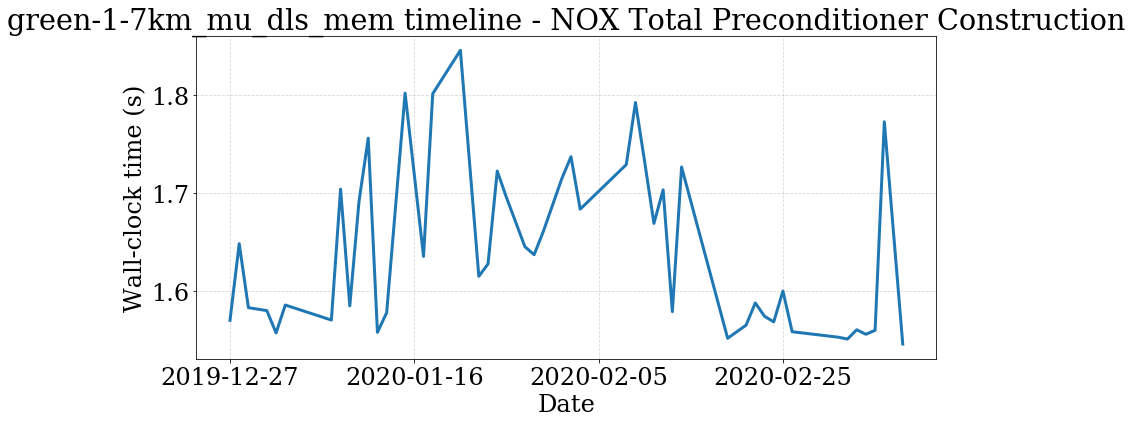

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (1.57008, 1.64844, 1.58302, 1.58002, 1.55719, 1.58573, 1.57037, 1.70425, 1.58487, 1.69172, 1.75637, 1.55779, 1.57791, 1.8024, 1.63546, 1.80184, 1.84619, 1.6151, 1.62778, 1.72276, 1.69566, 1.64537, 1.6372, 1.66099, 1.71486, 1.73743, 1.68375, 1.72932, 1.79281, 1.73188, 1.66918, 1.70356, 1.57894, 1.72691, 1.55173, 1.56515, 1.58786, 1.57426, 1.56854, 1.60003, 1.55843, 1.55283, 1.55093, 1.56042, 1.55583, 1.55989, 1.7731, 1.54576)


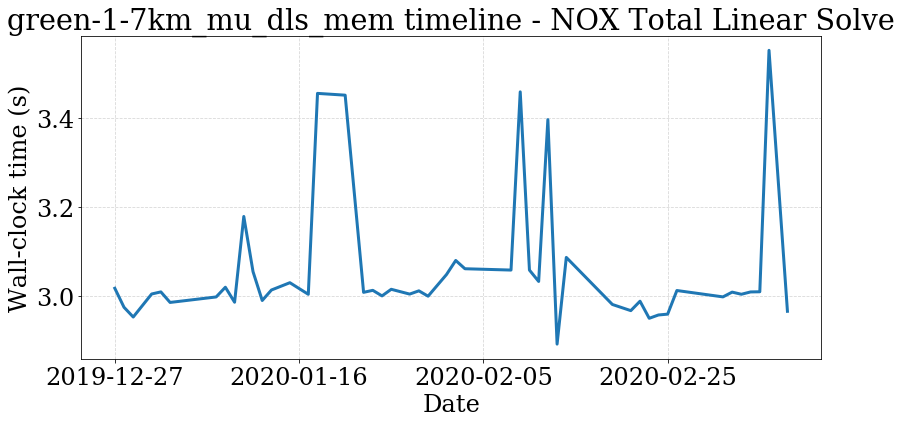

Dates:  (20191227, 20191228, 20191229, 20191231, 20200101, 20200102, 20200107, 20200108, 20200109, 20200110, 20200111, 20200112, 20200113, 20200115, 20200117, 20200118, 20200121, 20200123, 20200124, 20200125, 20200126, 20200128, 20200129, 20200130, 20200201, 20200202, 20200203, 20200208, 20200209, 20200210, 20200211, 20200212, 20200213, 20200214, 20200219, 20200221, 20200222, 20200223, 20200224, 20200225, 20200226, 20200302, 20200303, 20200304, 20200305, 20200306, 20200307, 20200309)
Wall-clock Time:  (3.01777, 2.97498, 2.95306, 3.00487, 3.00961, 2.98587, 2.99823, 3.02008, 2.98637, 3.17934, 3.05525, 2.99023, 3.01386, 3.03029, 3.00417, 3.4563, 3.45229, 3.00861, 3.01312, 3.0006, 3.01546, 3.00465, 3.01197, 2.99992, 3.04874, 3.08032, 3.06171, 3.05872, 3.45977, 3.0587, 3.03315, 3.39728, 2.8921, 3.08721, 2.98131, 2.96744, 2.98864, 2.95019, 2.95766, 2.95954, 3.0127, 2.99837, 3.0091, 3.00427, 3.0095, 3.00987, 3.55319, 2.96596)


In [3]:
%matplotlib inline
#plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (12, 6)

# Cases to plot:
cases = ('ant-2-20km_ml_ls',
         'ant-2-20km_mu_ls',
         'ant-2-20km_mu_dls',
         'green-1-7km_fea_1ws',
         'green-1-7km_ml_ls_1ws',
         'green-1-7km_mu_ls_1ws',
         'green-1-7km_mu_dls_1ws',
         'green-1-7km_fea_mem',
         'green-1-7km_ml_ls_mem',
         'green-1-7km_mu_ls_mem',
         'green-1-7km_mu_dls_mem')
np = 384
names =  ('Total Time',
          'Setup Time',
          'Total Fill Time',
          'Residual Fill',
          'Residual Fill Evaluate',
          'Residual Fill Export',
          'Jacobian Fill',
          'Jacobian Fill Evaluate',
          'Jacobian Fill Export',
          'NOX Total Preconditioner Construction',
          'NOX Total Linear Solve')
timers = ('Albany Total Time:',
          'Albany: Setup Time:',
          'Albany: Total Fill Time:',
          'Albany Fill: Residual:',
          'Albany Residual Fill: Evaluate:',
          'Albany Residual Fill: Export:',
          'Albany Fill: Jacobian:',
          'Albany Jacobian Fill: Evaluate:',
          'Albany Jacobian Fill: Export:',
          'NOX Total Preconditioner Construction:',
          'NOX Total Linear Solve:')

# Plot:
for case in cases:
    for name, timer in zip(names, timers):
        dates, wtimes = json2timeline(files, case, np, timer, False)
        fdates = [dt.datetime.strptime(str(d),'%Y%m%d').date() for d in dates]

        # Plot
        plt.figure()
        plt.plot(fdates, wtimes, linewidth=3.0)
        plt.xlabel('Date')
        plt.ylabel('Wall-clock time (s)')
        #plt.ylim((6e-3, 1e-1))
        plt.tight_layout()
        plt.title(case + ' timeline - ' + name)
        ax = plt.gca()
        ax.set_axisbelow(True)
        ax.grid(linestyle='--', alpha=0.5)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        #ax.tick_params(axis='x',rotation = 45)
        plt.show()

        # Print
        print("Dates: ", dates)
        print("Wall-clock Time: ", wtimes)